In [1]:
import glob
from pandas import DataFrame, read_csv
import numpy as np

new_df = []
for file in (
    *glob.glob("explogs/*/*/*.csv"), 
    *glob.glob("explogs-nolang/*/*/*.csv"), 
    *glob.glob("explogs-baseline/*/*/*.csv")):
    exp, module, k, _ = file.split("/")
    metrics = read_csv(file)
    try:
        new_df.append({
            "exp": exp, "module": module, "k": k, 
            **metrics[metrics["Test[Rec]"].notna()].dropna(axis=1).iloc[0].to_dict()
        })
    except:
        print(file)

explogs/CustomTextRCnnModule/0/metrics.csv


In [2]:
df = DataFrame(new_df)

df = df.groupby(["exp", "module"])[["Test[Rec]", "Test[Pre]", "Test[Acc]"]].describe().reset_index()

df = df[[(key, col) for key, col in df.columns if "Test" not in key or col in ("mean", "50%")]]

df

exp             module Test[Rec]           Test[Pre]  \
                                            mean       50%      mean   
0           explogs  AttentionalModule  0.618873  0.619976  0.625210   
1           explogs          RnnModule  0.617835  0.631176  0.622948   
2           explogs      TextCnnModule  0.586727  0.593853  0.594631   
3  explogs-baseline           Baseline  0.530045  0.526263  0.525027   
4    explogs-nolang  AttentionalModule  0.617930  0.624072  0.622592   
5    explogs-nolang          RnnModule  0.615599  0.608005  0.622608   
6    explogs-nolang      TextCnnModule  0.593098  0.600616  0.597804   

            Test[Acc]            
        50%      mean       50%  
0  0.629510  0.618873  0.619976  
1  0.637223  0.617835  0.631176  
2  0.604413  0.586727  0.593853  
3  0.517957  0.530045  0.526263  
4  0.624347  0.617930  0.624072  
5  0.620360  0.615599  0.608005  
6  0.606519  0.593098  0.600616

In [3]:
print(df.to_latex(float_format=lambda x: f"{100*x:.2f}"))

\begin{tabular}{lllrrrrrr}
\toprule
{} &               exp &             module & \multicolumn{2}{l}{Test[Rec]} & \multicolumn{2}{l}{Test[Pre]} & \multicolumn{2}{l}{Test[Acc]} \\
{} &      mean &   50\% &      mean &   50\% &      mean &   50\% \\
\midrule
0 &           explogs &  AttentionalModule &     61.89 & 62.00 &     62.52 & 62.95 &     61.89 & 62.00 \\
1 &           explogs &          RnnModule &     61.78 & 63.12 &     62.29 & 63.72 &     61.78 & 63.12 \\
2 &           explogs &      TextCnnModule &     58.67 & 59.39 &     59.46 & 60.44 &     58.67 & 59.39 \\
3 &  explogs-baseline &           Baseline &     53.00 & 52.63 &     52.50 & 51.80 &     53.00 & 52.63 \\
4 &    explogs-nolang &  AttentionalModule &     61.79 & 62.41 &     62.26 & 62.43 &     61.79 & 62.41 \\
5 &    explogs-nolang &          RnnModule &     61.56 & 60.80 &     62.26 & 62.04 &     61.56 & 60.80 \\
6 &    explogs-nolang &      TextCnnModule &     59.31 & 60.06 &     59.78 & 60.65 &     59.31 & 60.06 \\
\

/tmp/ipykernel_331347/3912819944.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(float_format=lambda x: f"{100*x:.2f}"))


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5229487419128418     │
│        Test[Loss]         │    0.9078080654144287     │
│         Test[Pre]         │    0.5572277903556824     │
│         Test[Rec]         │    0.5229487419128418     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5203909873962402     │
│        Test[Loss]         │    0.8466488122940063     │
│         Test[Pre]         │    0.5513737797737122     │
│         Test[Rec]         │    0.5203909873962402     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5241213440895081     │
│        Test[Loss]         │    0.8845264911651611     │
│         Test[Pre]         │    0.5720439553260803     │
│         Test[Rec]         │    0.5241213440895081     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5668197274208069     │
│        Test[Loss]         │    0.7892634868621826     │
│         Test[Pre]         │    0.6078272461891174     │
│         Test[Rec]         │    0.5668197274208069     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5108739137649536     │
│        Test[Loss]         │    0.9131636619567871     │
│         Test[Pre]         │    0.5515694618225098     │
│         Test[Rec]         │    0.5108739137649536     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4485113322734833     │
│        Test[Loss]         │    1.1342295408248901     │
│         Test[Pre]         │    0.4750209450721741     │
│         Test[Rec]         │    0.4485113322734833     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.46366751194000244    │
│        Test[Loss]         │    1.1087791919708252     │
│         Test[Pre]         │    0.48275700211524963    │
│         Test[Rec]         │    0.46366751194000244    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │     0.465337336063385     │
│        Test[Loss]         │     1.128274917602539     │
│         Test[Pre]         │    0.4945685565471649     │
│         Test[Rec]         │     0.465337336063385     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4766588807106018     │
│        Test[Loss]         │    1.1107043027877808     │
│         Test[Pre]         │    0.5136560201644897     │
│         Test[Rec]         │    0.4766588807106018     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4416443705558777     │
│        Test[Loss]         │    1.1296334266662598     │
│         Test[Pre]         │    0.5008054375648499     │
│         Test[Rec]         │    0.4416443705558777     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5054587721824646     │
│        Test[Loss]         │    0.8748968243598938     │
│         Test[Pre]         │    0.5265238881111145     │
│         Test[Rec]         │    0.5054587721824646     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5251535773277283     │
│        Test[Loss]         │    0.8628149032592773     │
│         Test[Pre]         │    0.5663950443267822     │
│         Test[Rec]         │    0.5251535773277283     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5522847771644592     │
│        Test[Loss]         │    0.8498986959457397     │
│         Test[Pre]         │    0.5733146071434021     │
│         Test[Rec]         │    0.5522847771644592     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5009390115737915     │
│        Test[Loss]         │    0.8569039106369019     │
│         Test[Pre]         │    0.5308199524879456     │
│         Test[Rec]         │    0.5009390115737915     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4853643774986267     │
│        Test[Loss]         │    0.9044601321220398     │
│         Test[Pre]         │     0.52467942237854      │
│         Test[Rec]         │    0.4853643774986267     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │      0.5323526263237      │
│        Test[Loss]         │    0.9101004600524902     │
│         Test[Pre]         │    0.5609148144721985     │
│         Test[Rec]         │      0.5323526263237      │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │     0.567613959312439     │
│        Test[Loss]         │    0.8072249889373779     │
│         Test[Pre]         │    0.6036262512207031     │
│         Test[Rec]         │     0.567613959312439     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5525496006011963     │
│        Test[Loss]         │    0.8391323089599609     │
│         Test[Pre]         │    0.5645074844360352     │
│         Test[Rec]         │    0.5525496006011963     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5661295056343079     │
│        Test[Loss]         │    0.8291603326797485     │
│         Test[Pre]         │    0.5928748250007629     │
│         Test[Rec]         │    0.5661295056343079     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5125186443328857     │
│        Test[Loss]         │    1.1054322719573975     │
│         Test[Pre]         │    0.5395256876945496     │
│         Test[Rec]         │    0.5125186443328857     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │     0.503399670124054     │
│        Test[Loss]         │    1.1000962257385254     │
│         Test[Pre]         │    0.5276238918304443     │
│         Test[Rec]         │     0.503399670124054     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5124783515930176     │
│        Test[Loss]         │     1.089722990989685     │
│         Test[Pre]         │    0.5118576288223267     │
│         Test[Rec]         │    0.5124783515930176     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5340573191642761     │
│        Test[Loss]         │    1.0833630561828613     │
│         Test[Pre]         │    0.5472018718719482     │
│         Test[Rec]         │    0.5340573191642761     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5204477906227112     │
│        Test[Loss]         │    1.0824673175811768     │
│         Test[Pre]         │    0.5225900411605835     │
│         Test[Rec]         │    0.5204477906227112     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4828478693962097     │
│        Test[Loss]         │     1.109956979751587     │
│         Test[Pre]         │     0.494243323802948     │
│         Test[Rec]         │    0.4828478693962097     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5219009518623352     │
│        Test[Loss]         │    1.0344878435134888     │
│         Test[Pre]         │    0.5626561641693115     │
│         Test[Rec]         │    0.5219009518623352     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5403568744659424     │
│        Test[Loss]         │    0.8312873840332031     │
│         Test[Pre]         │    0.5680382251739502     │
│         Test[Rec]         │    0.5403568744659424     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5363118648529053     │
│        Test[Loss]         │    0.9259353280067444     │
│         Test[Pre]         │    0.5609033703804016     │
│         Test[Rec]         │    0.5363118648529053     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5729031562805176     │
│        Test[Loss]         │    0.7713151574134827     │
│         Test[Pre]         │     0.587540328502655     │
│         Test[Rec]         │    0.5729031562805176     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.5315608978271484     │
│        Test[Loss]         │    0.8006411194801331     │
│         Test[Pre]         │    0.5584201812744141     │
│         Test[Rec]         │    0.5315608978271484     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.3886010944843292     │
│        Test[Loss]         │    1.1664707660675049     │
│         Test[Pre]         │     0.414703905582428     │
│         Test[Rec]         │    0.3886010944843292     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4091063439846039     │
│        Test[Loss]         │    1.1598050594329834     │
│         Test[Pre]         │    0.41187727451324463    │
│         Test[Rec]         │    0.4091063439846039     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.36466798186302185    │
│        Test[Loss]         │    1.1964036226272583     │
│         Test[Pre]         │    0.2942095696926117     │
│         Test[Rec]         │    0.36466798186302185    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.3824261724948883     │
│        Test[Loss]         │    1.1715409755706787     │
│         Test[Pre]         │    0.37082722783088684    │
│         Test[Rec]         │    0.3824261724948883     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.4147537648677826     │
│        Test[Loss]         │     1.160456895828247     │
│         Test[Pre]         │    0.4205434024333954     │
│         Test[Rec]         │    0.4147537648677826     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Test[Acc]         │    0.3926430642604828     │
│        Test[Loss]         │    1.1725455522537231     │
│         Test[Pre]         │    0.4099862575531006     │
│         Test[Rec]         │    0.3926430642604828     │
└───────────────────────────┴───────────────────────────┘

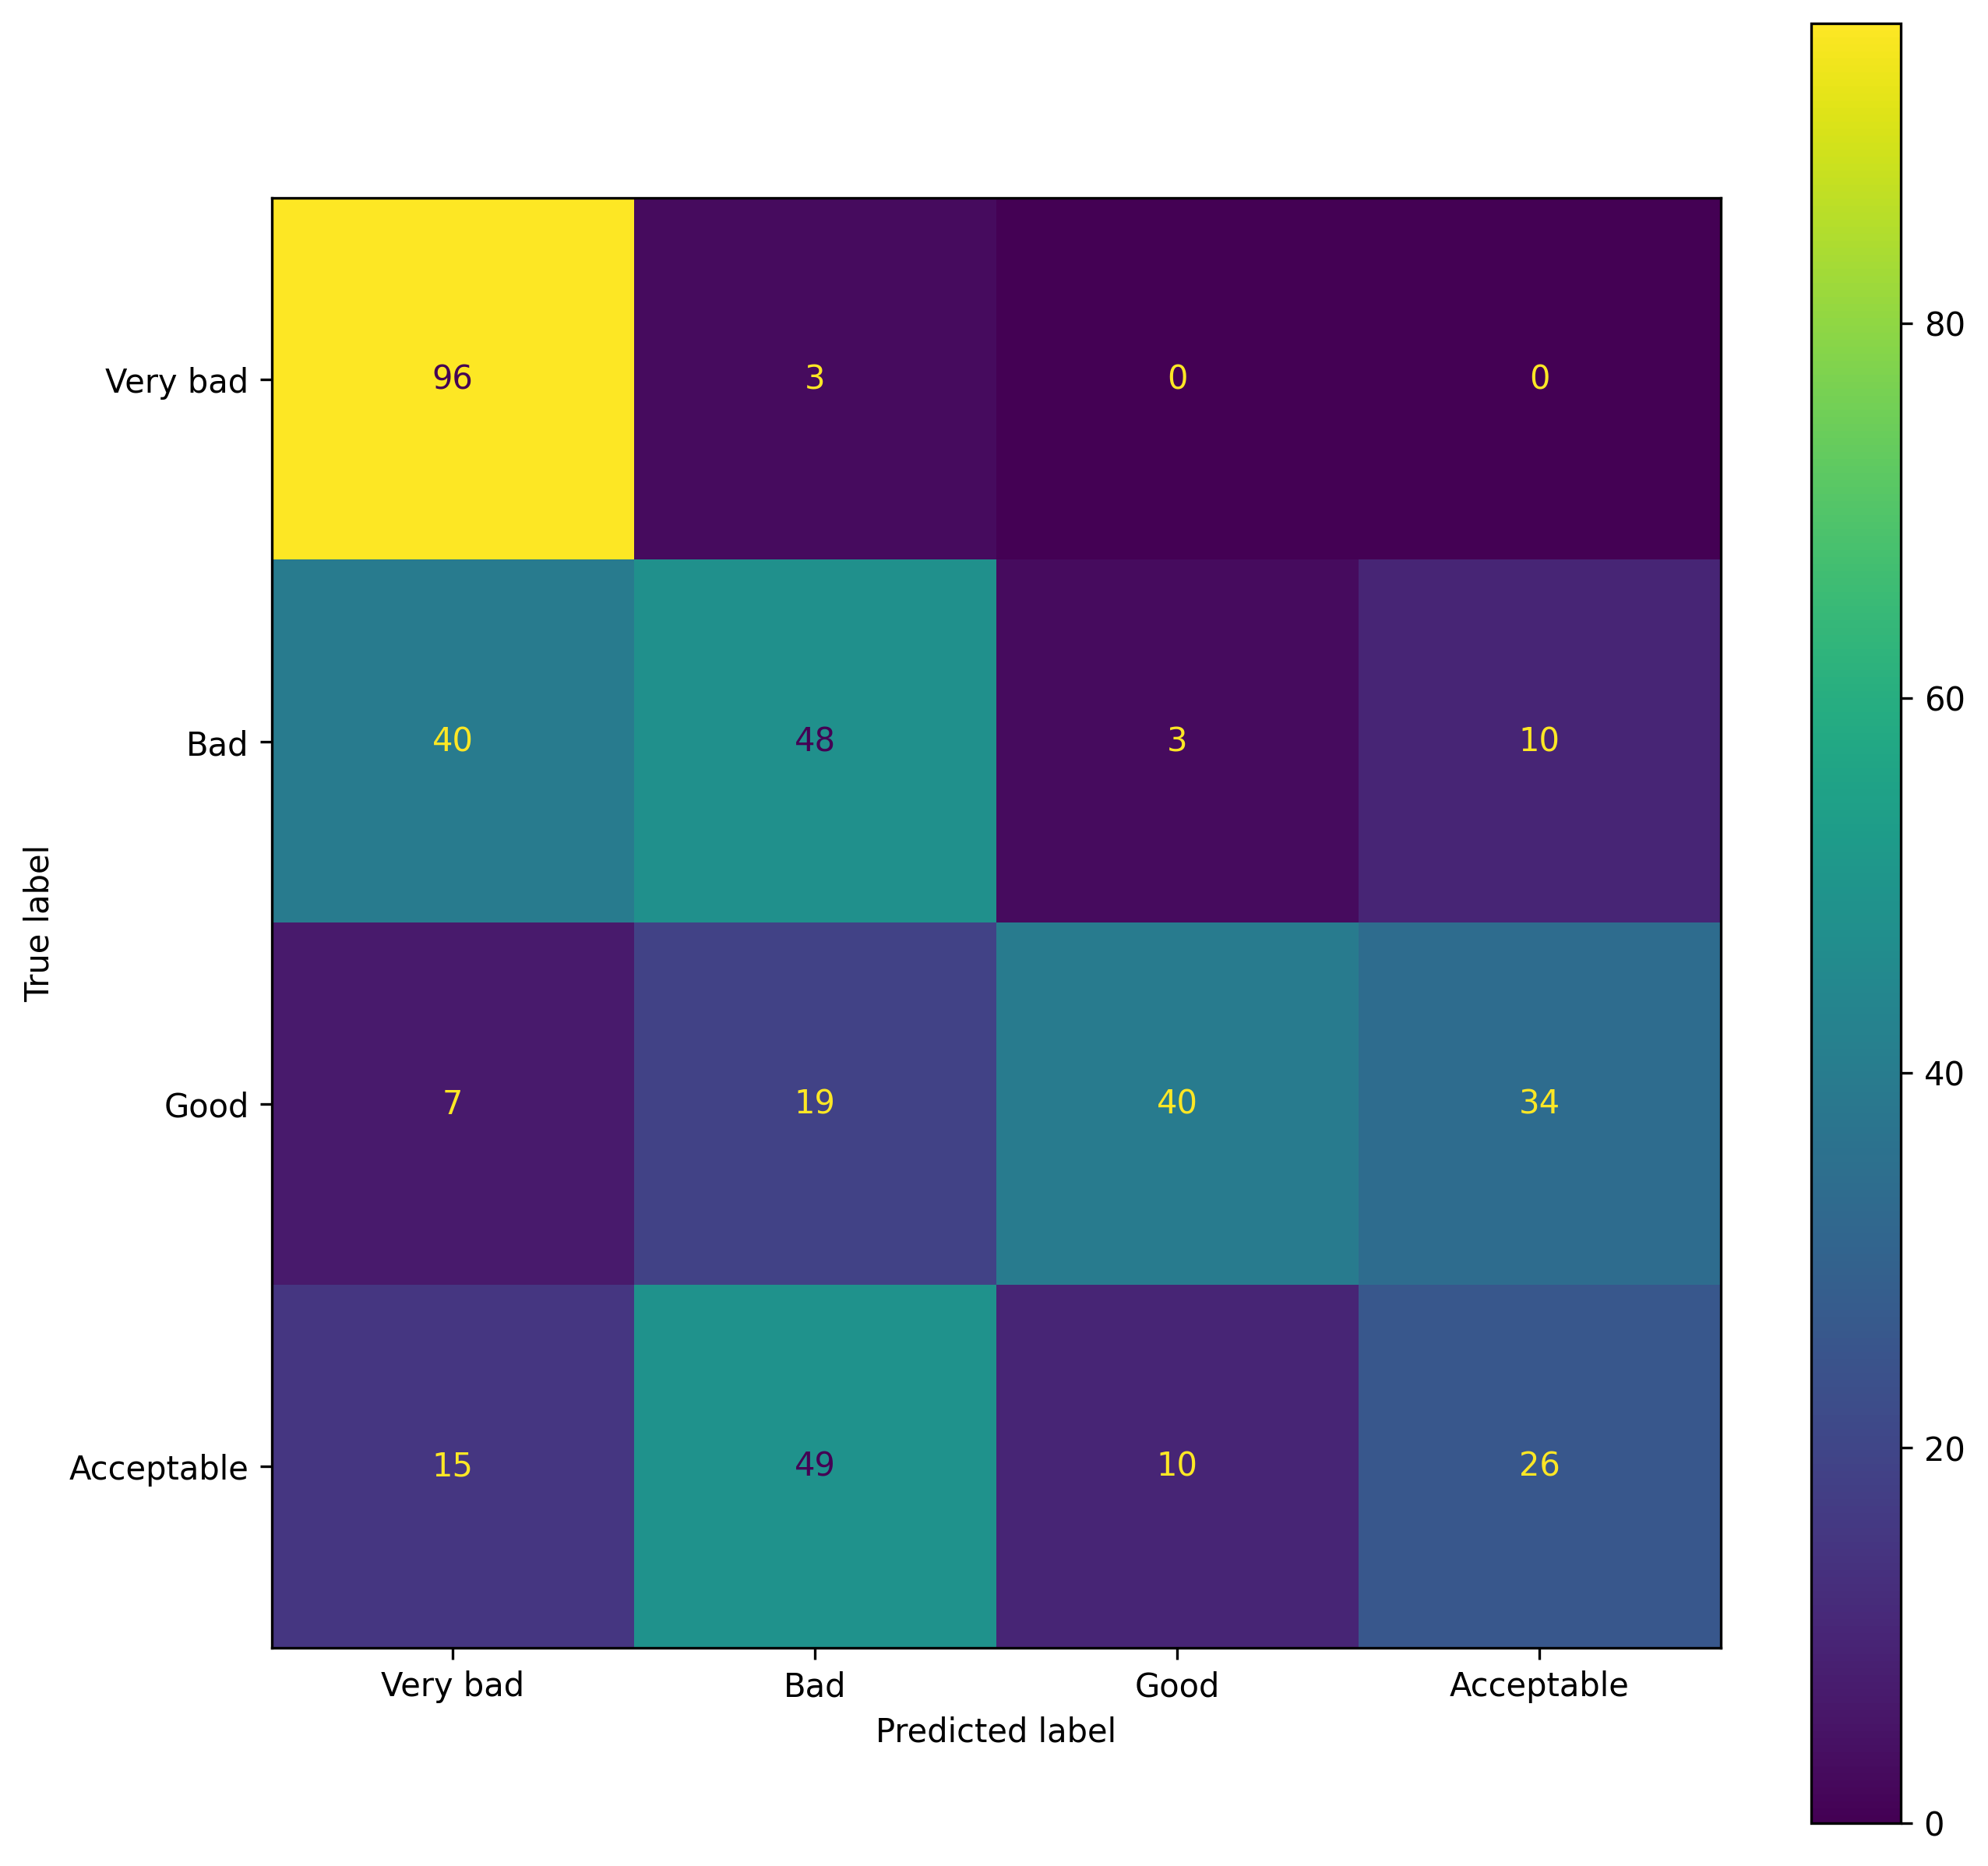

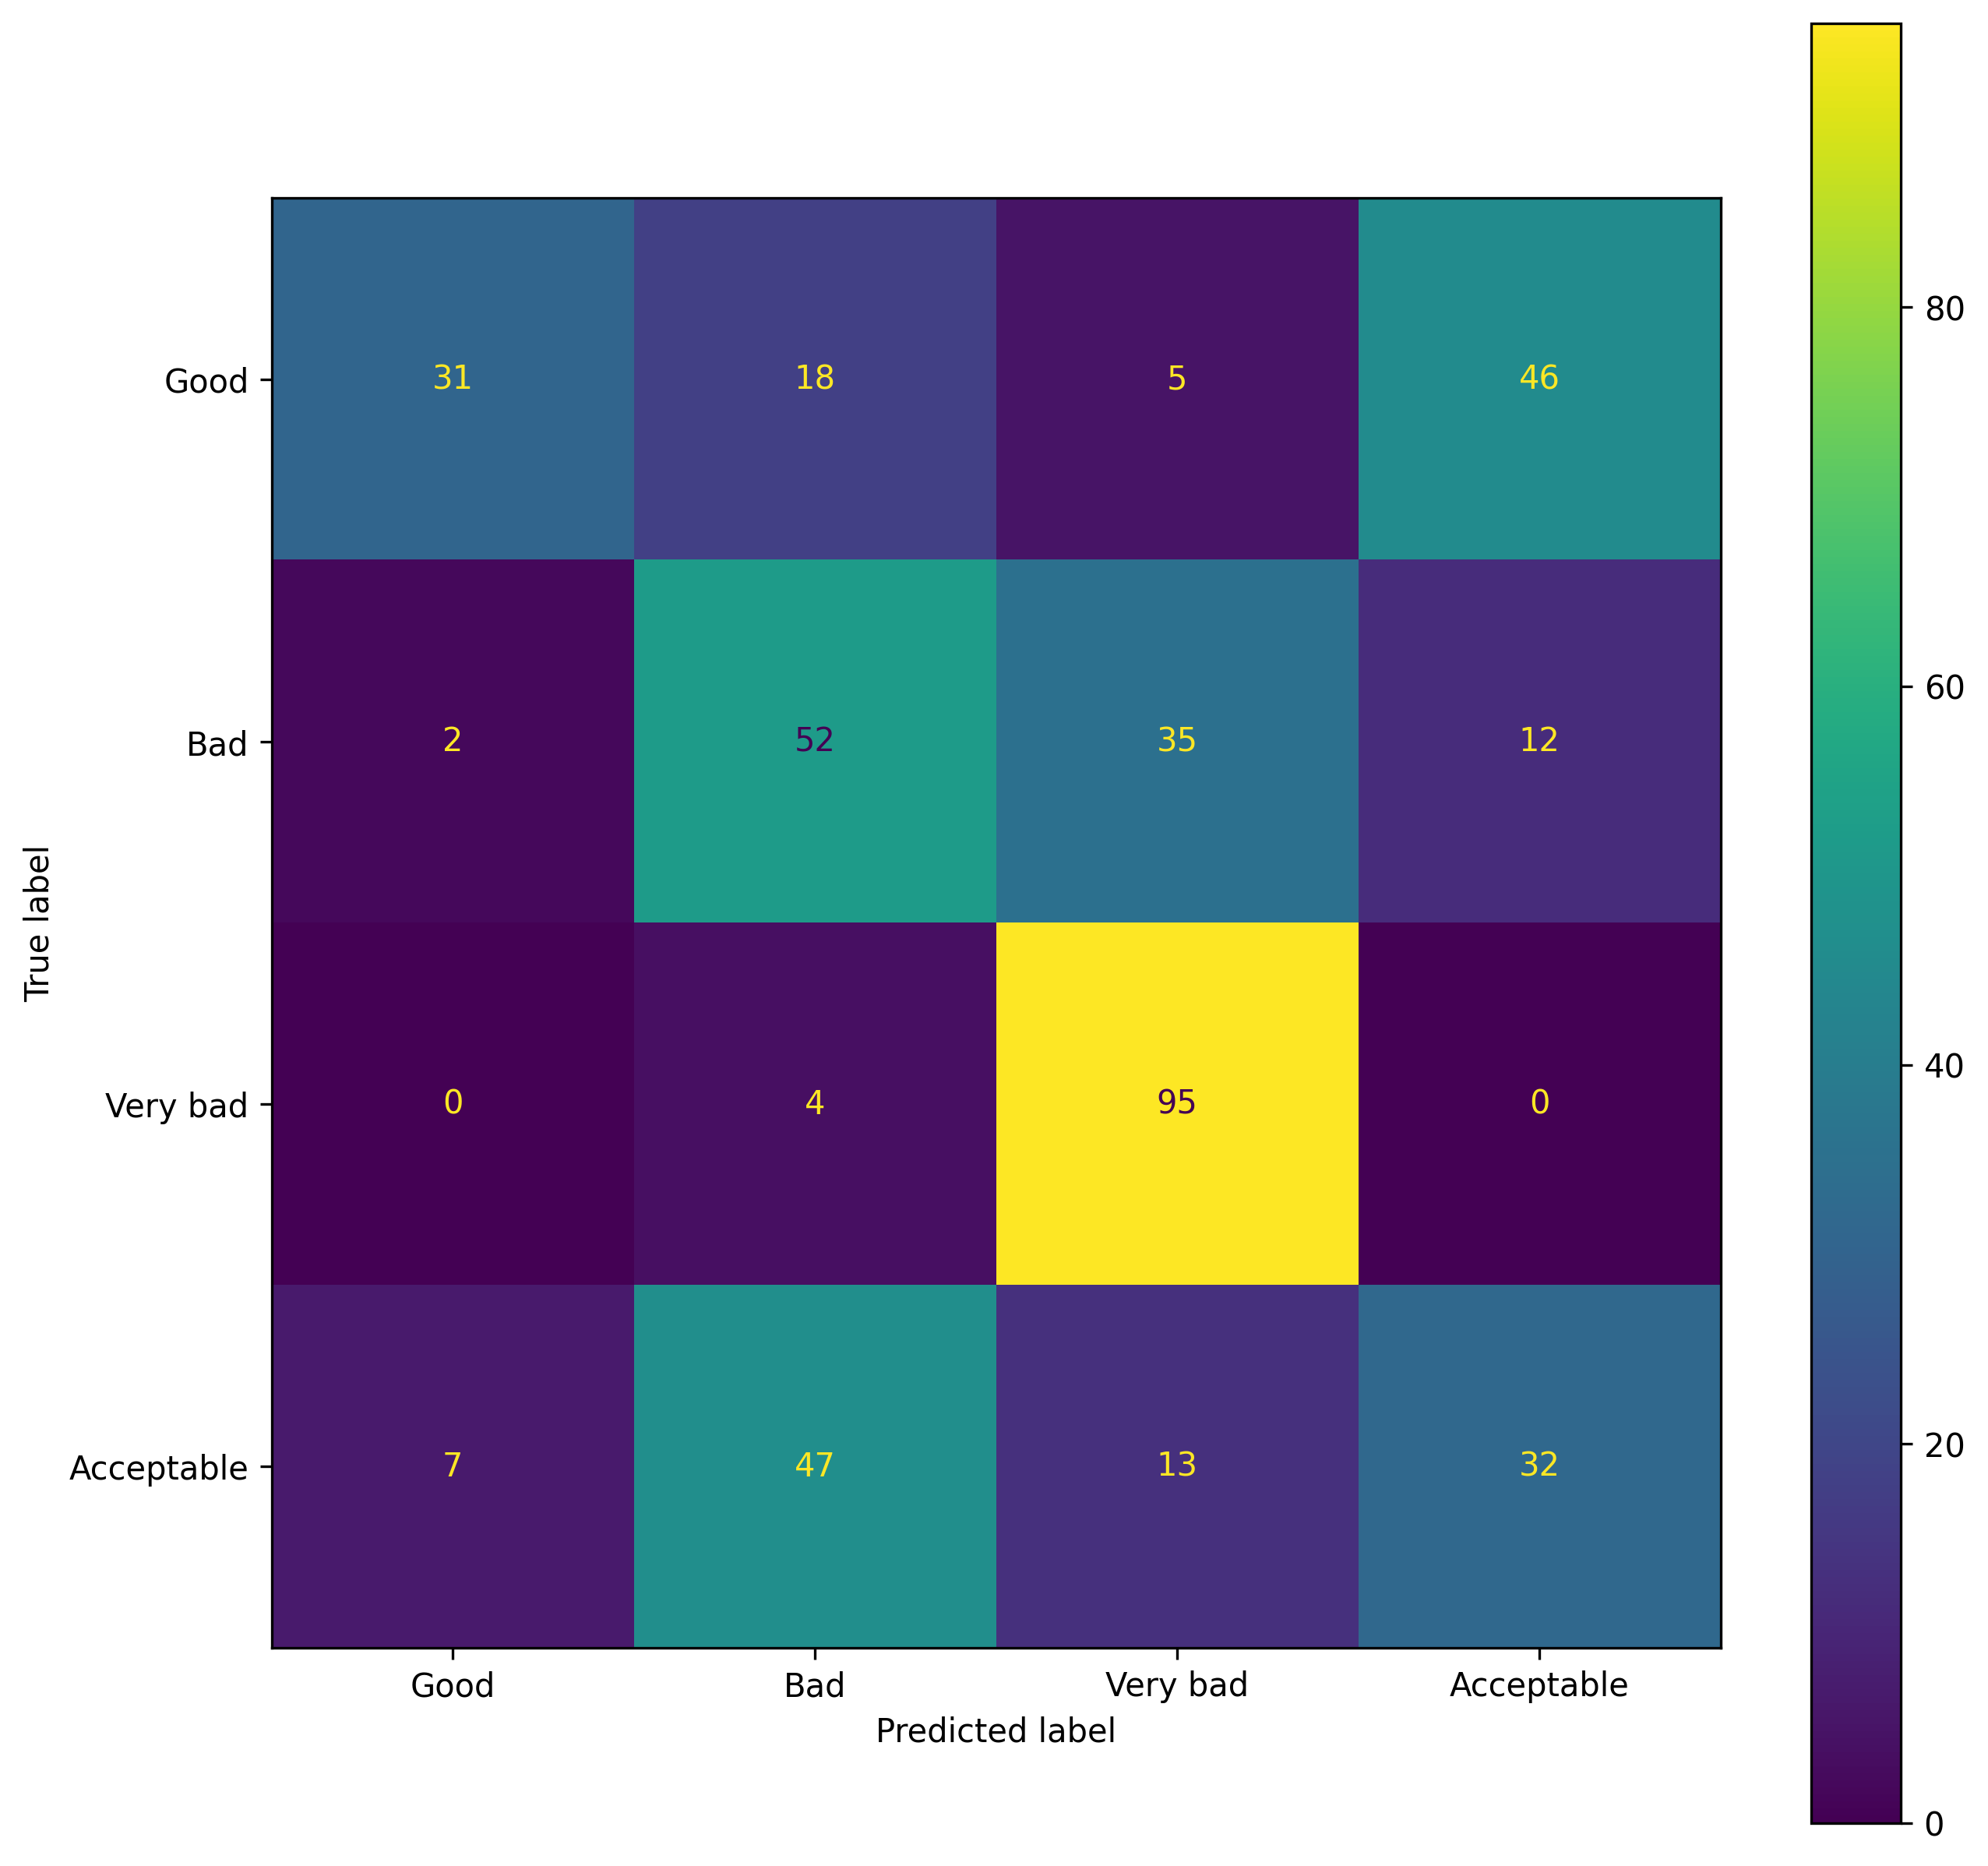

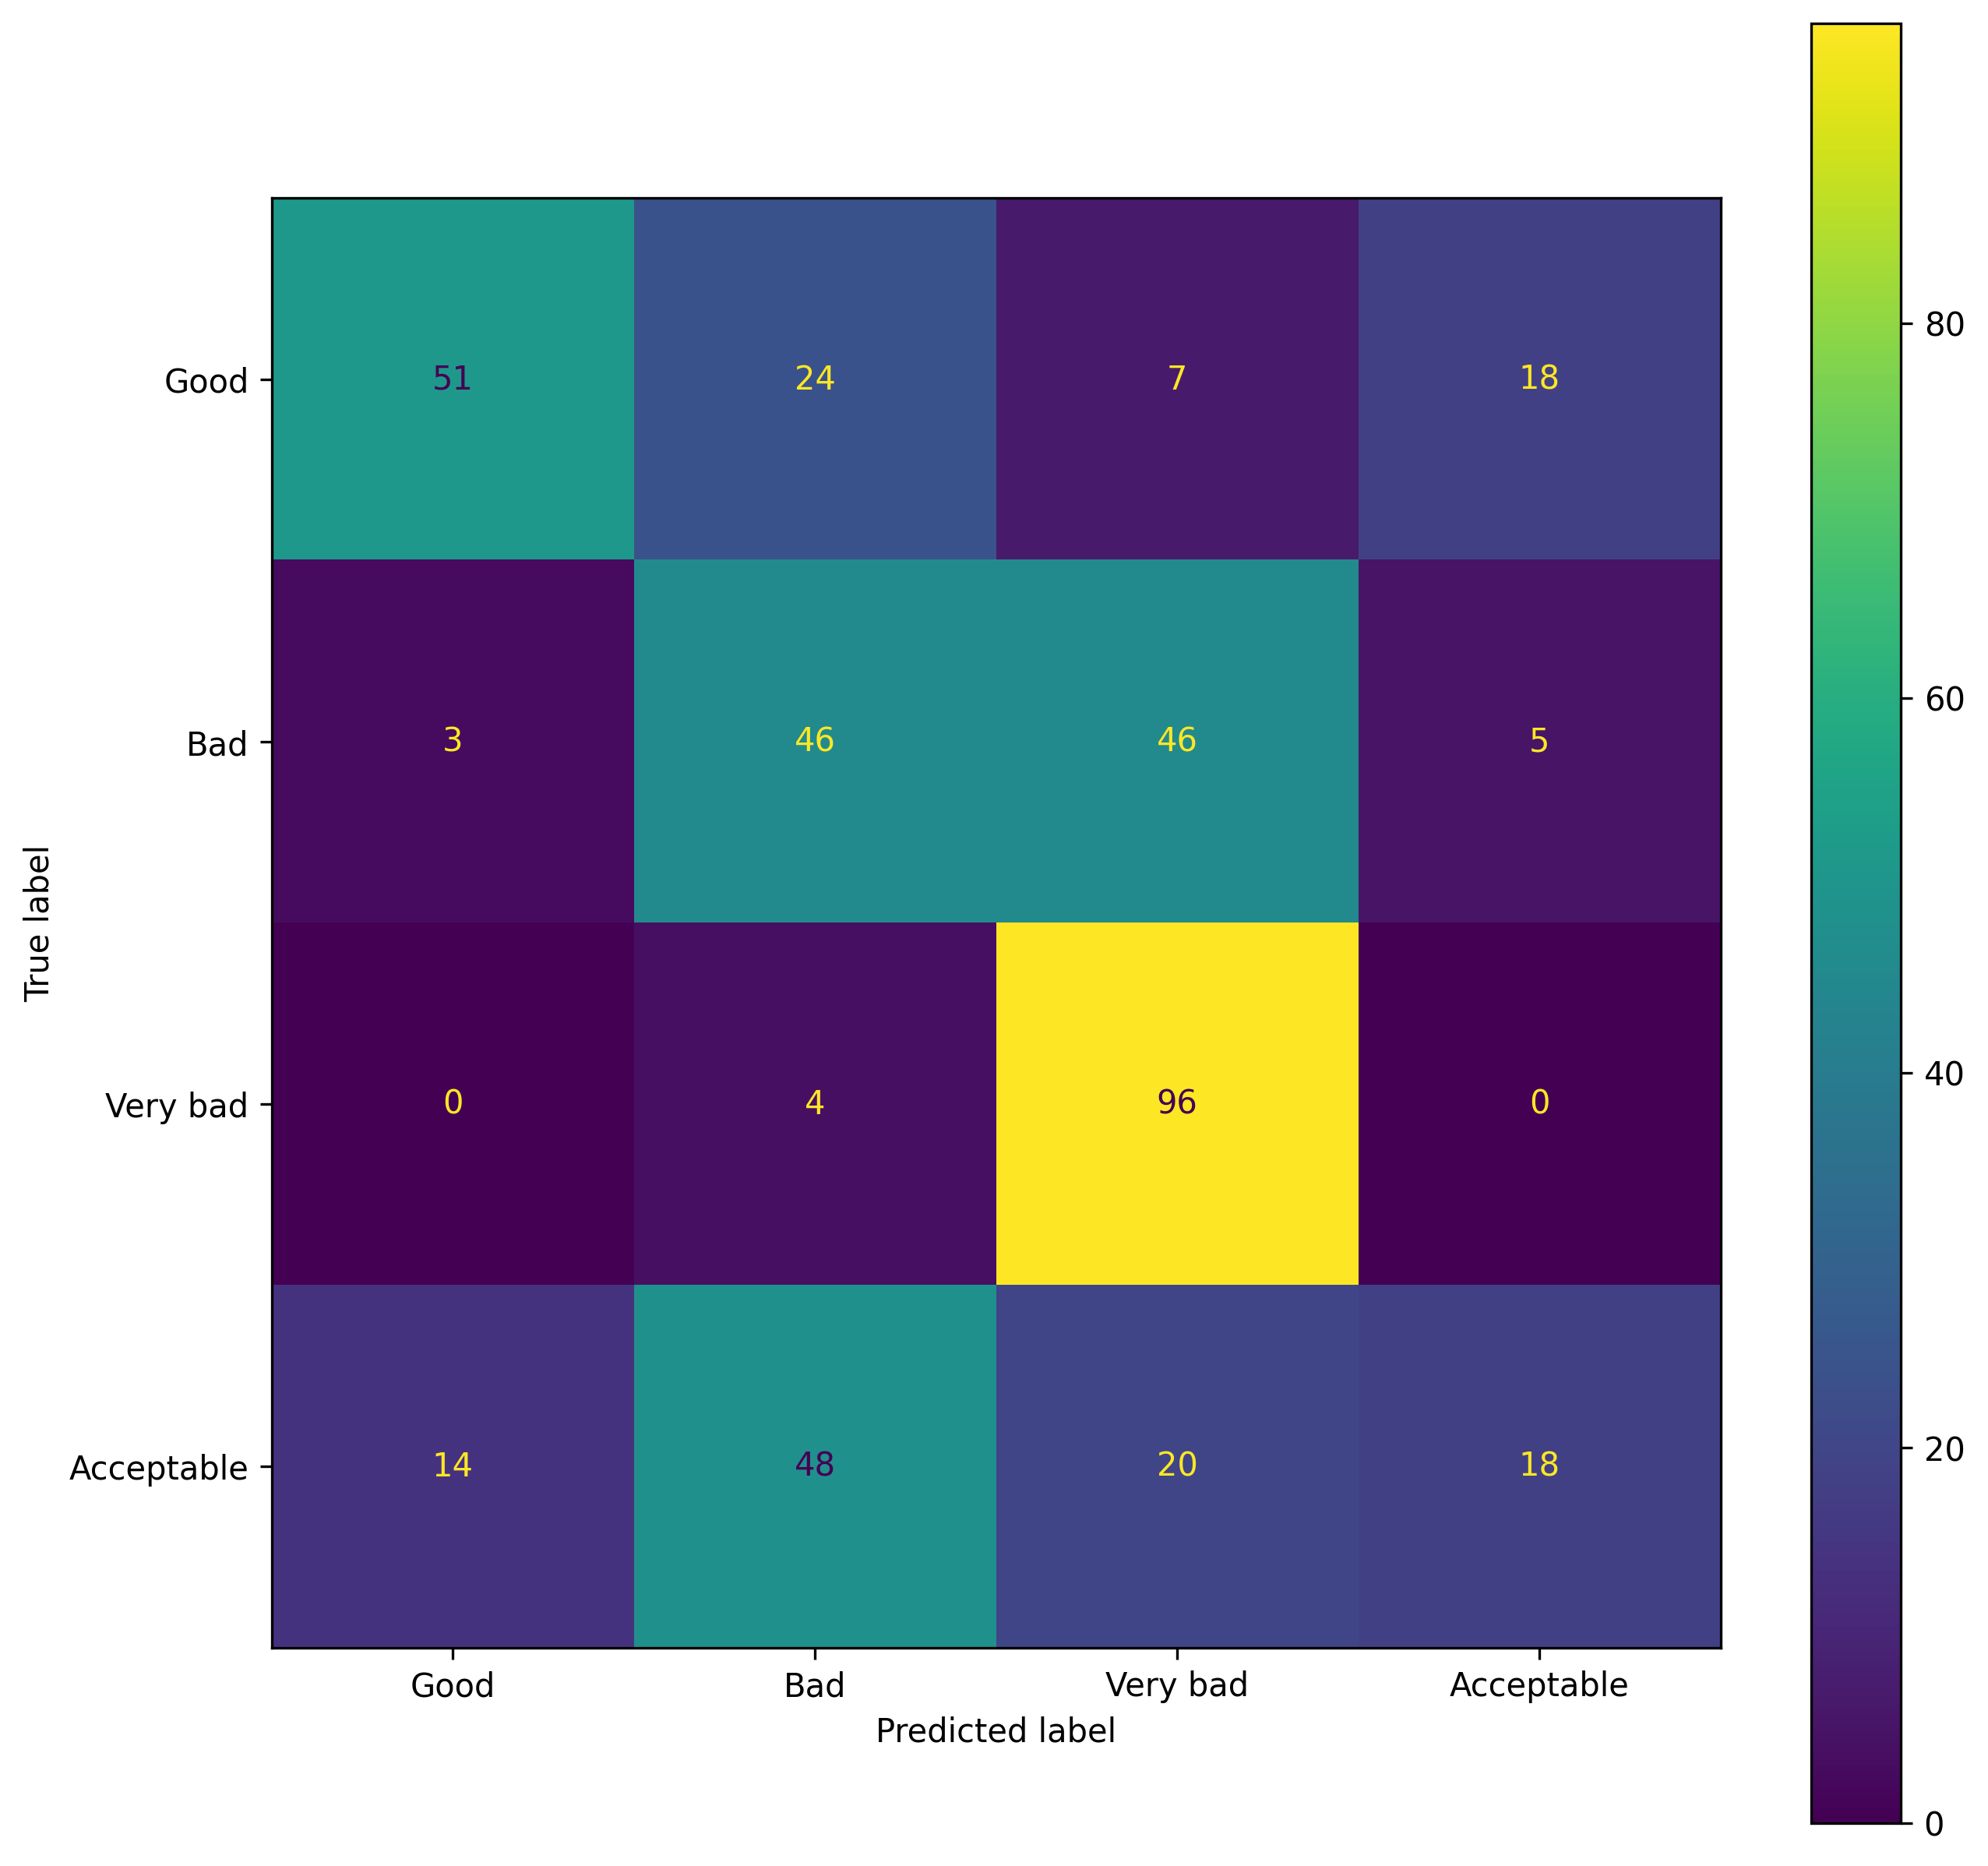

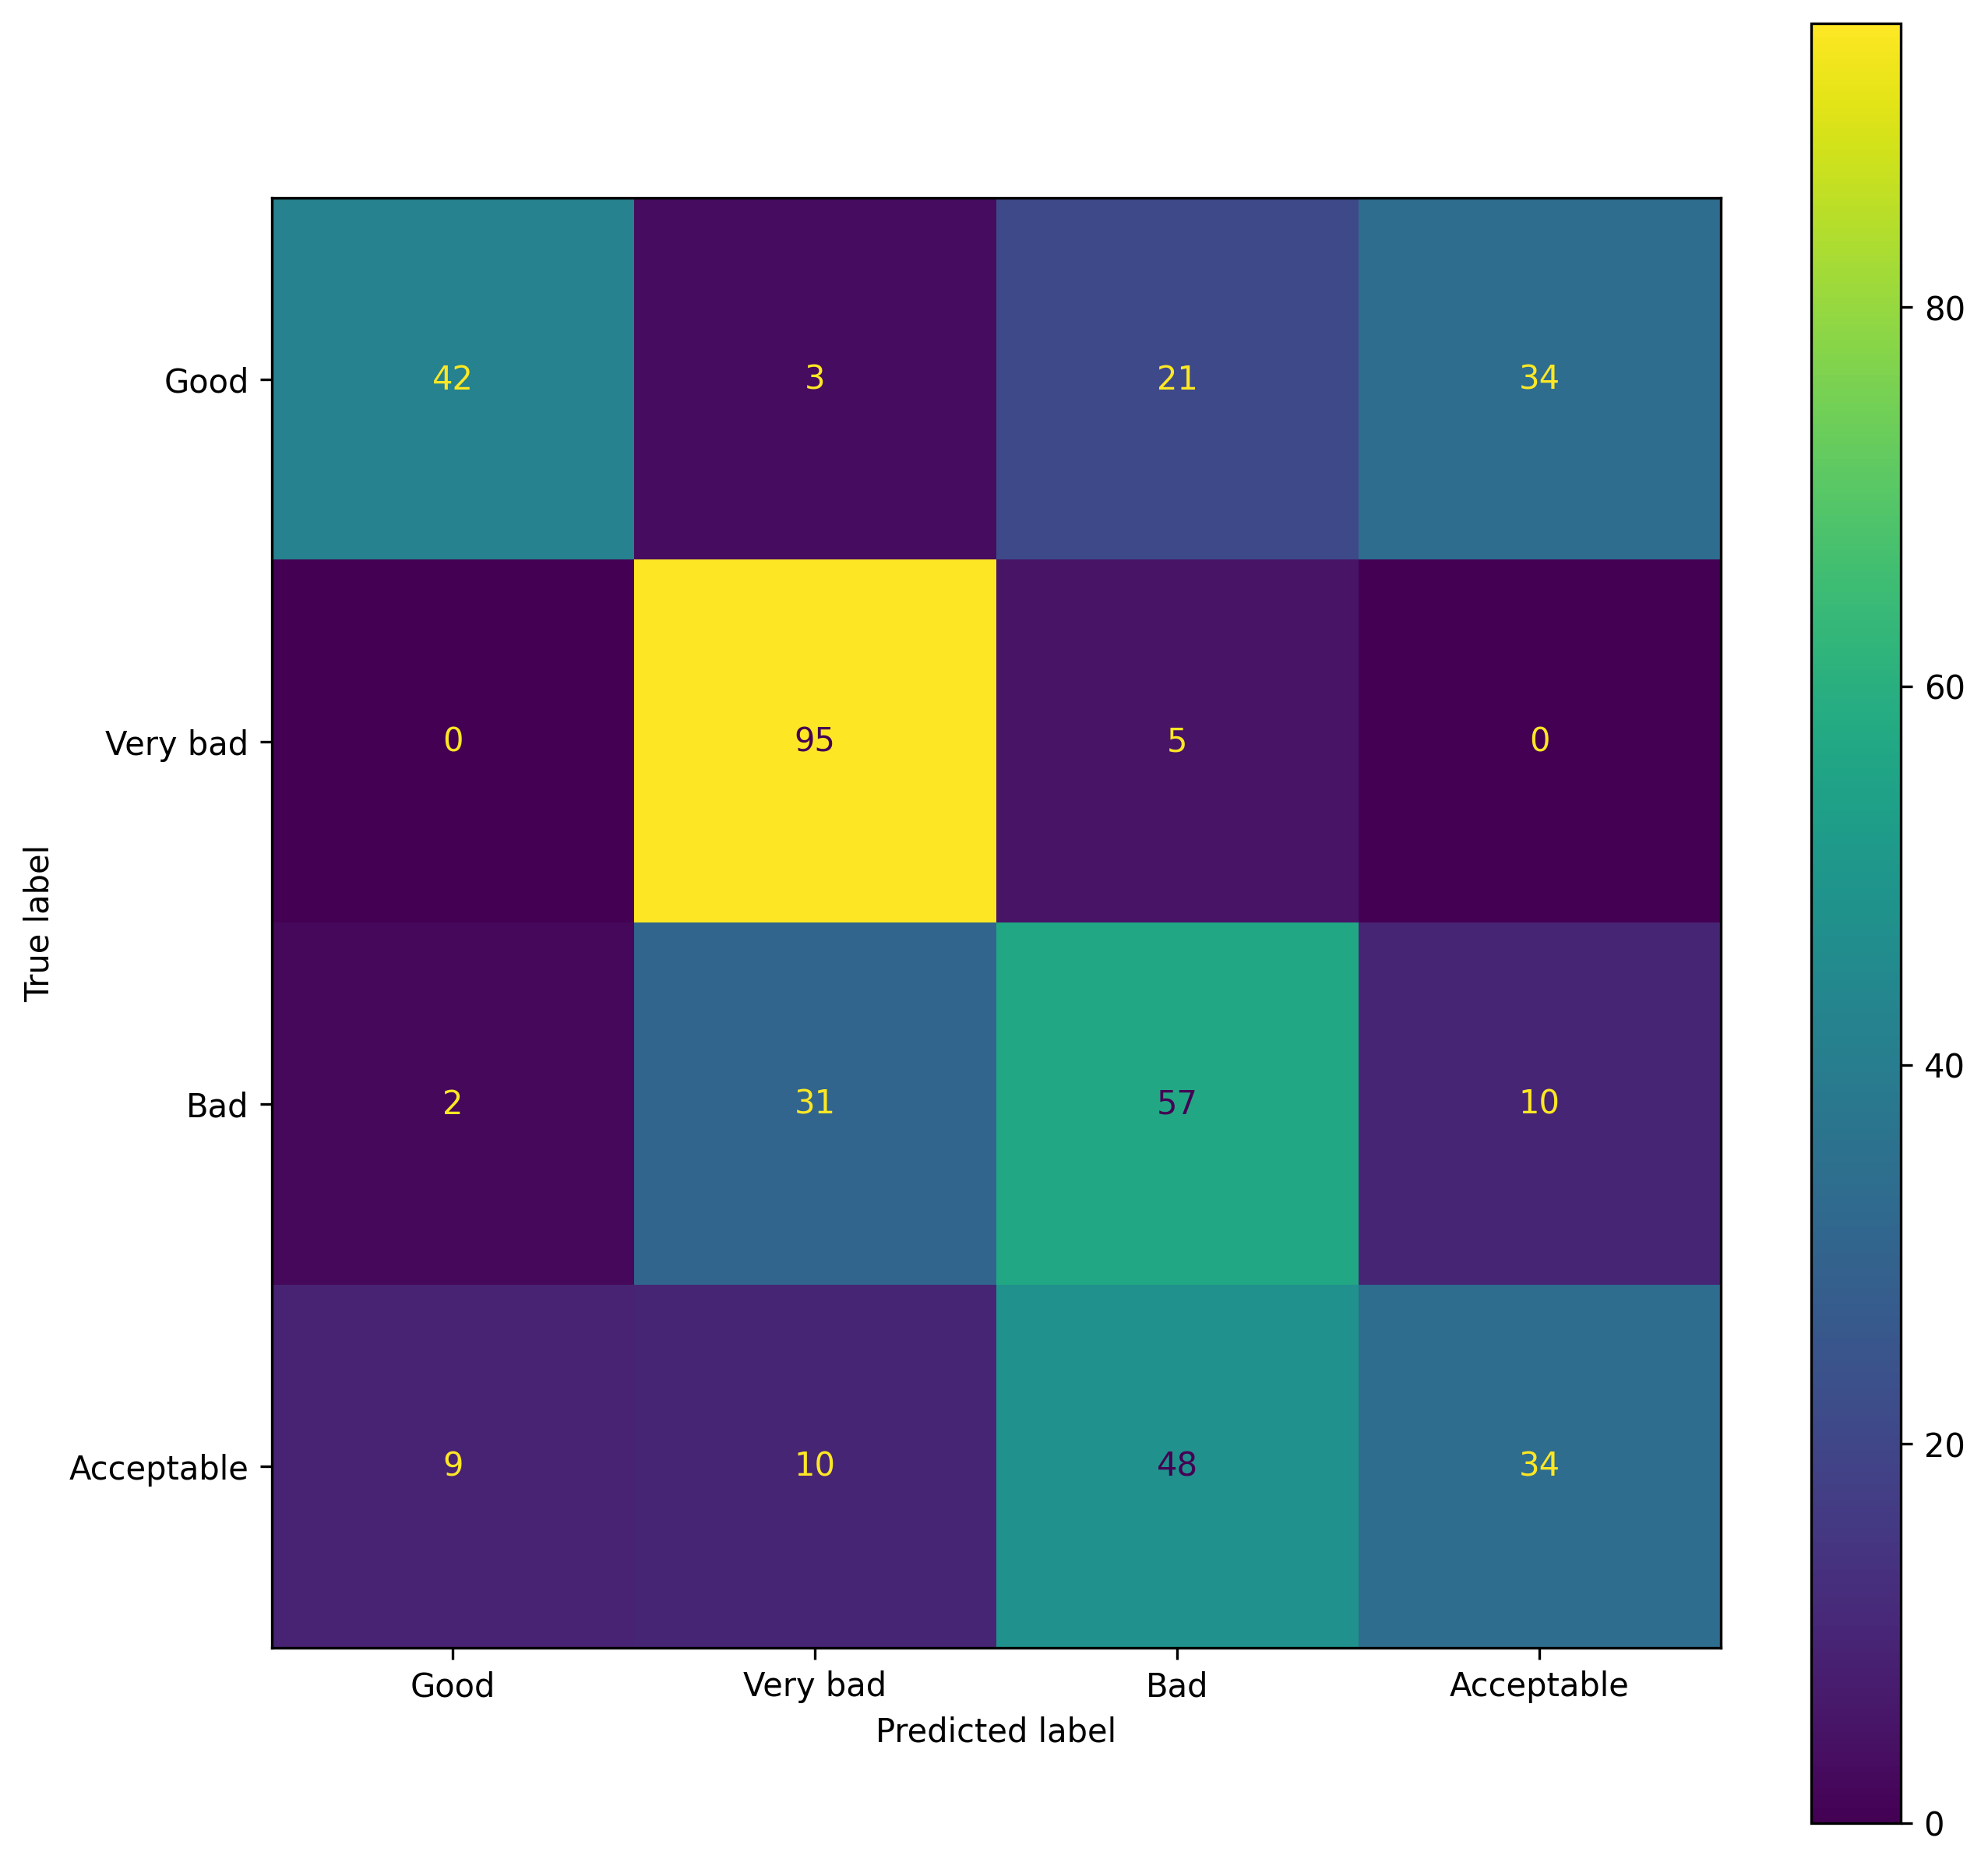

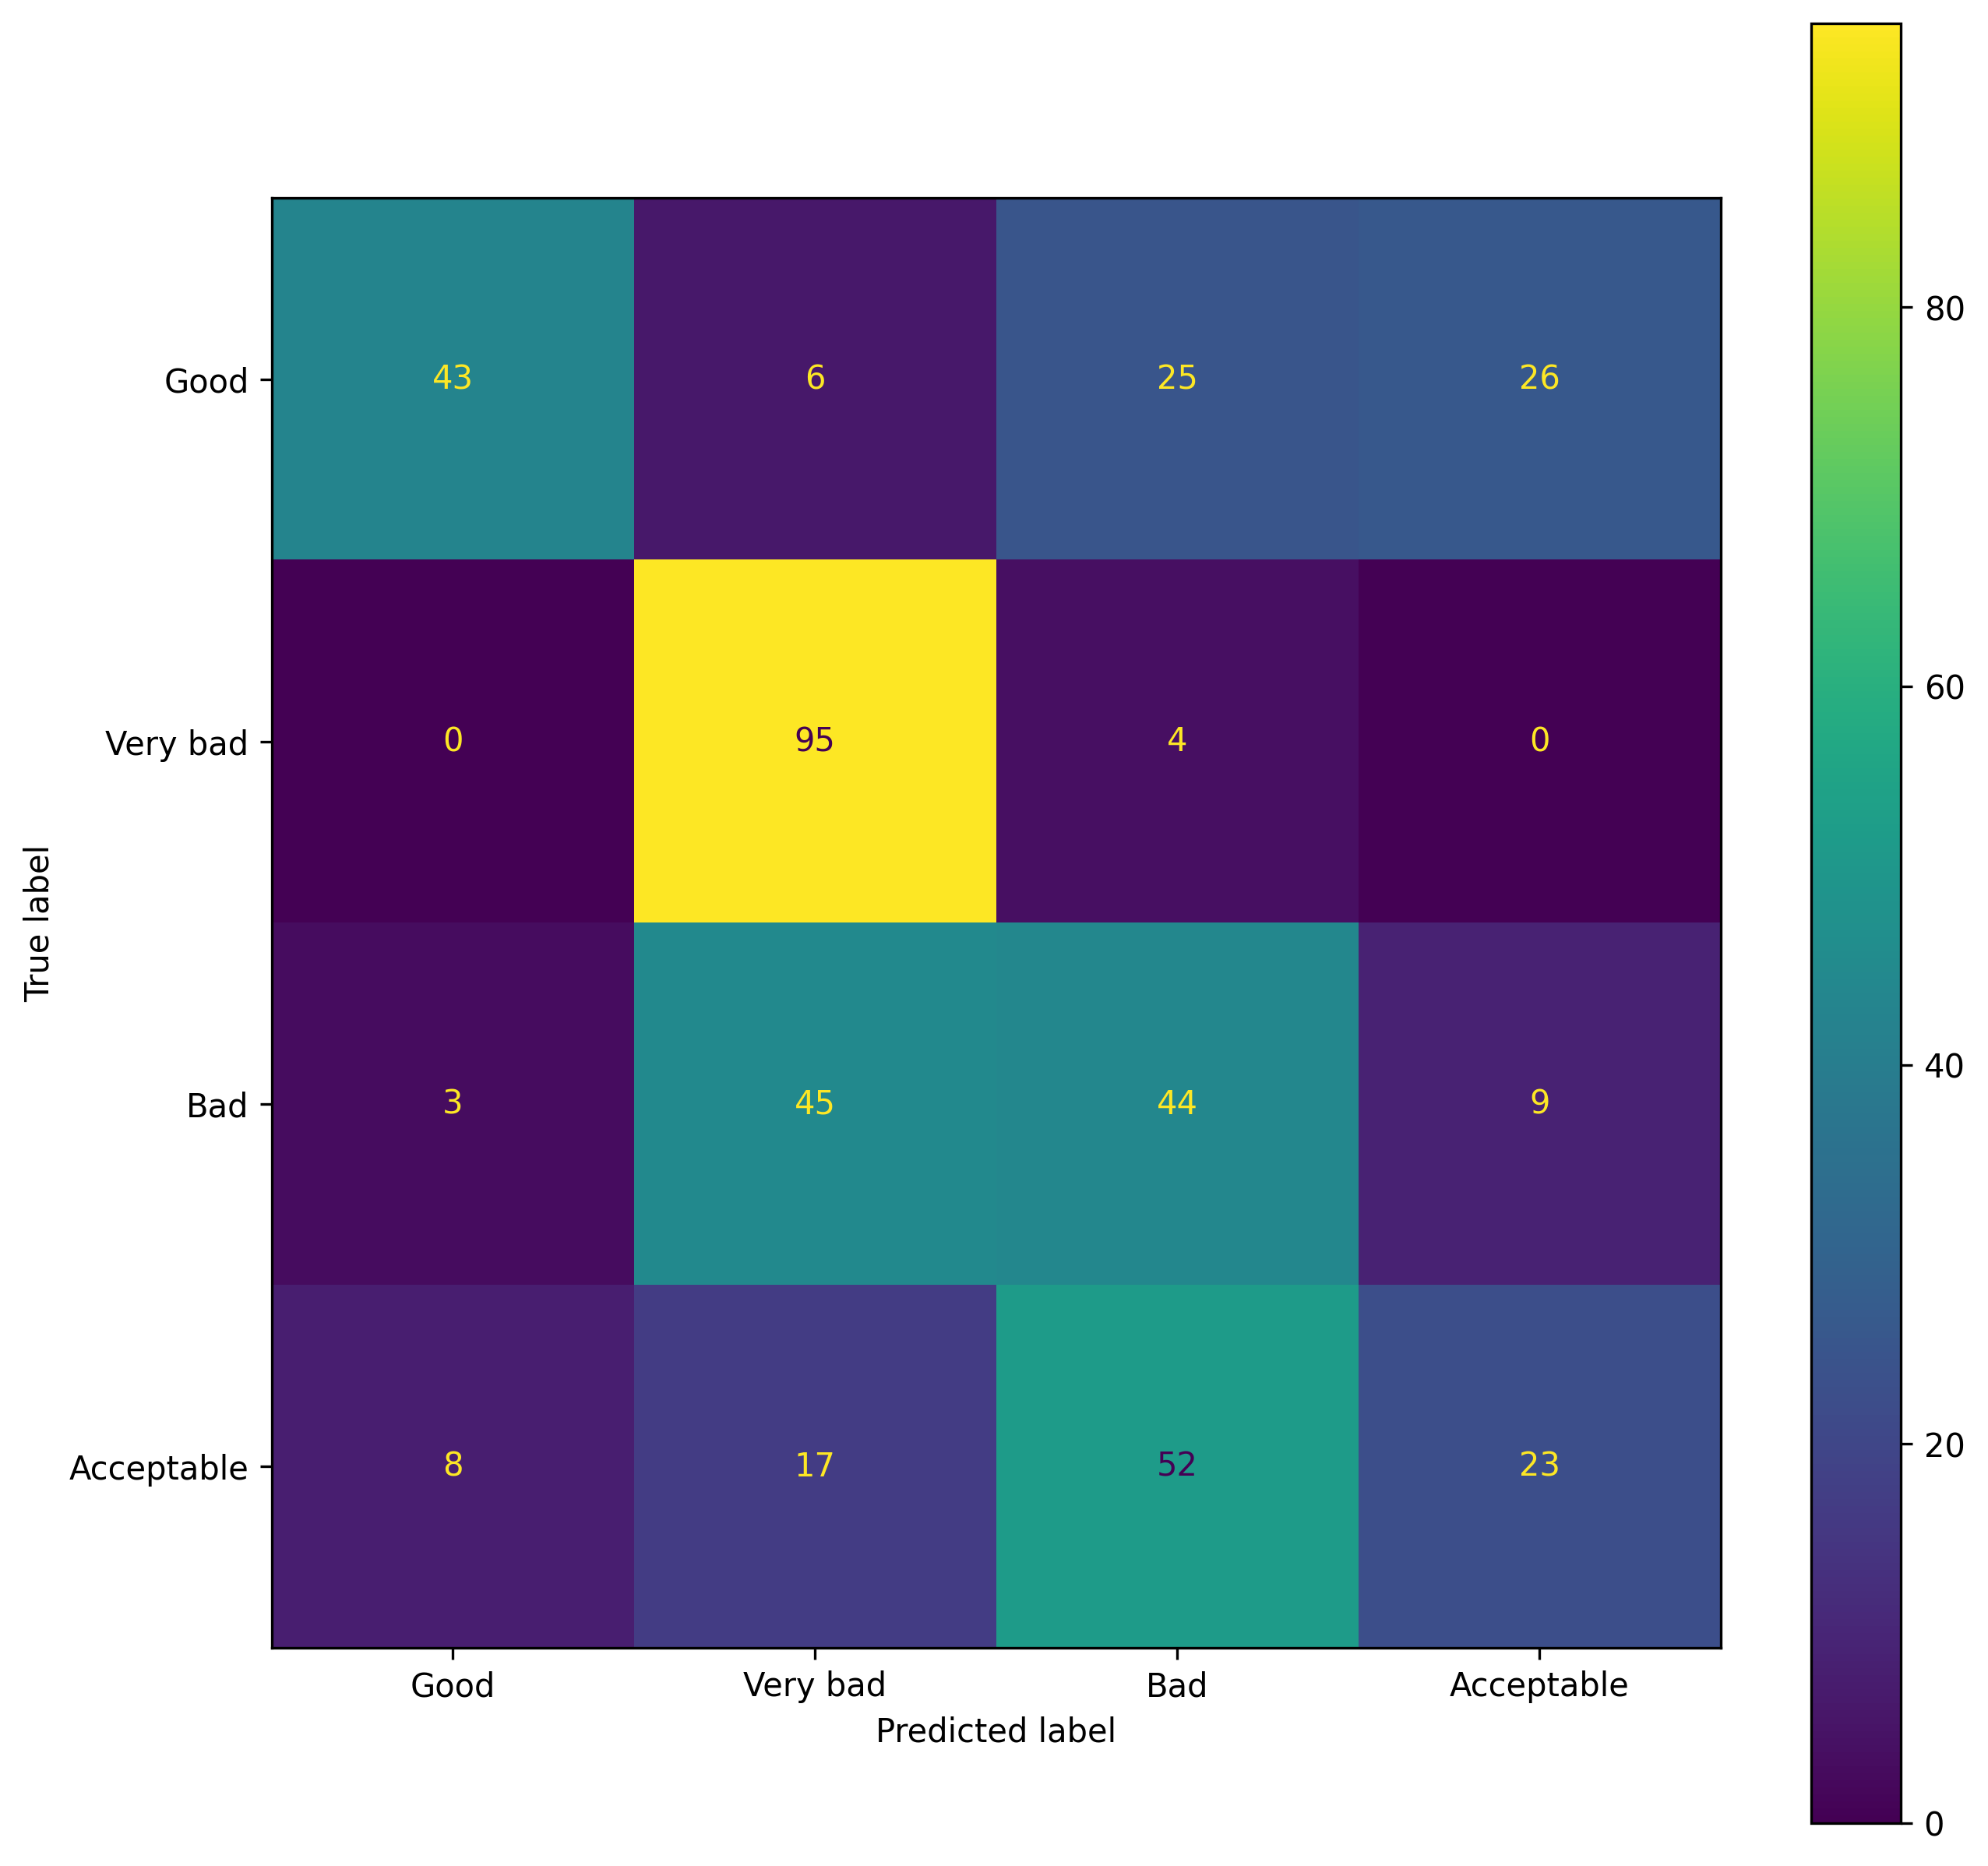

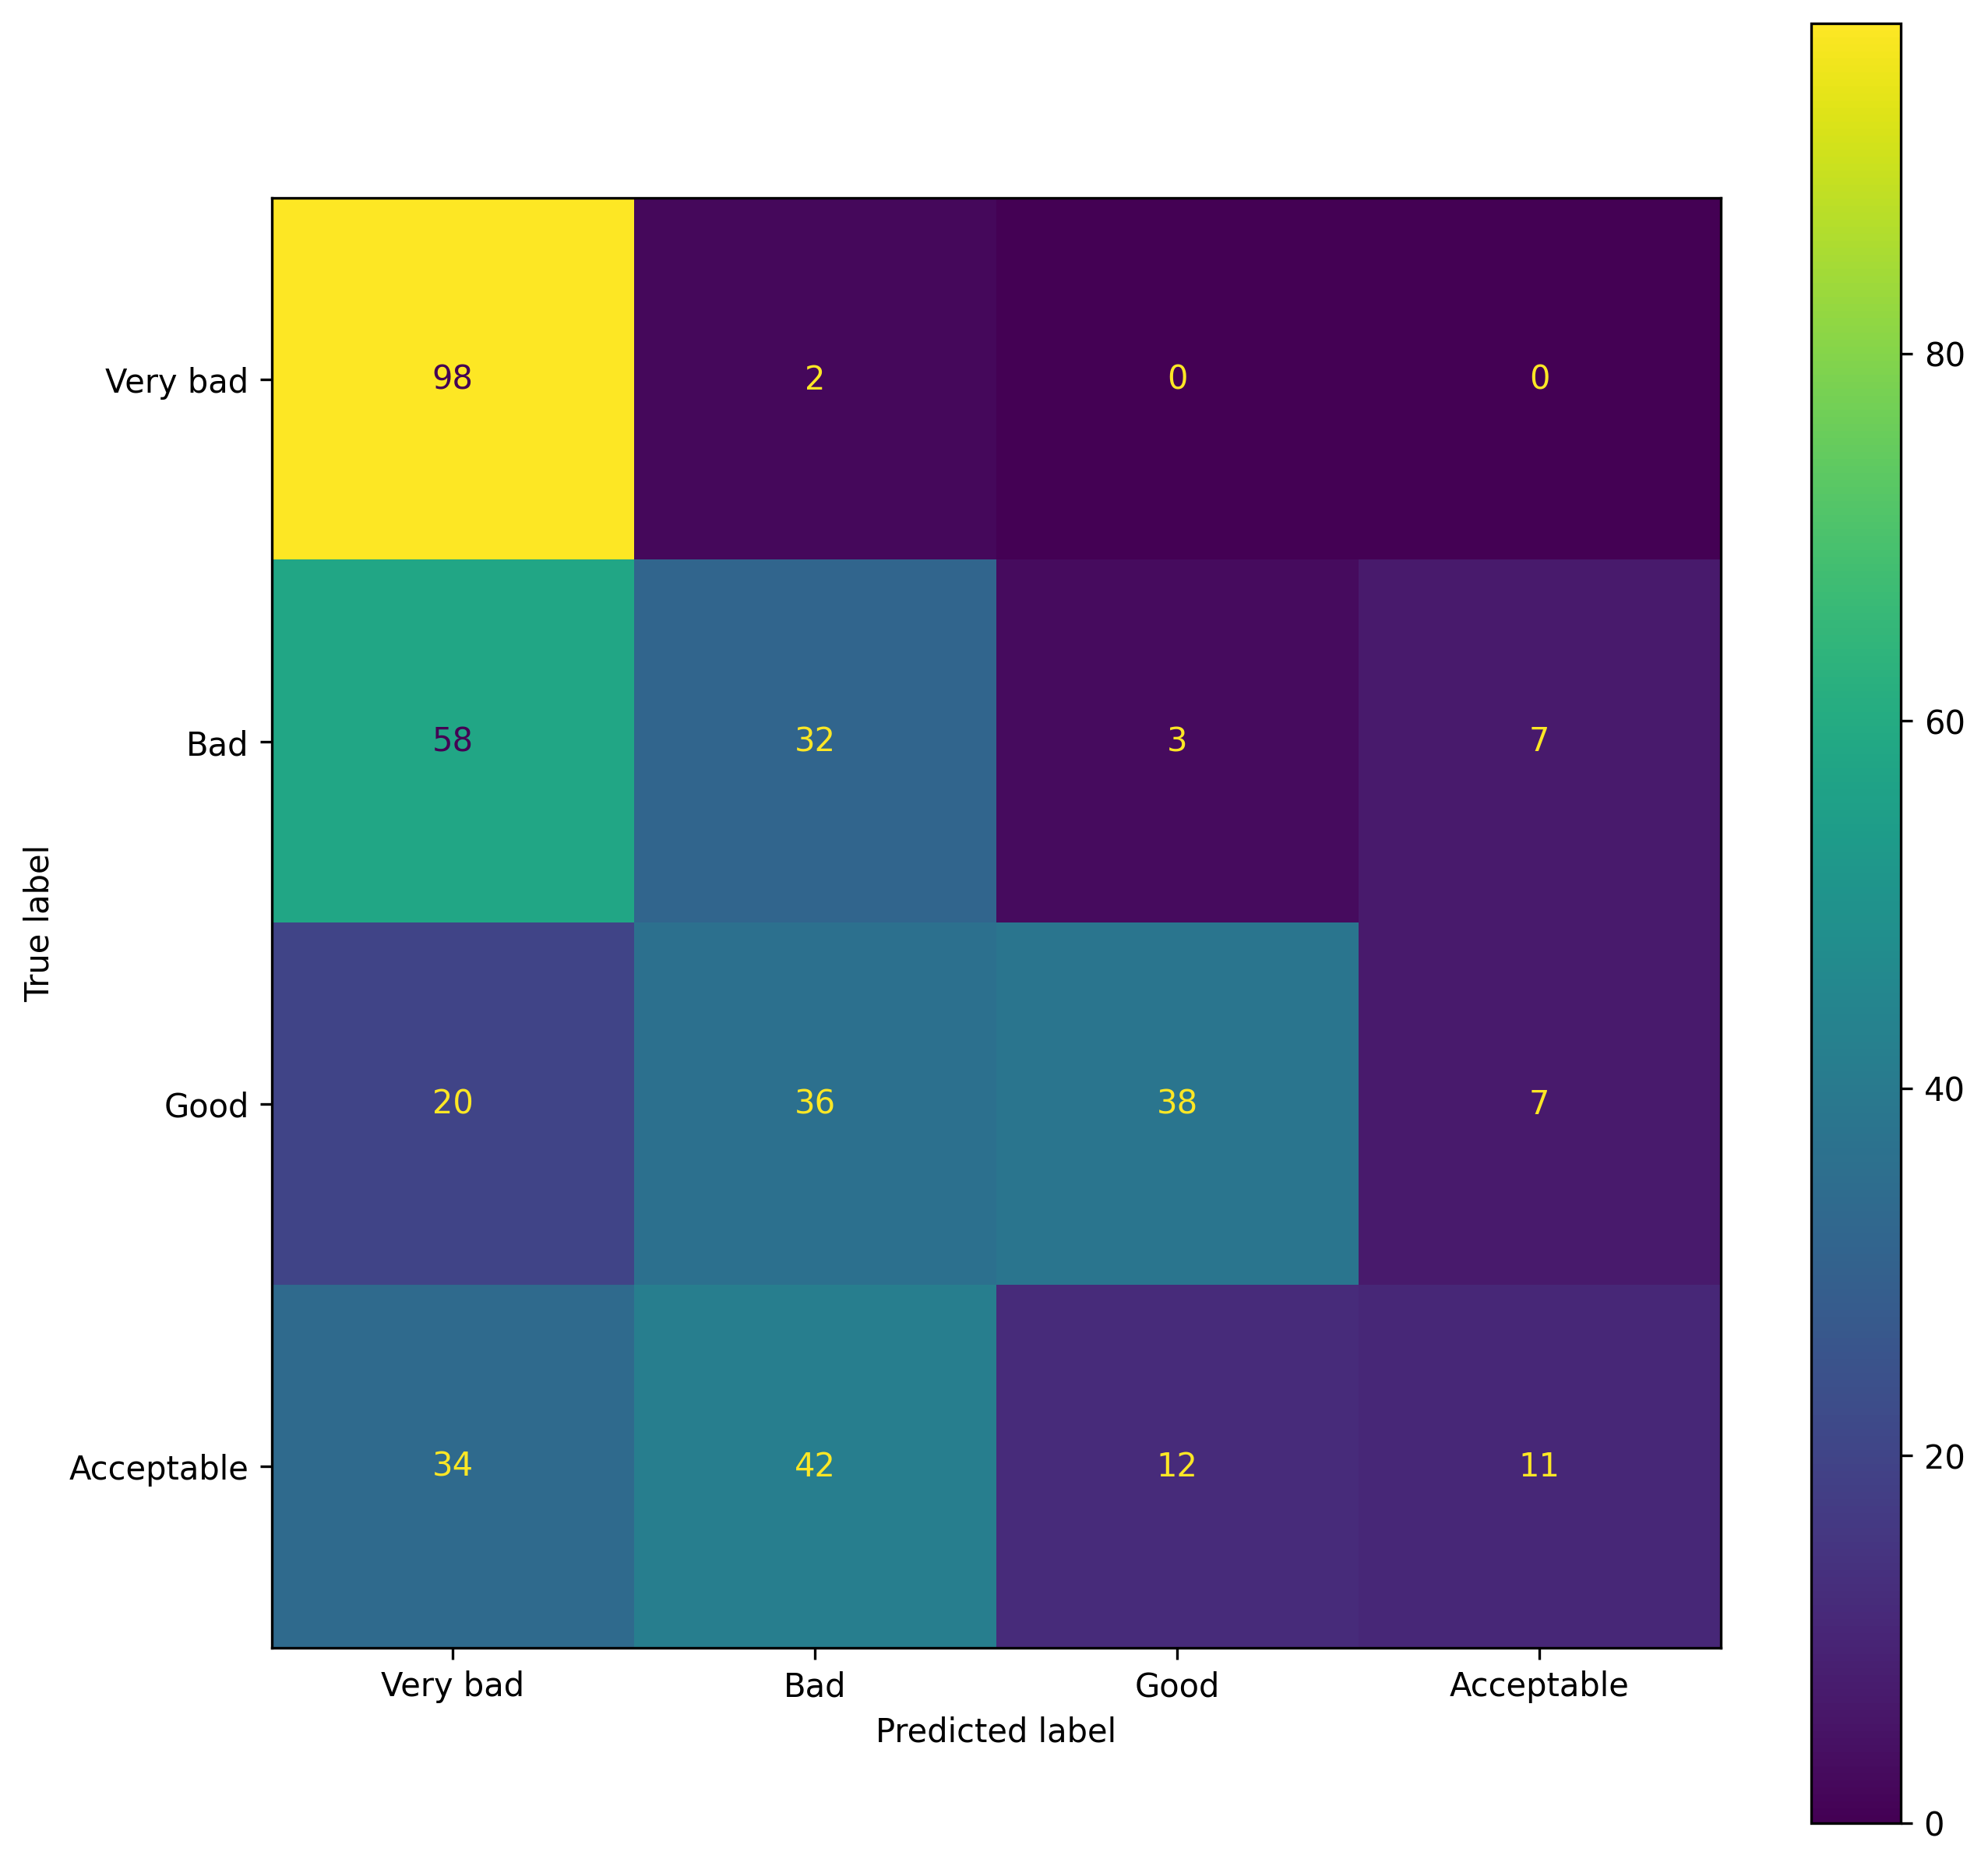

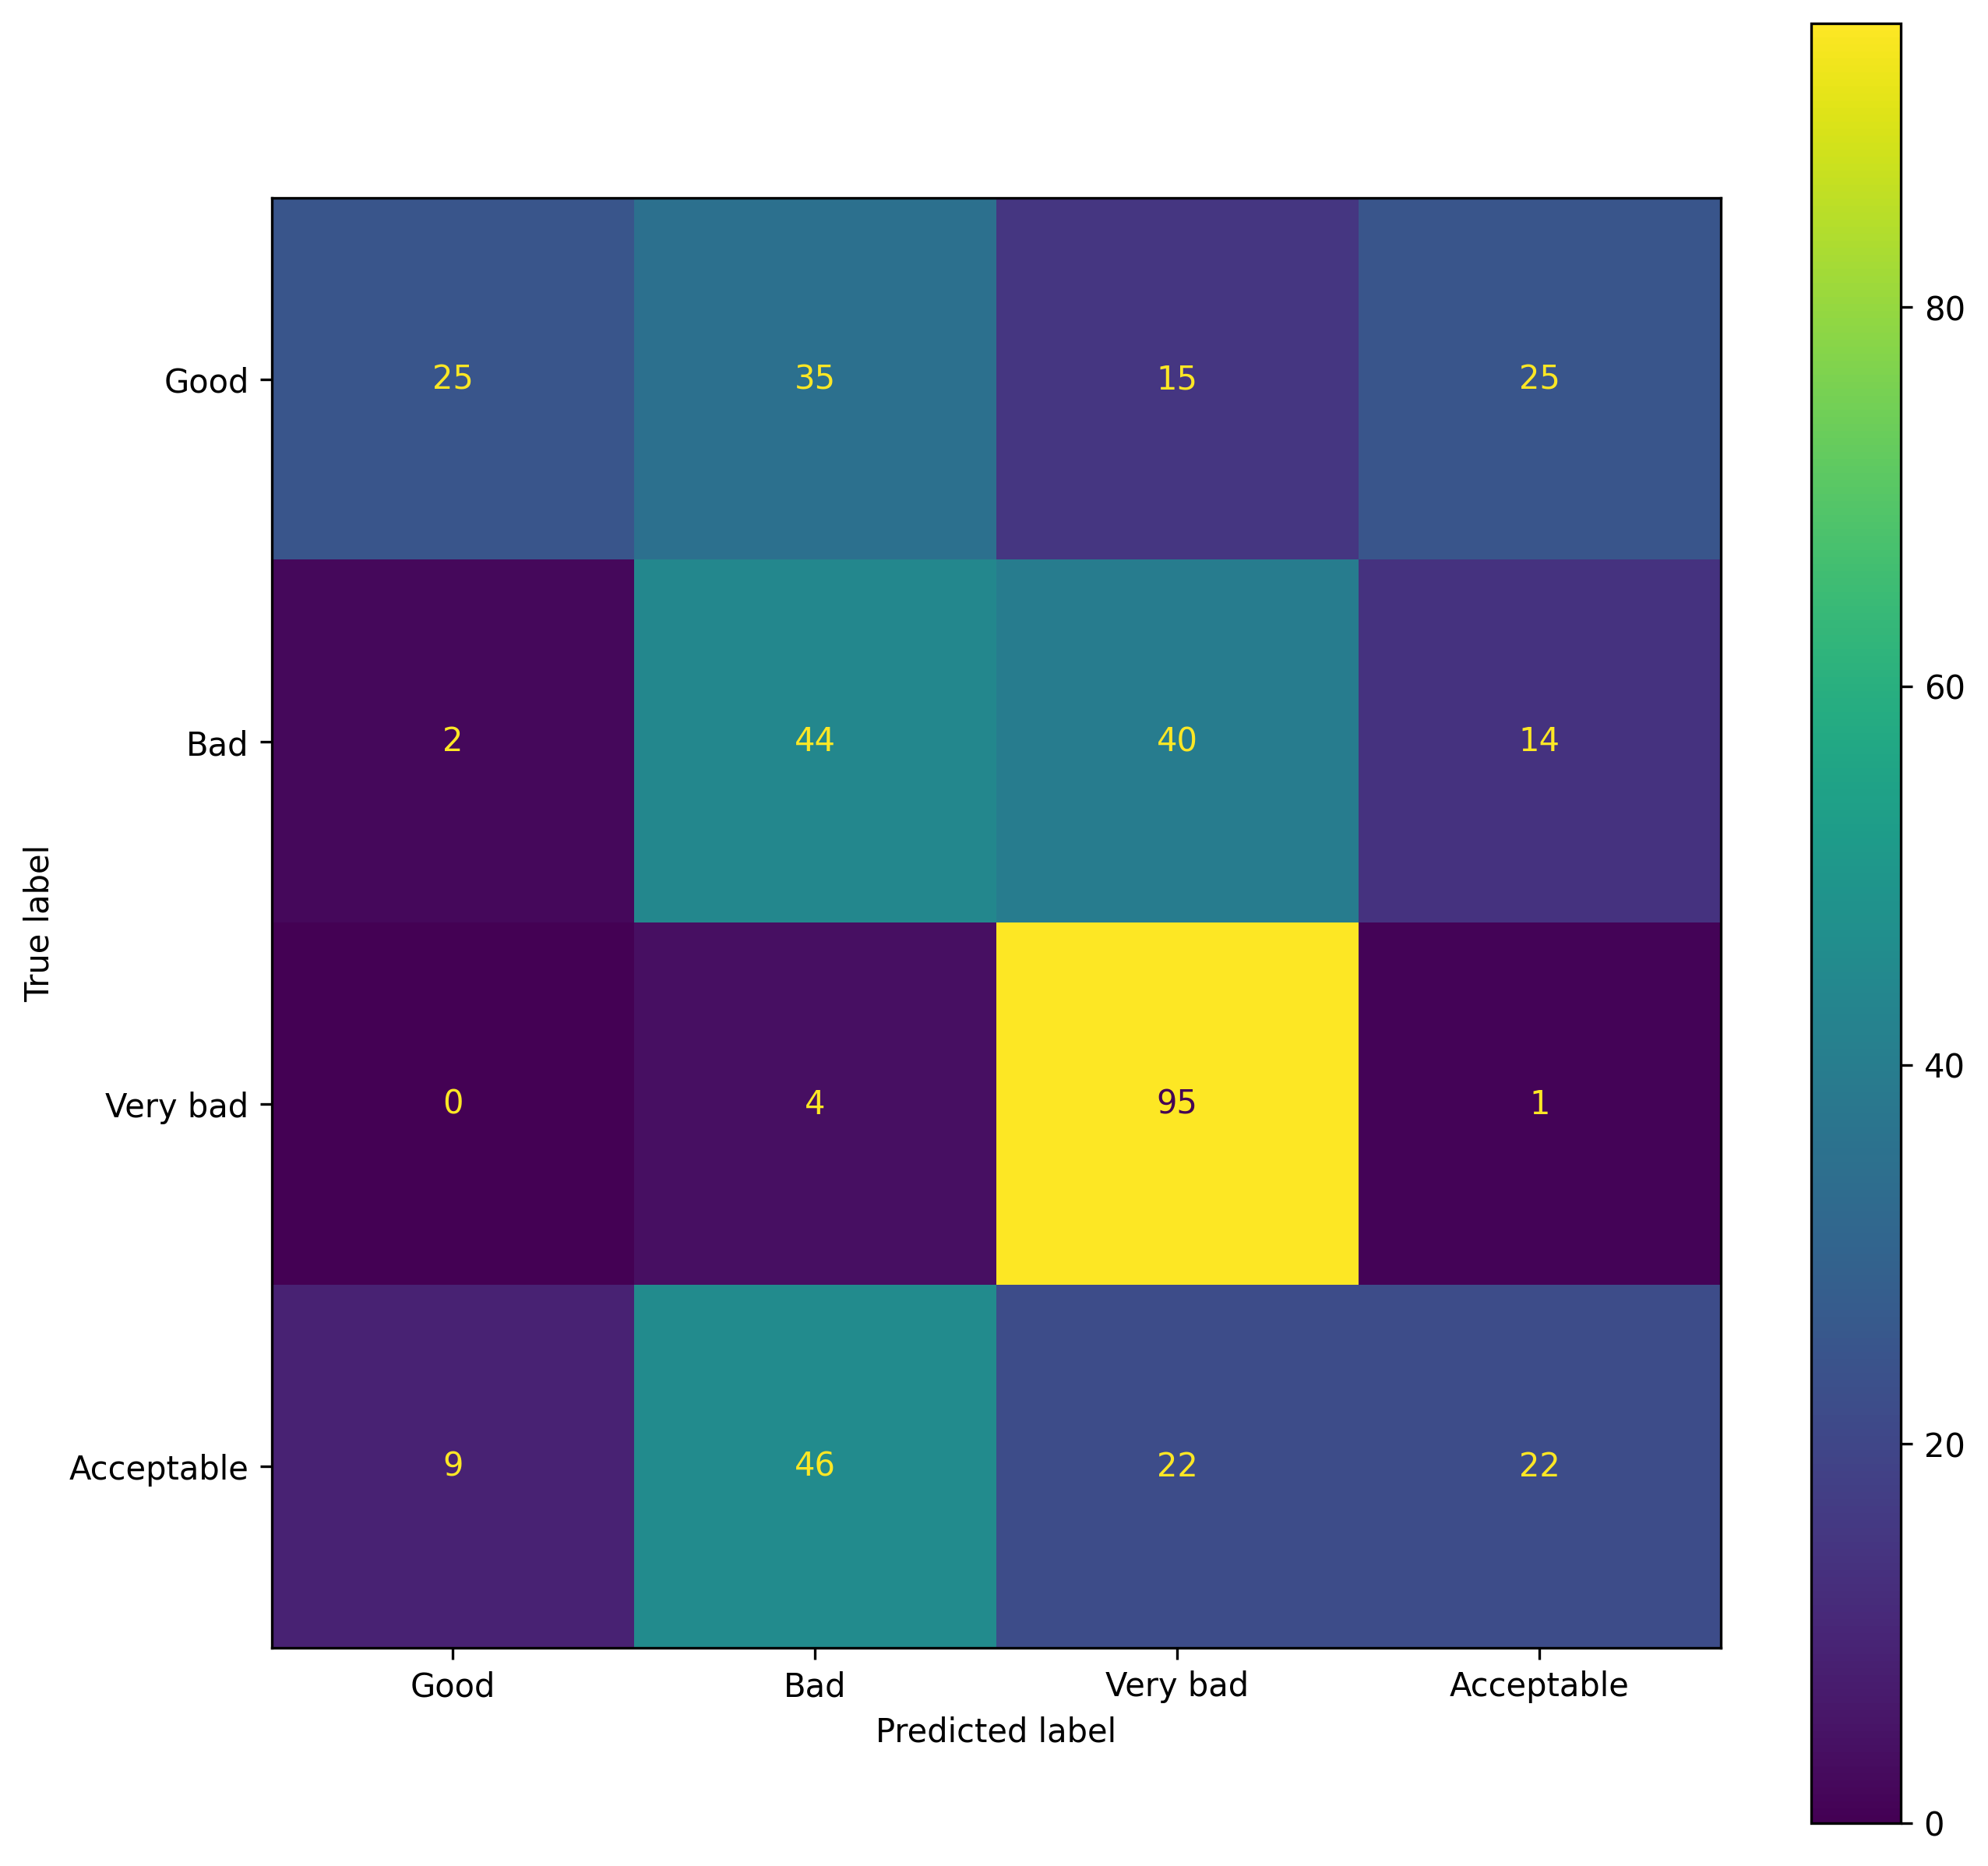

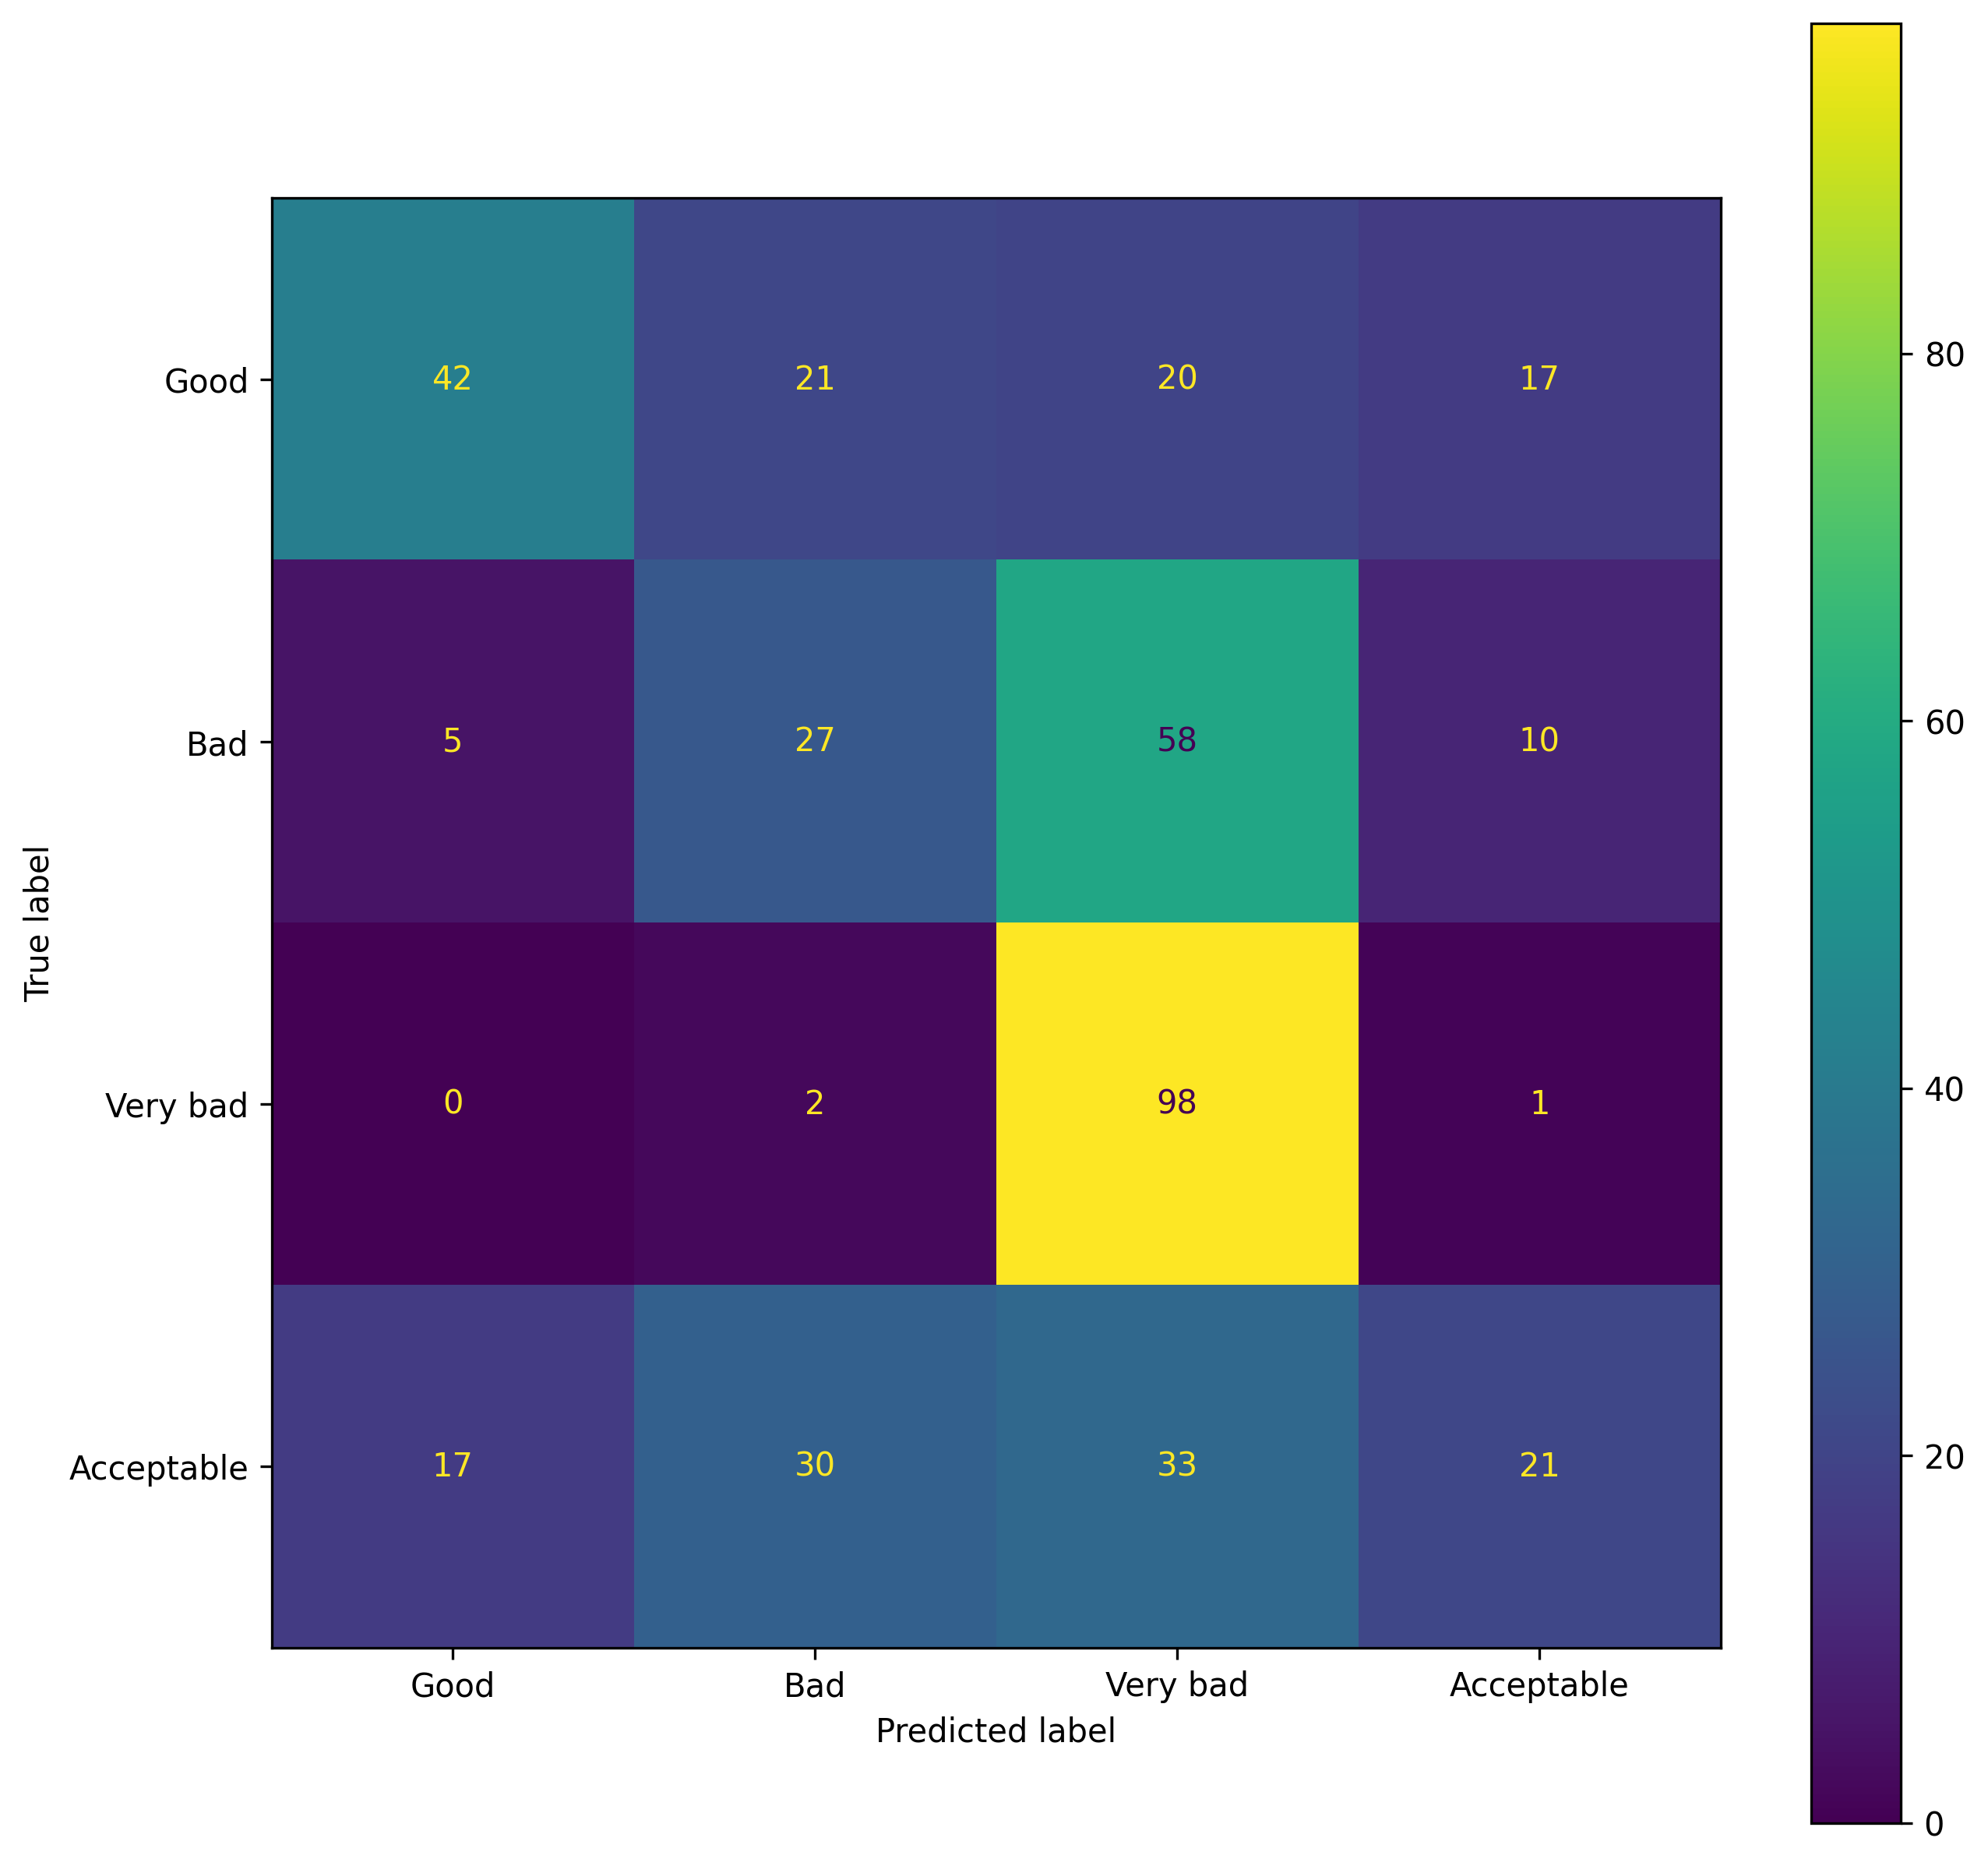

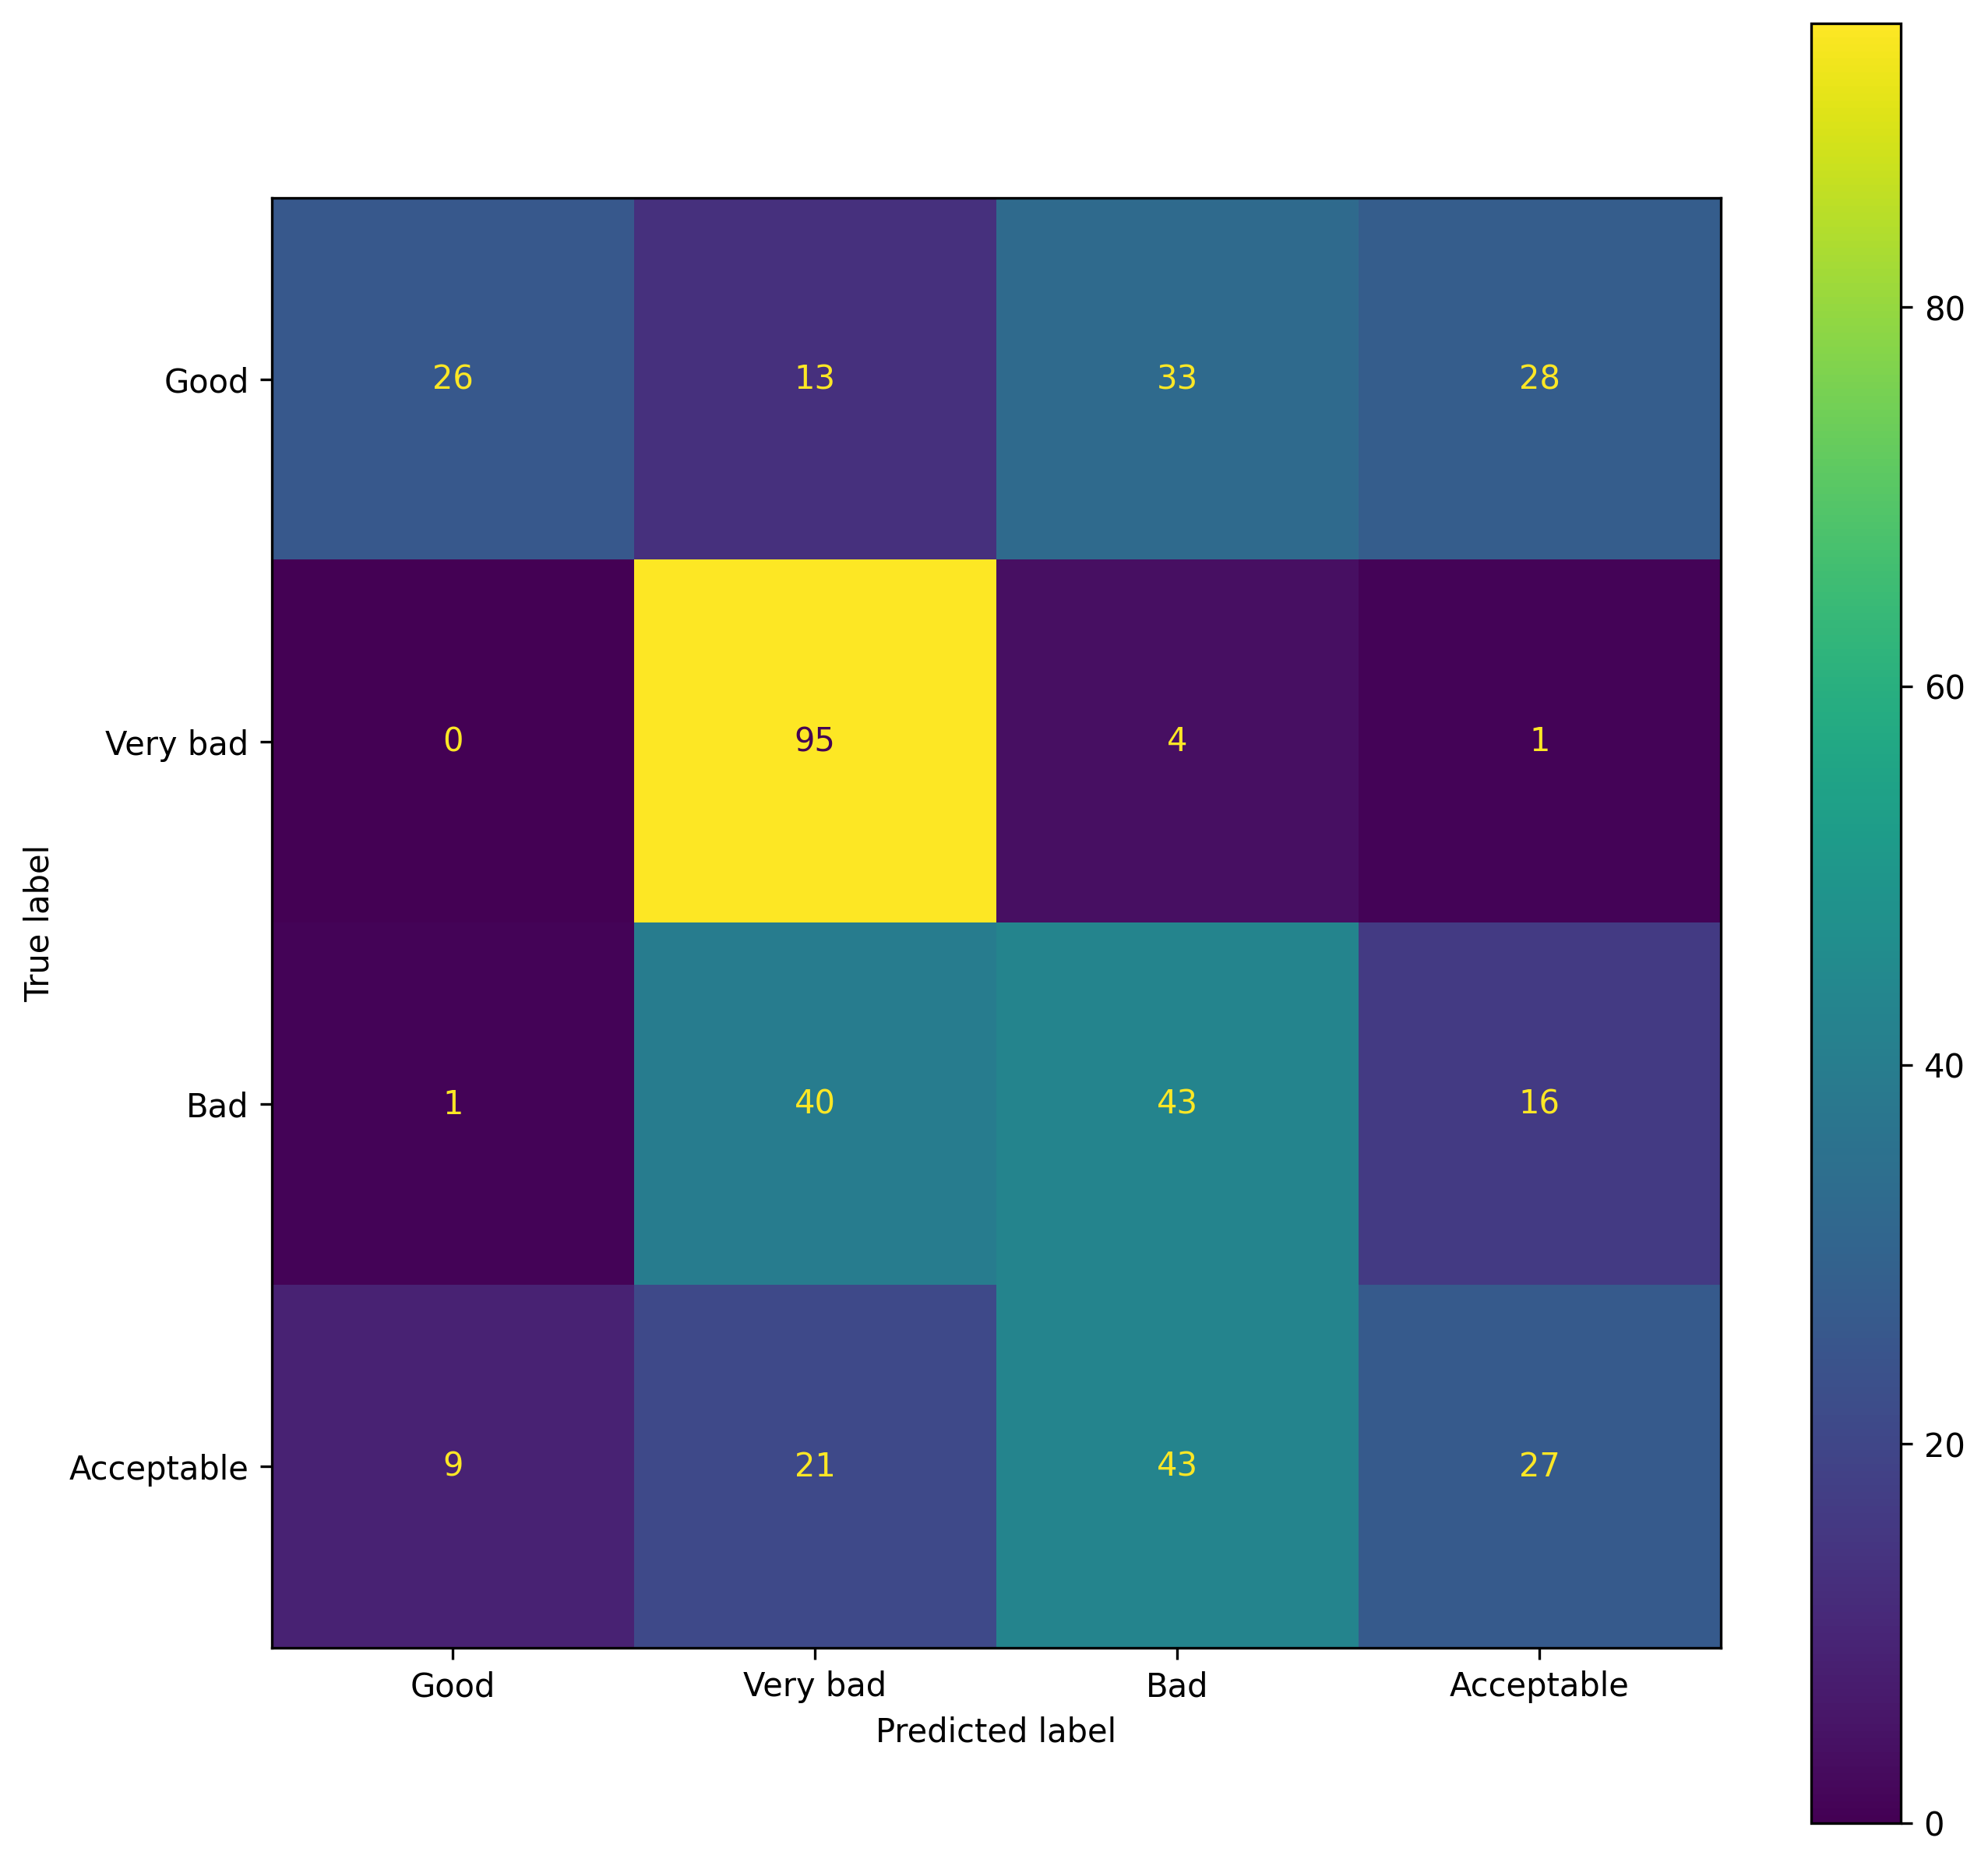

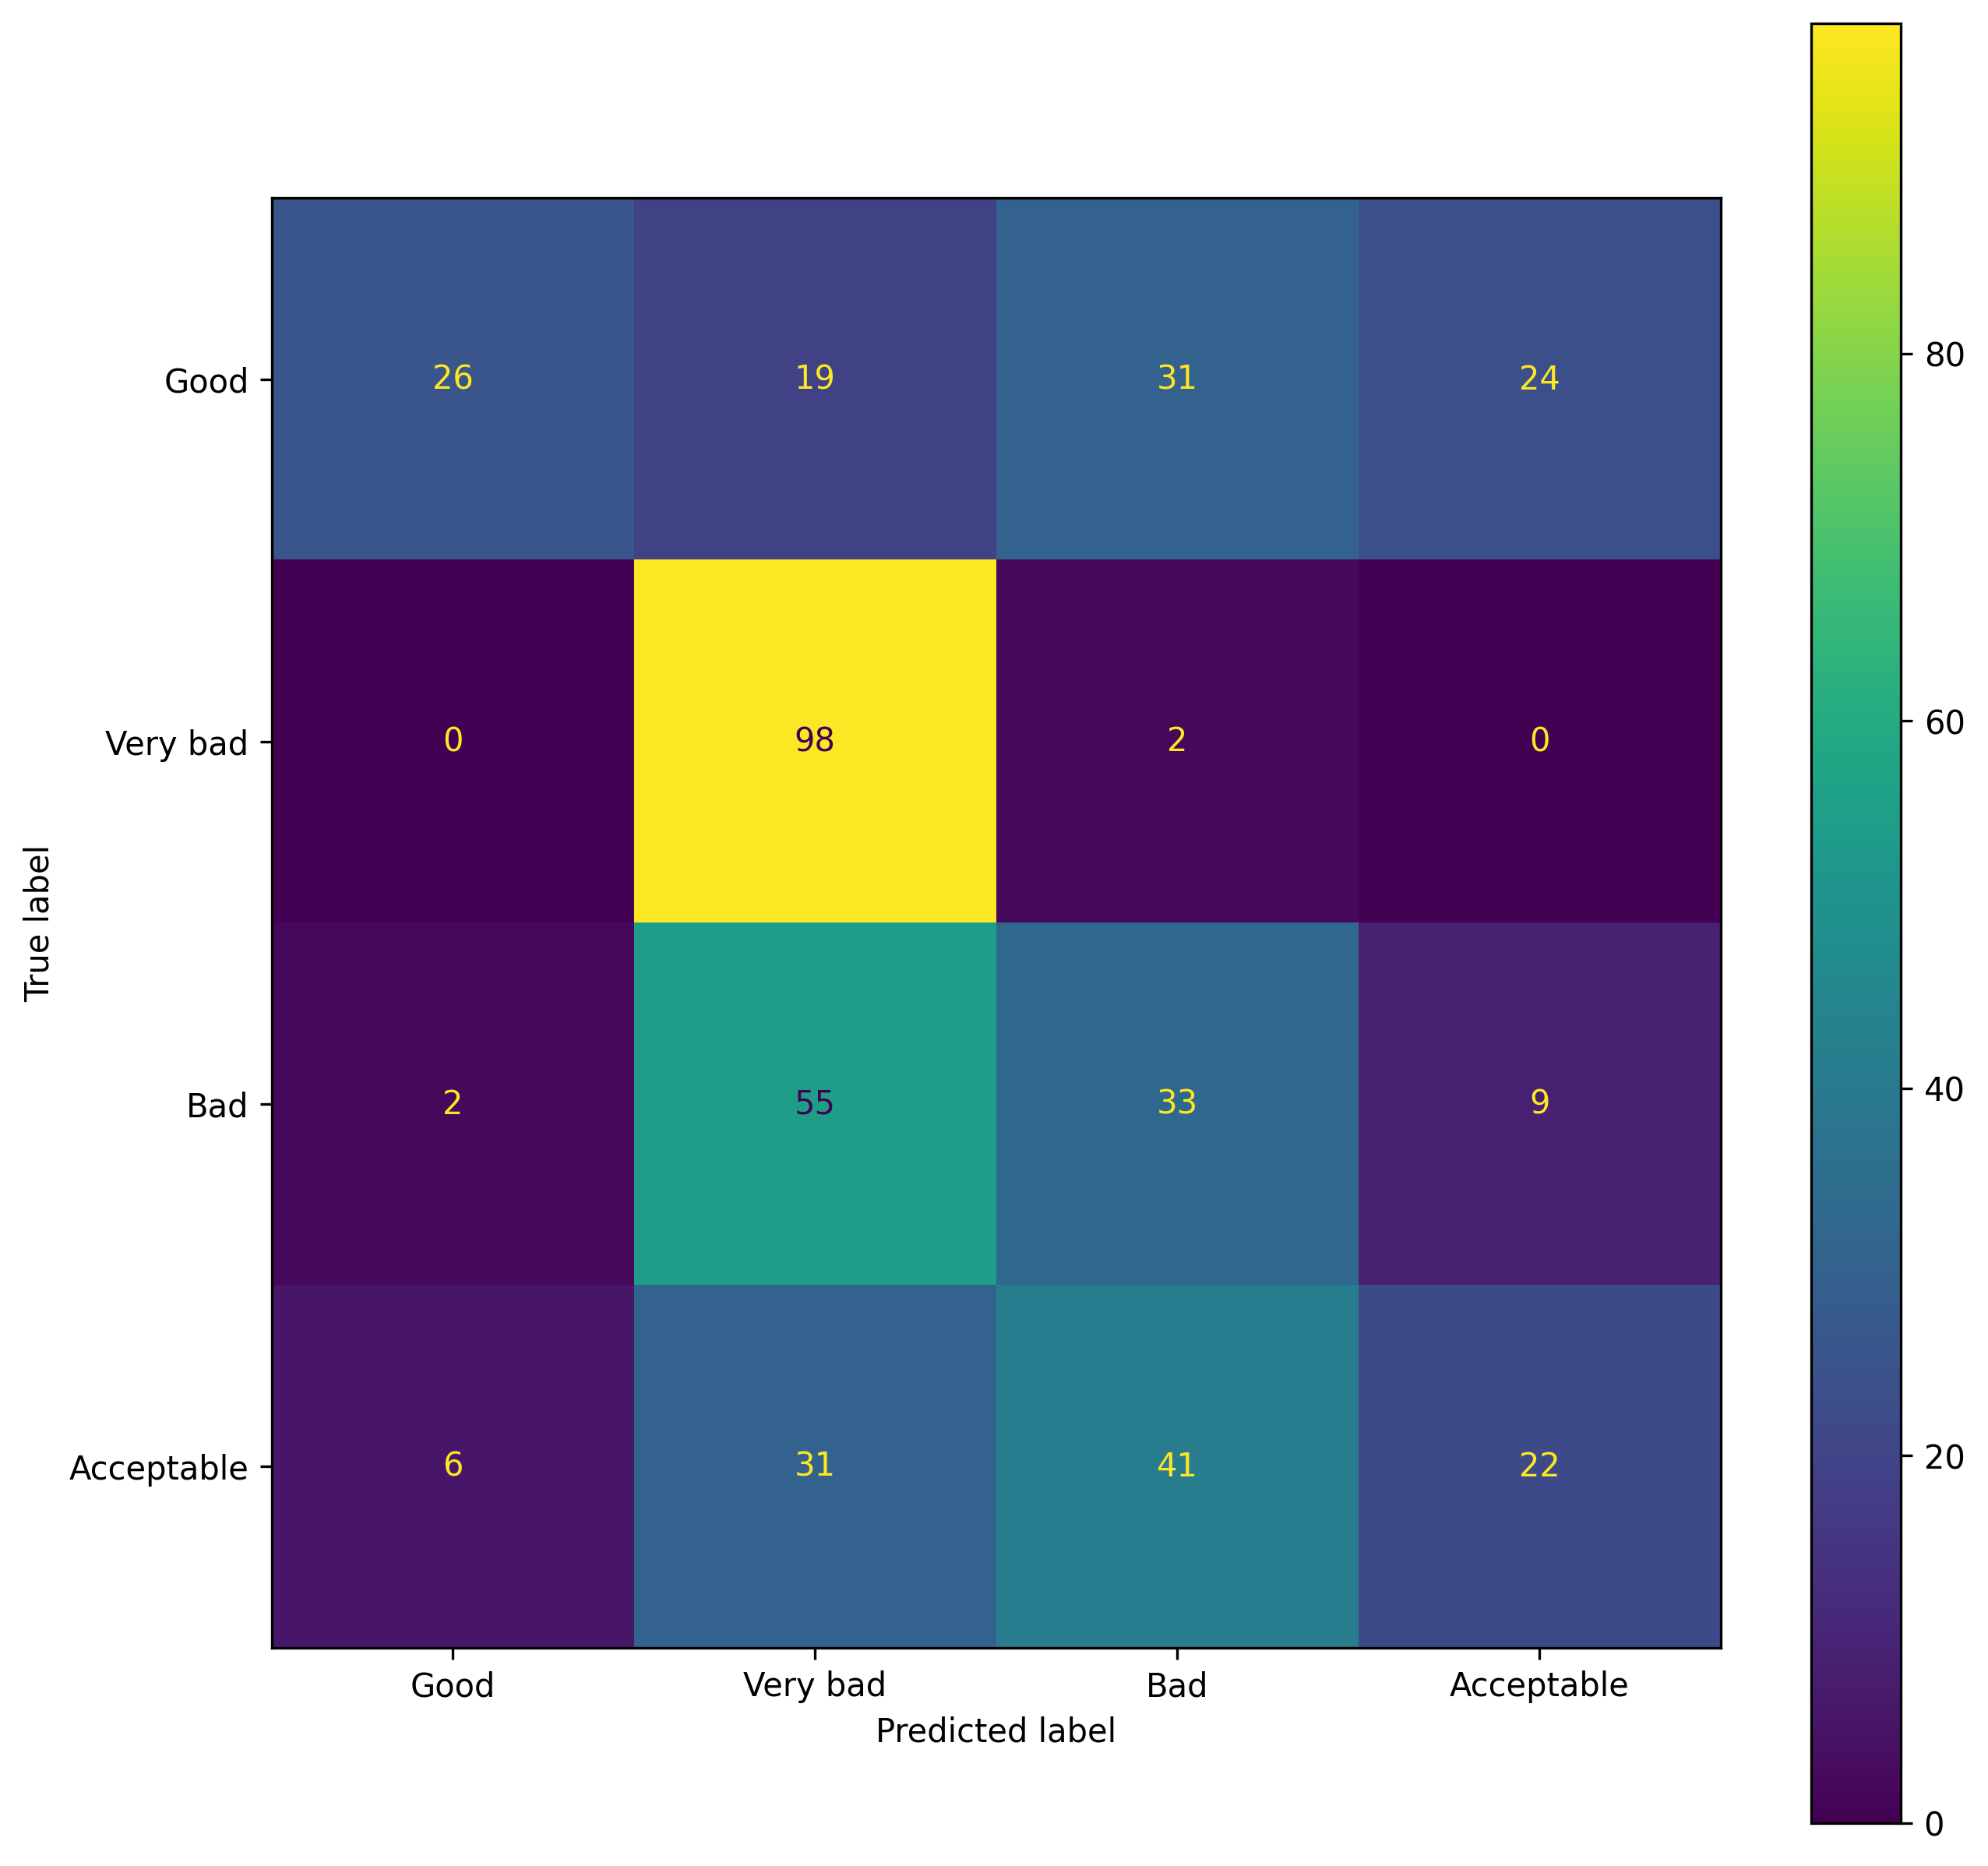

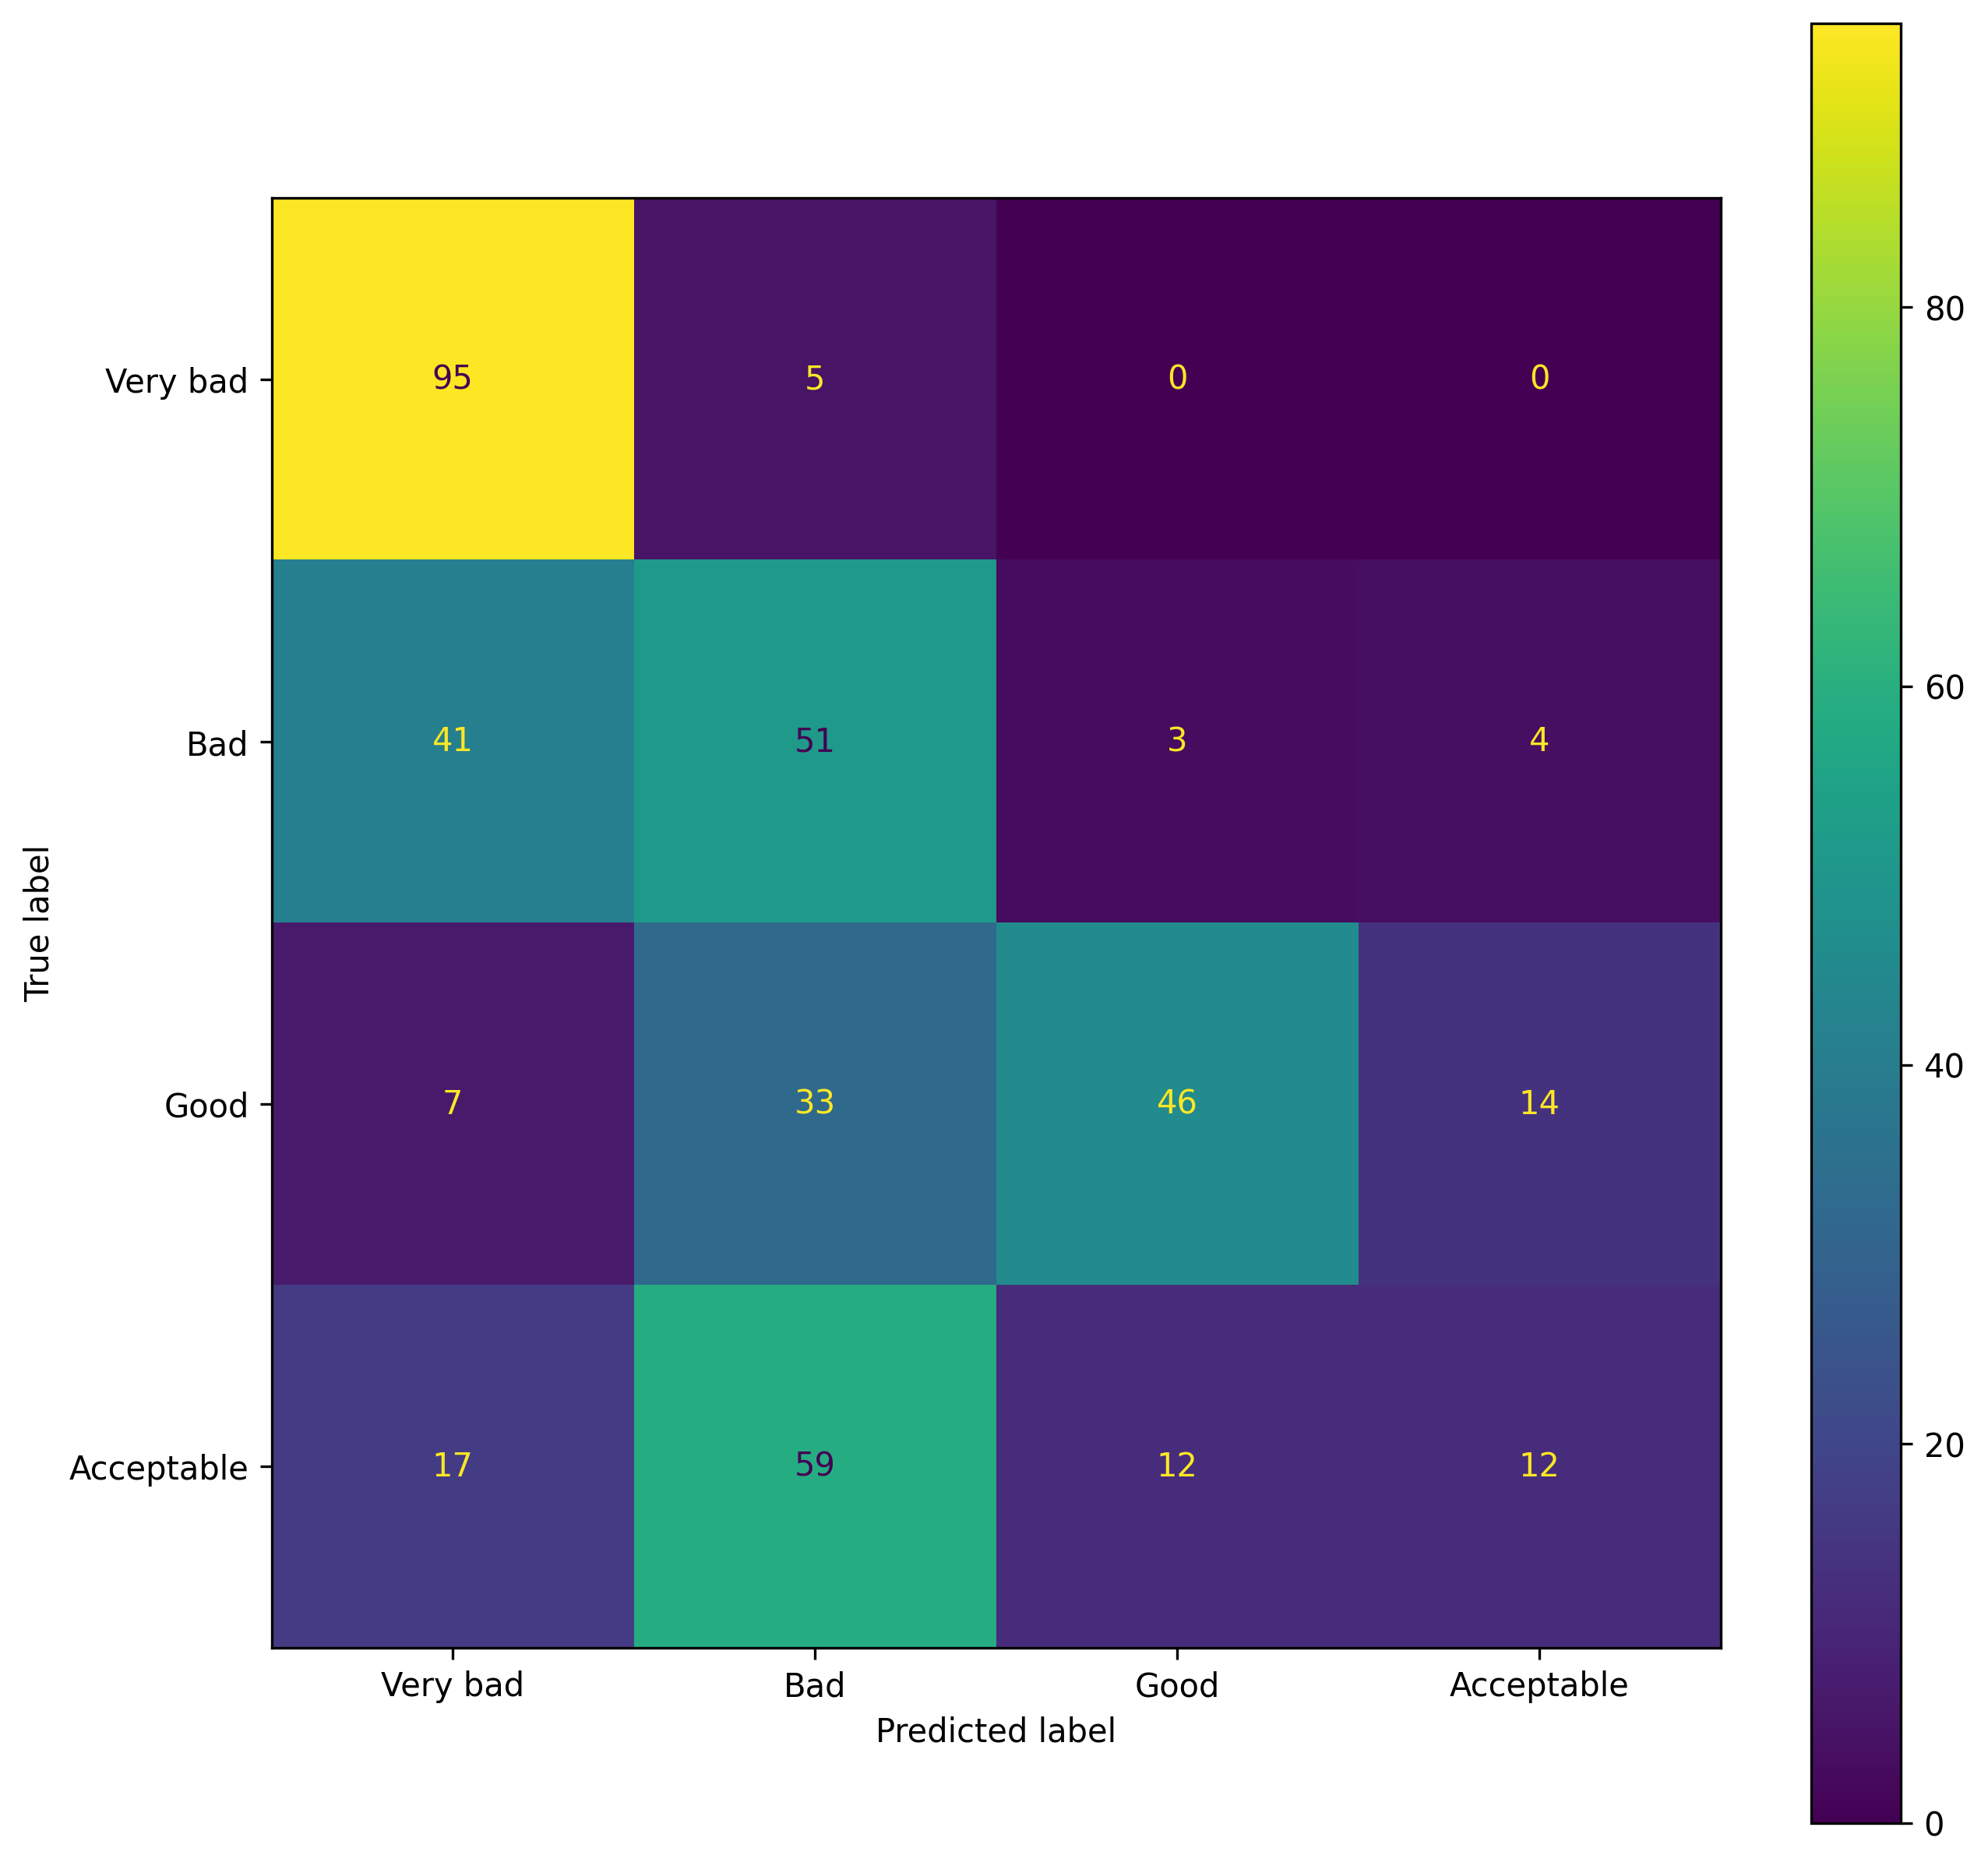

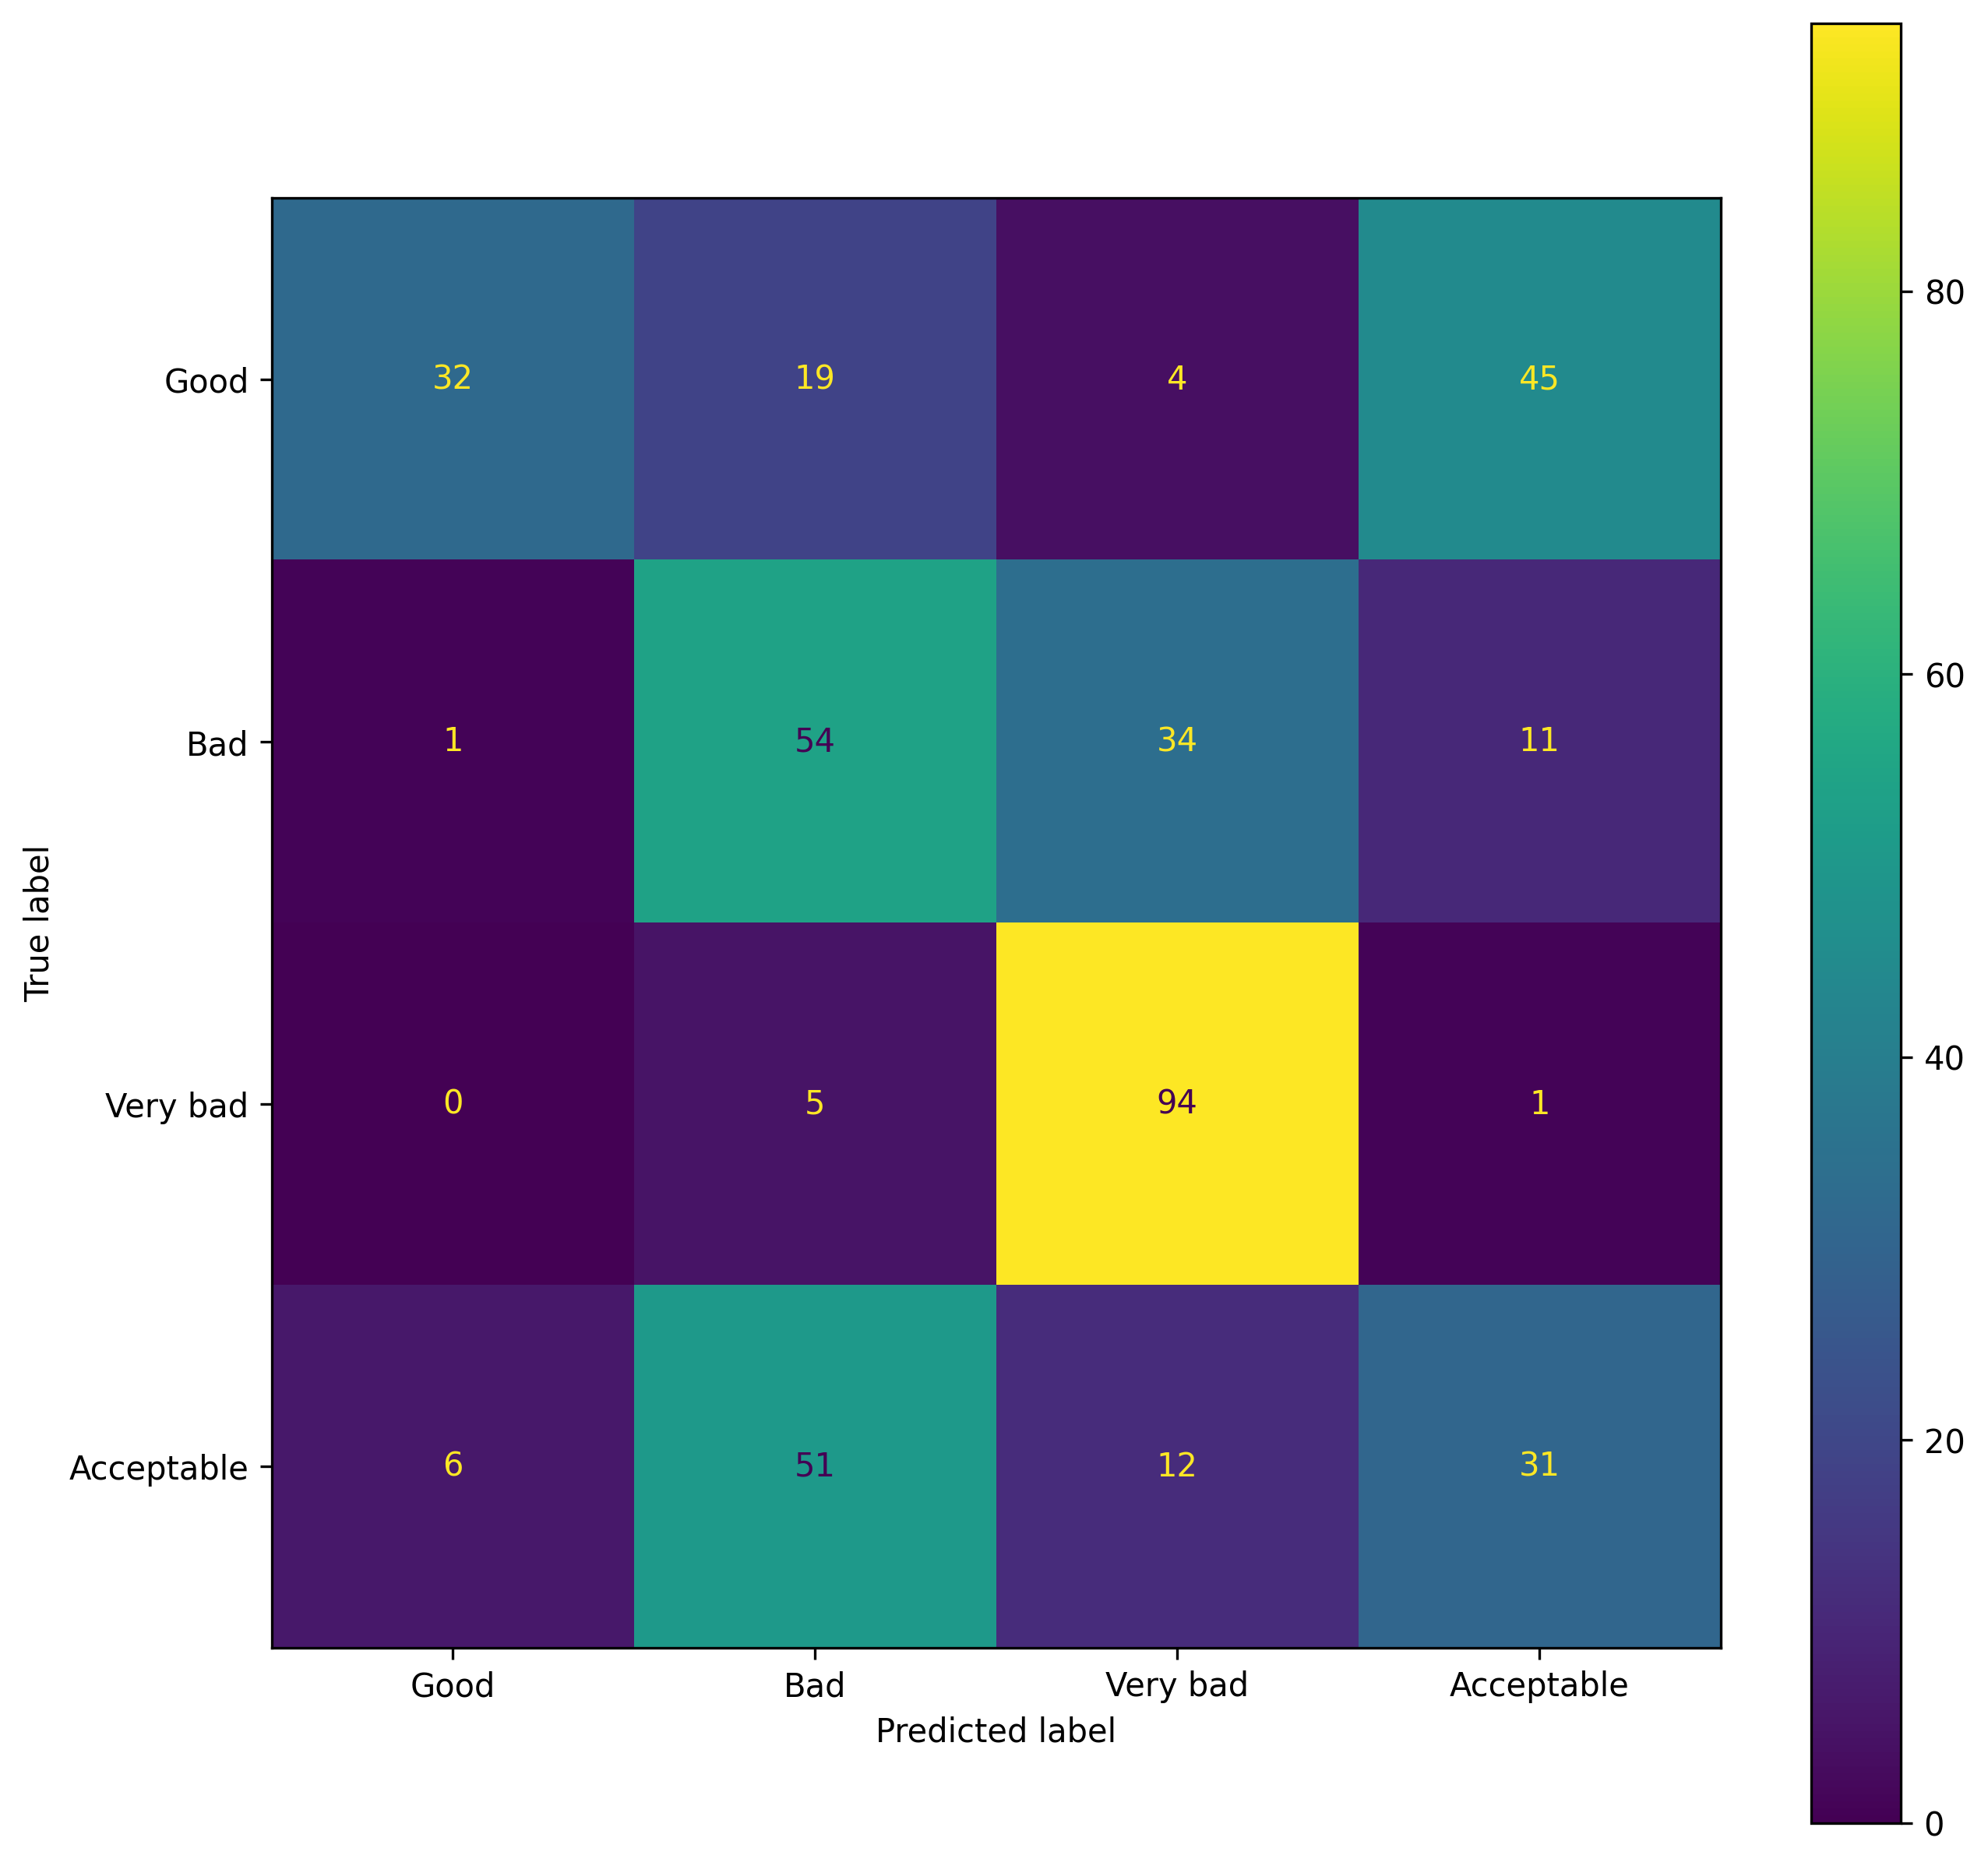

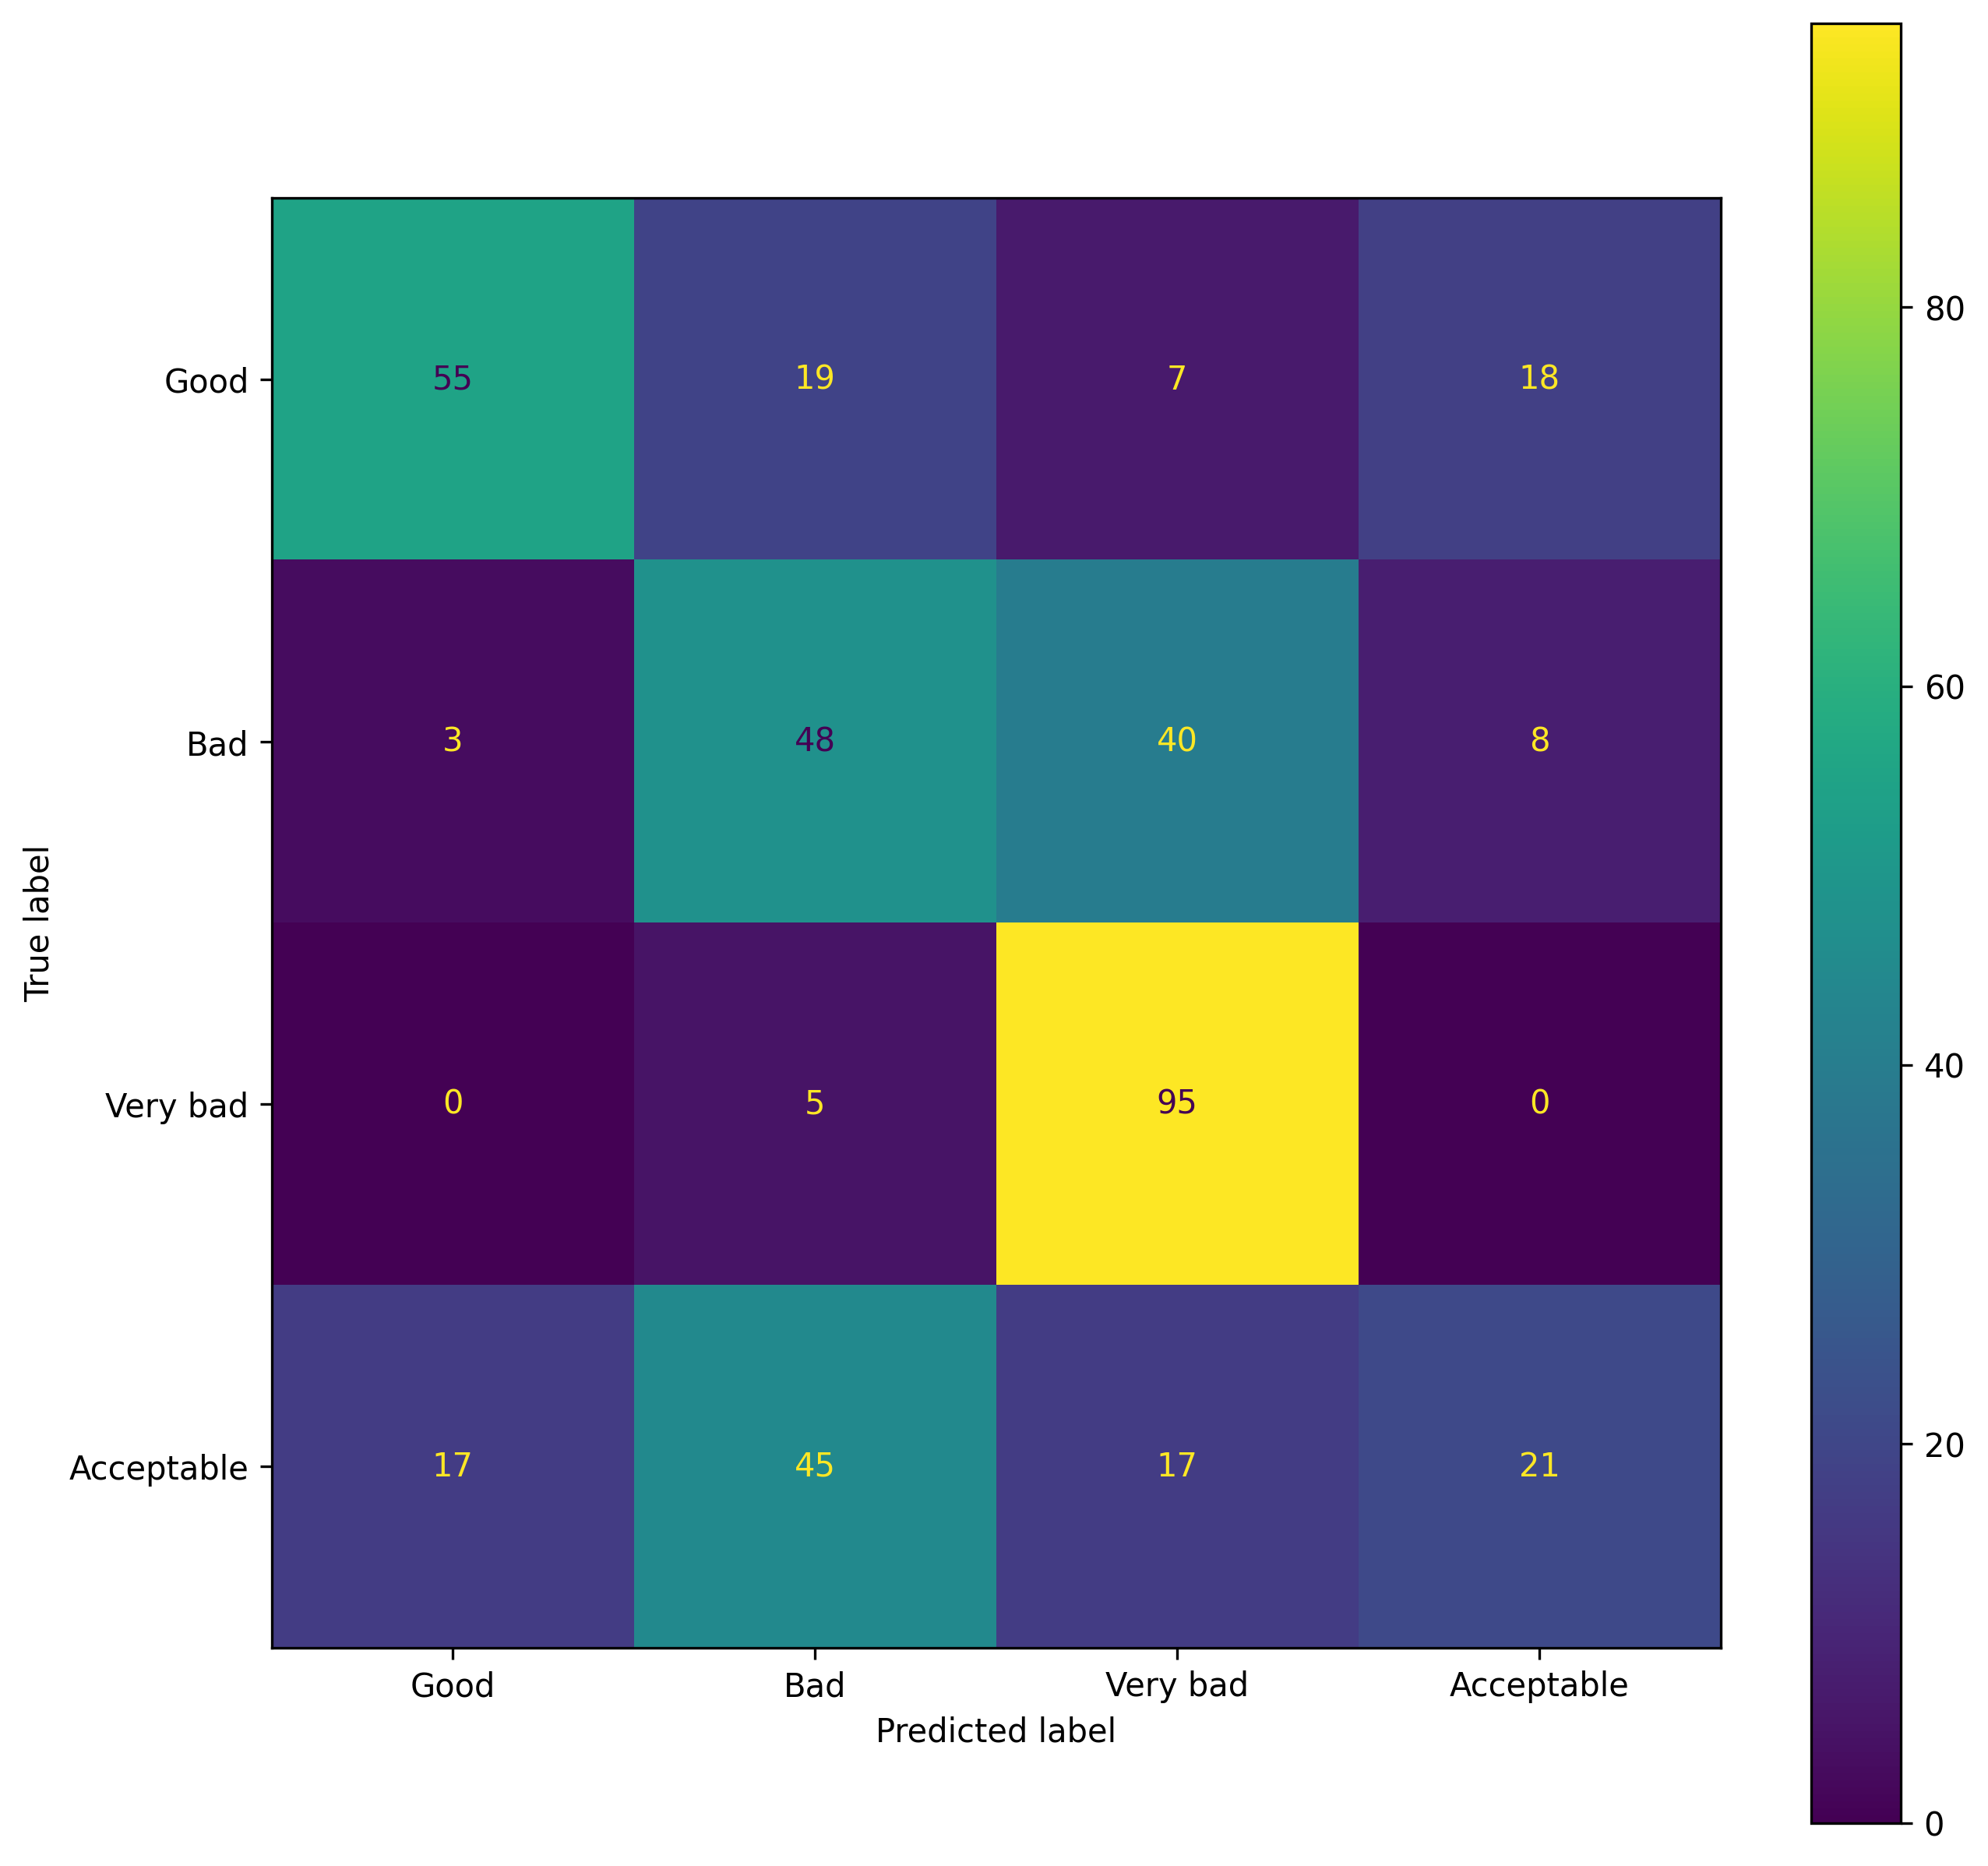

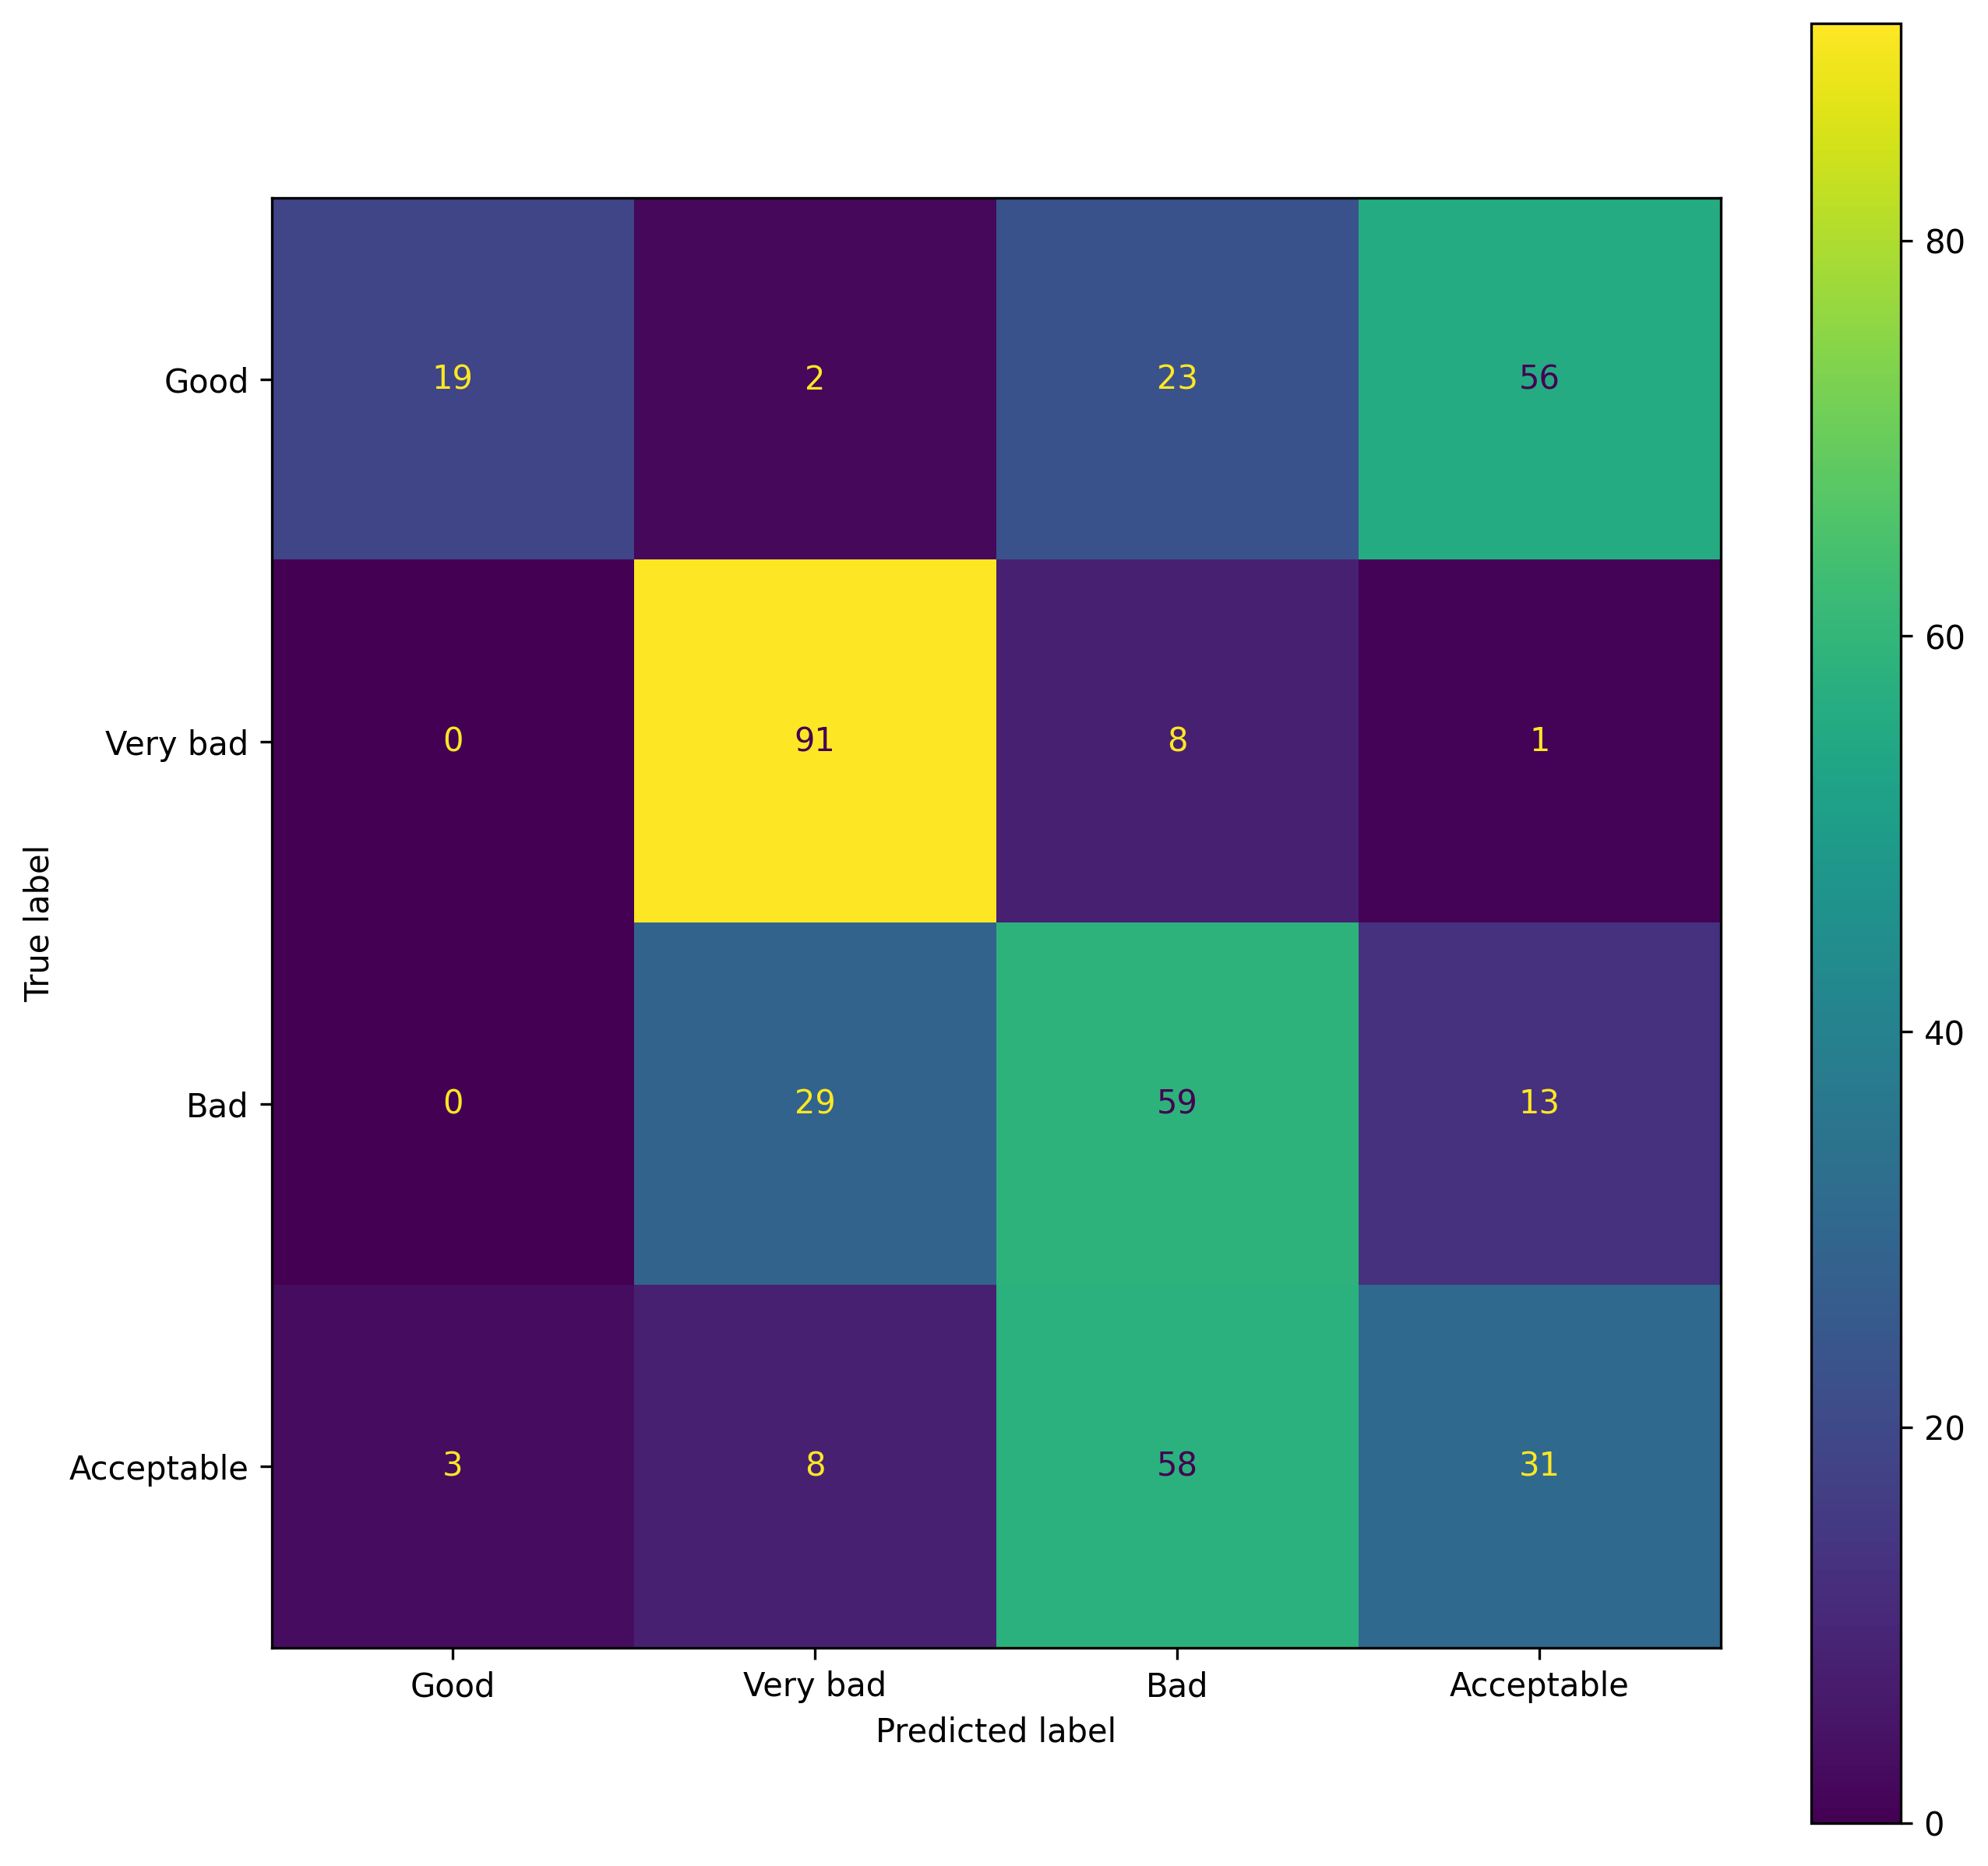

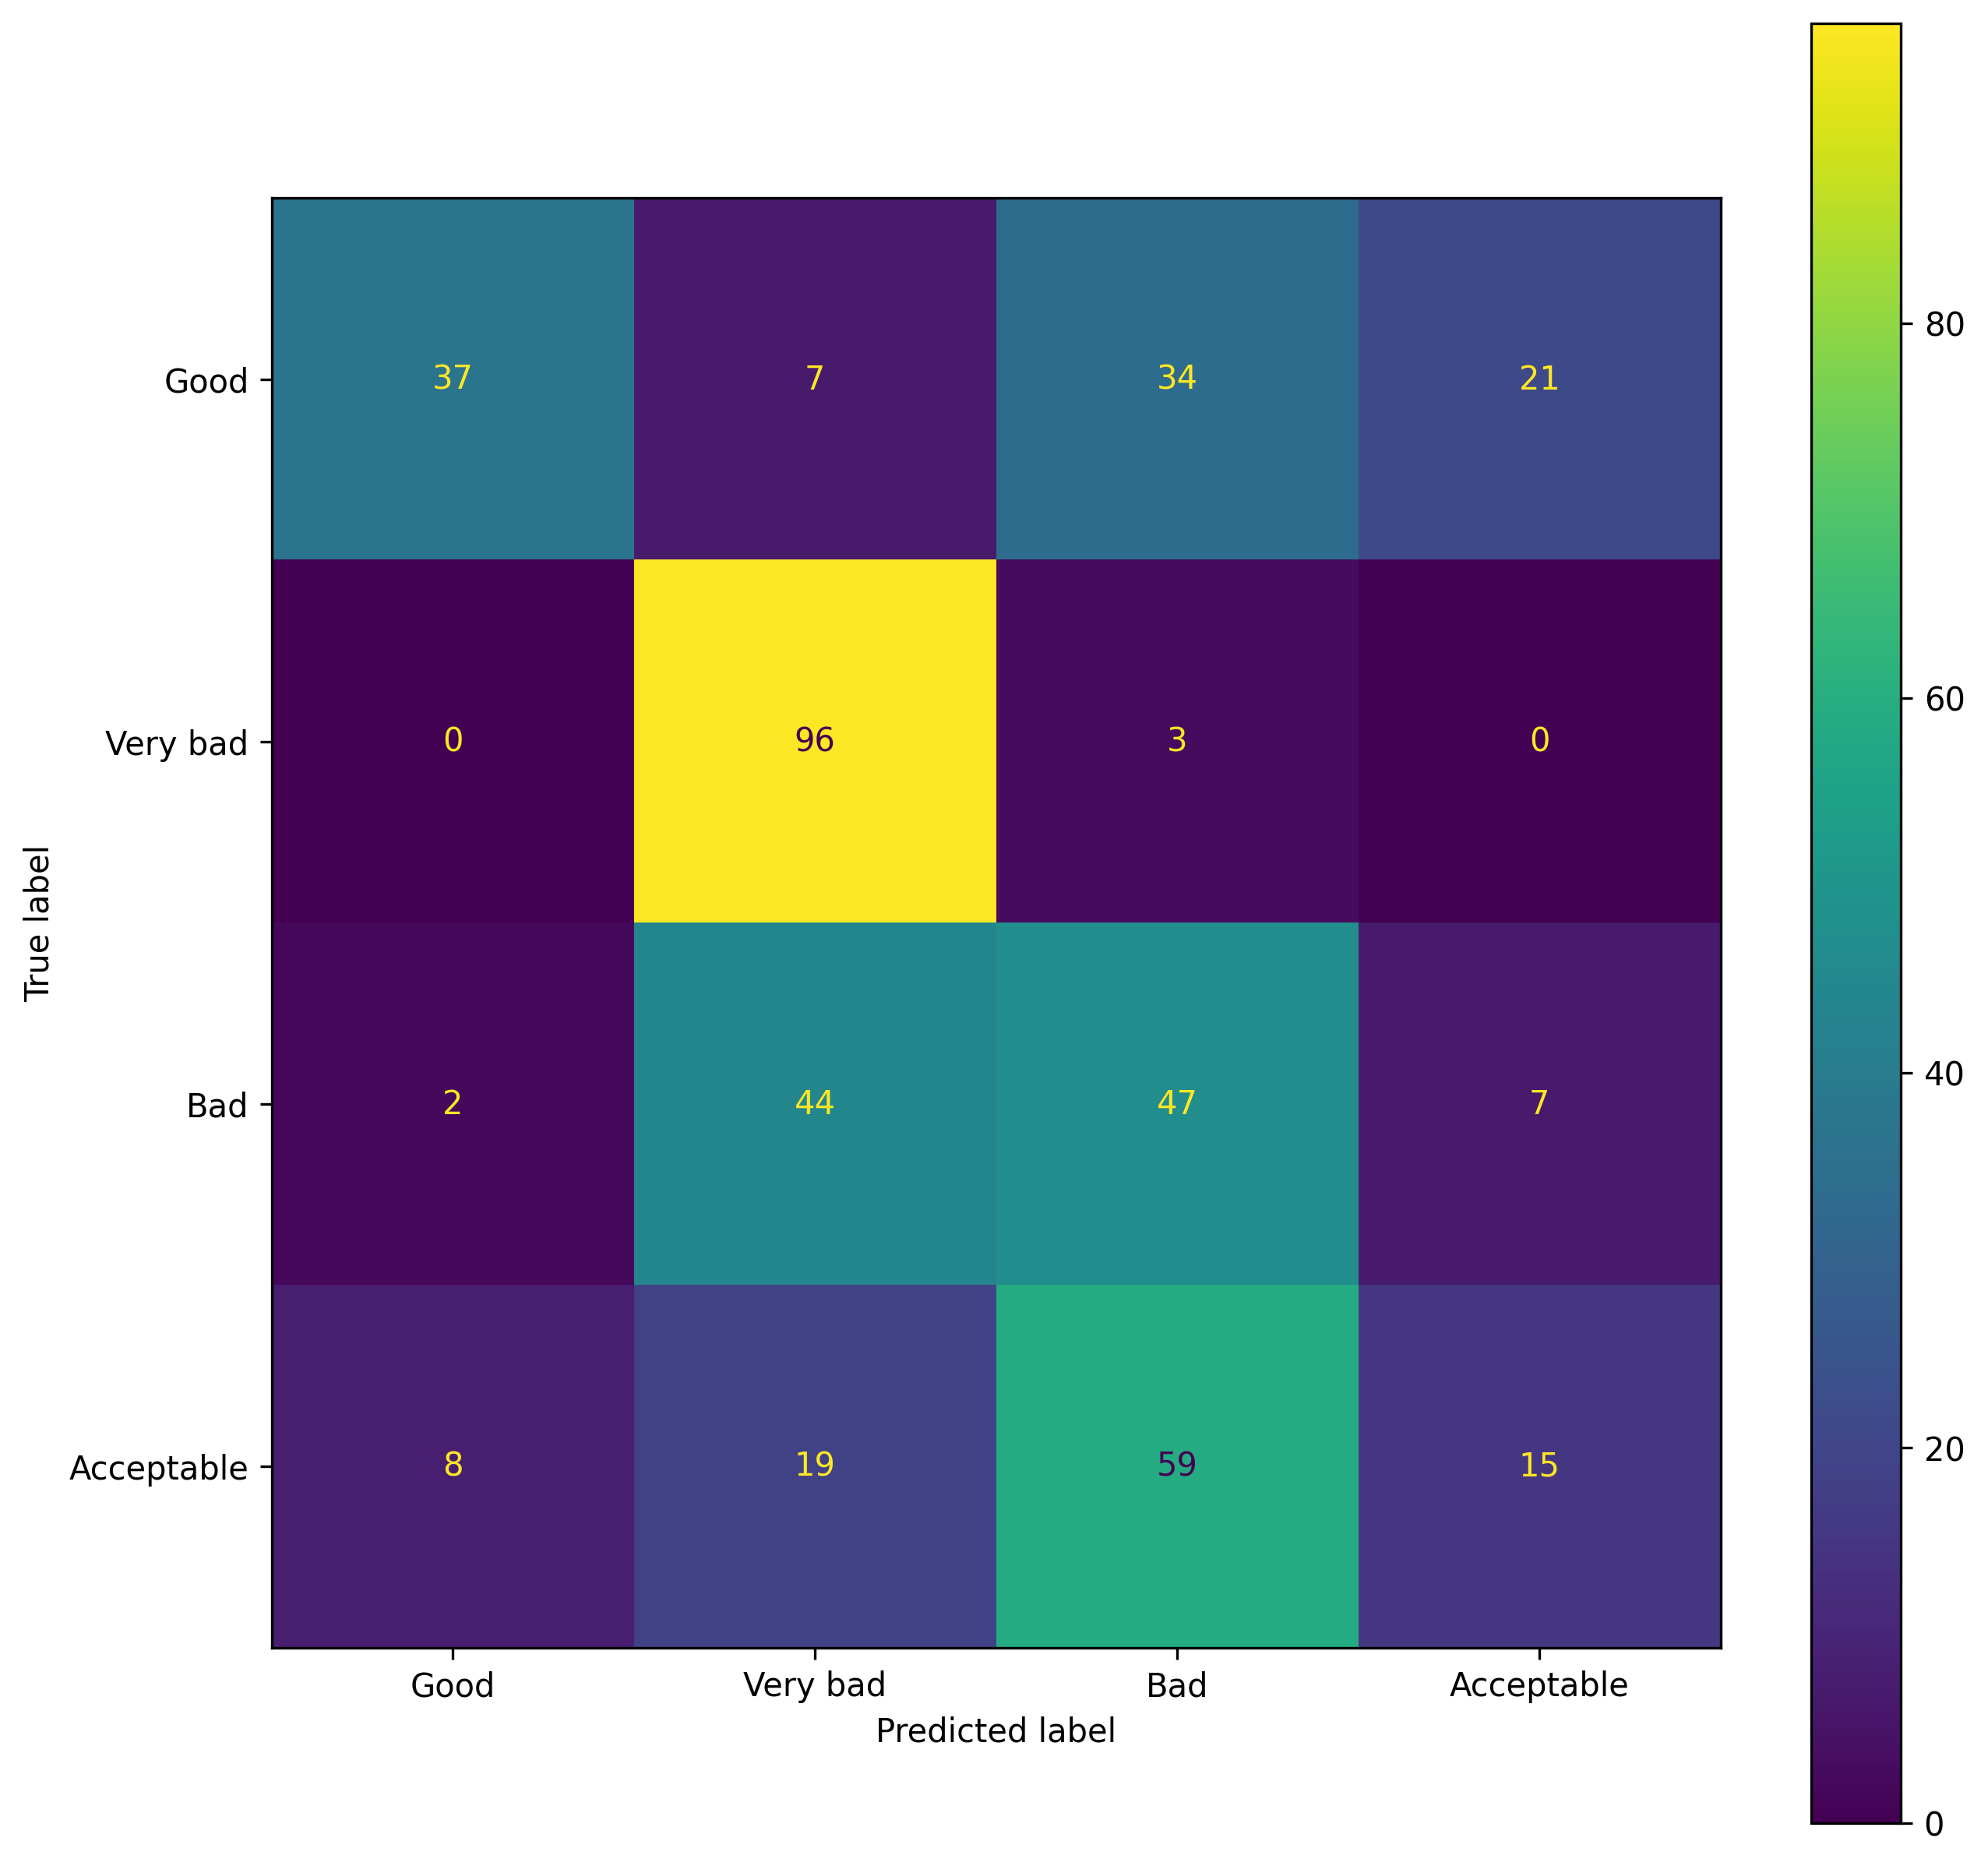

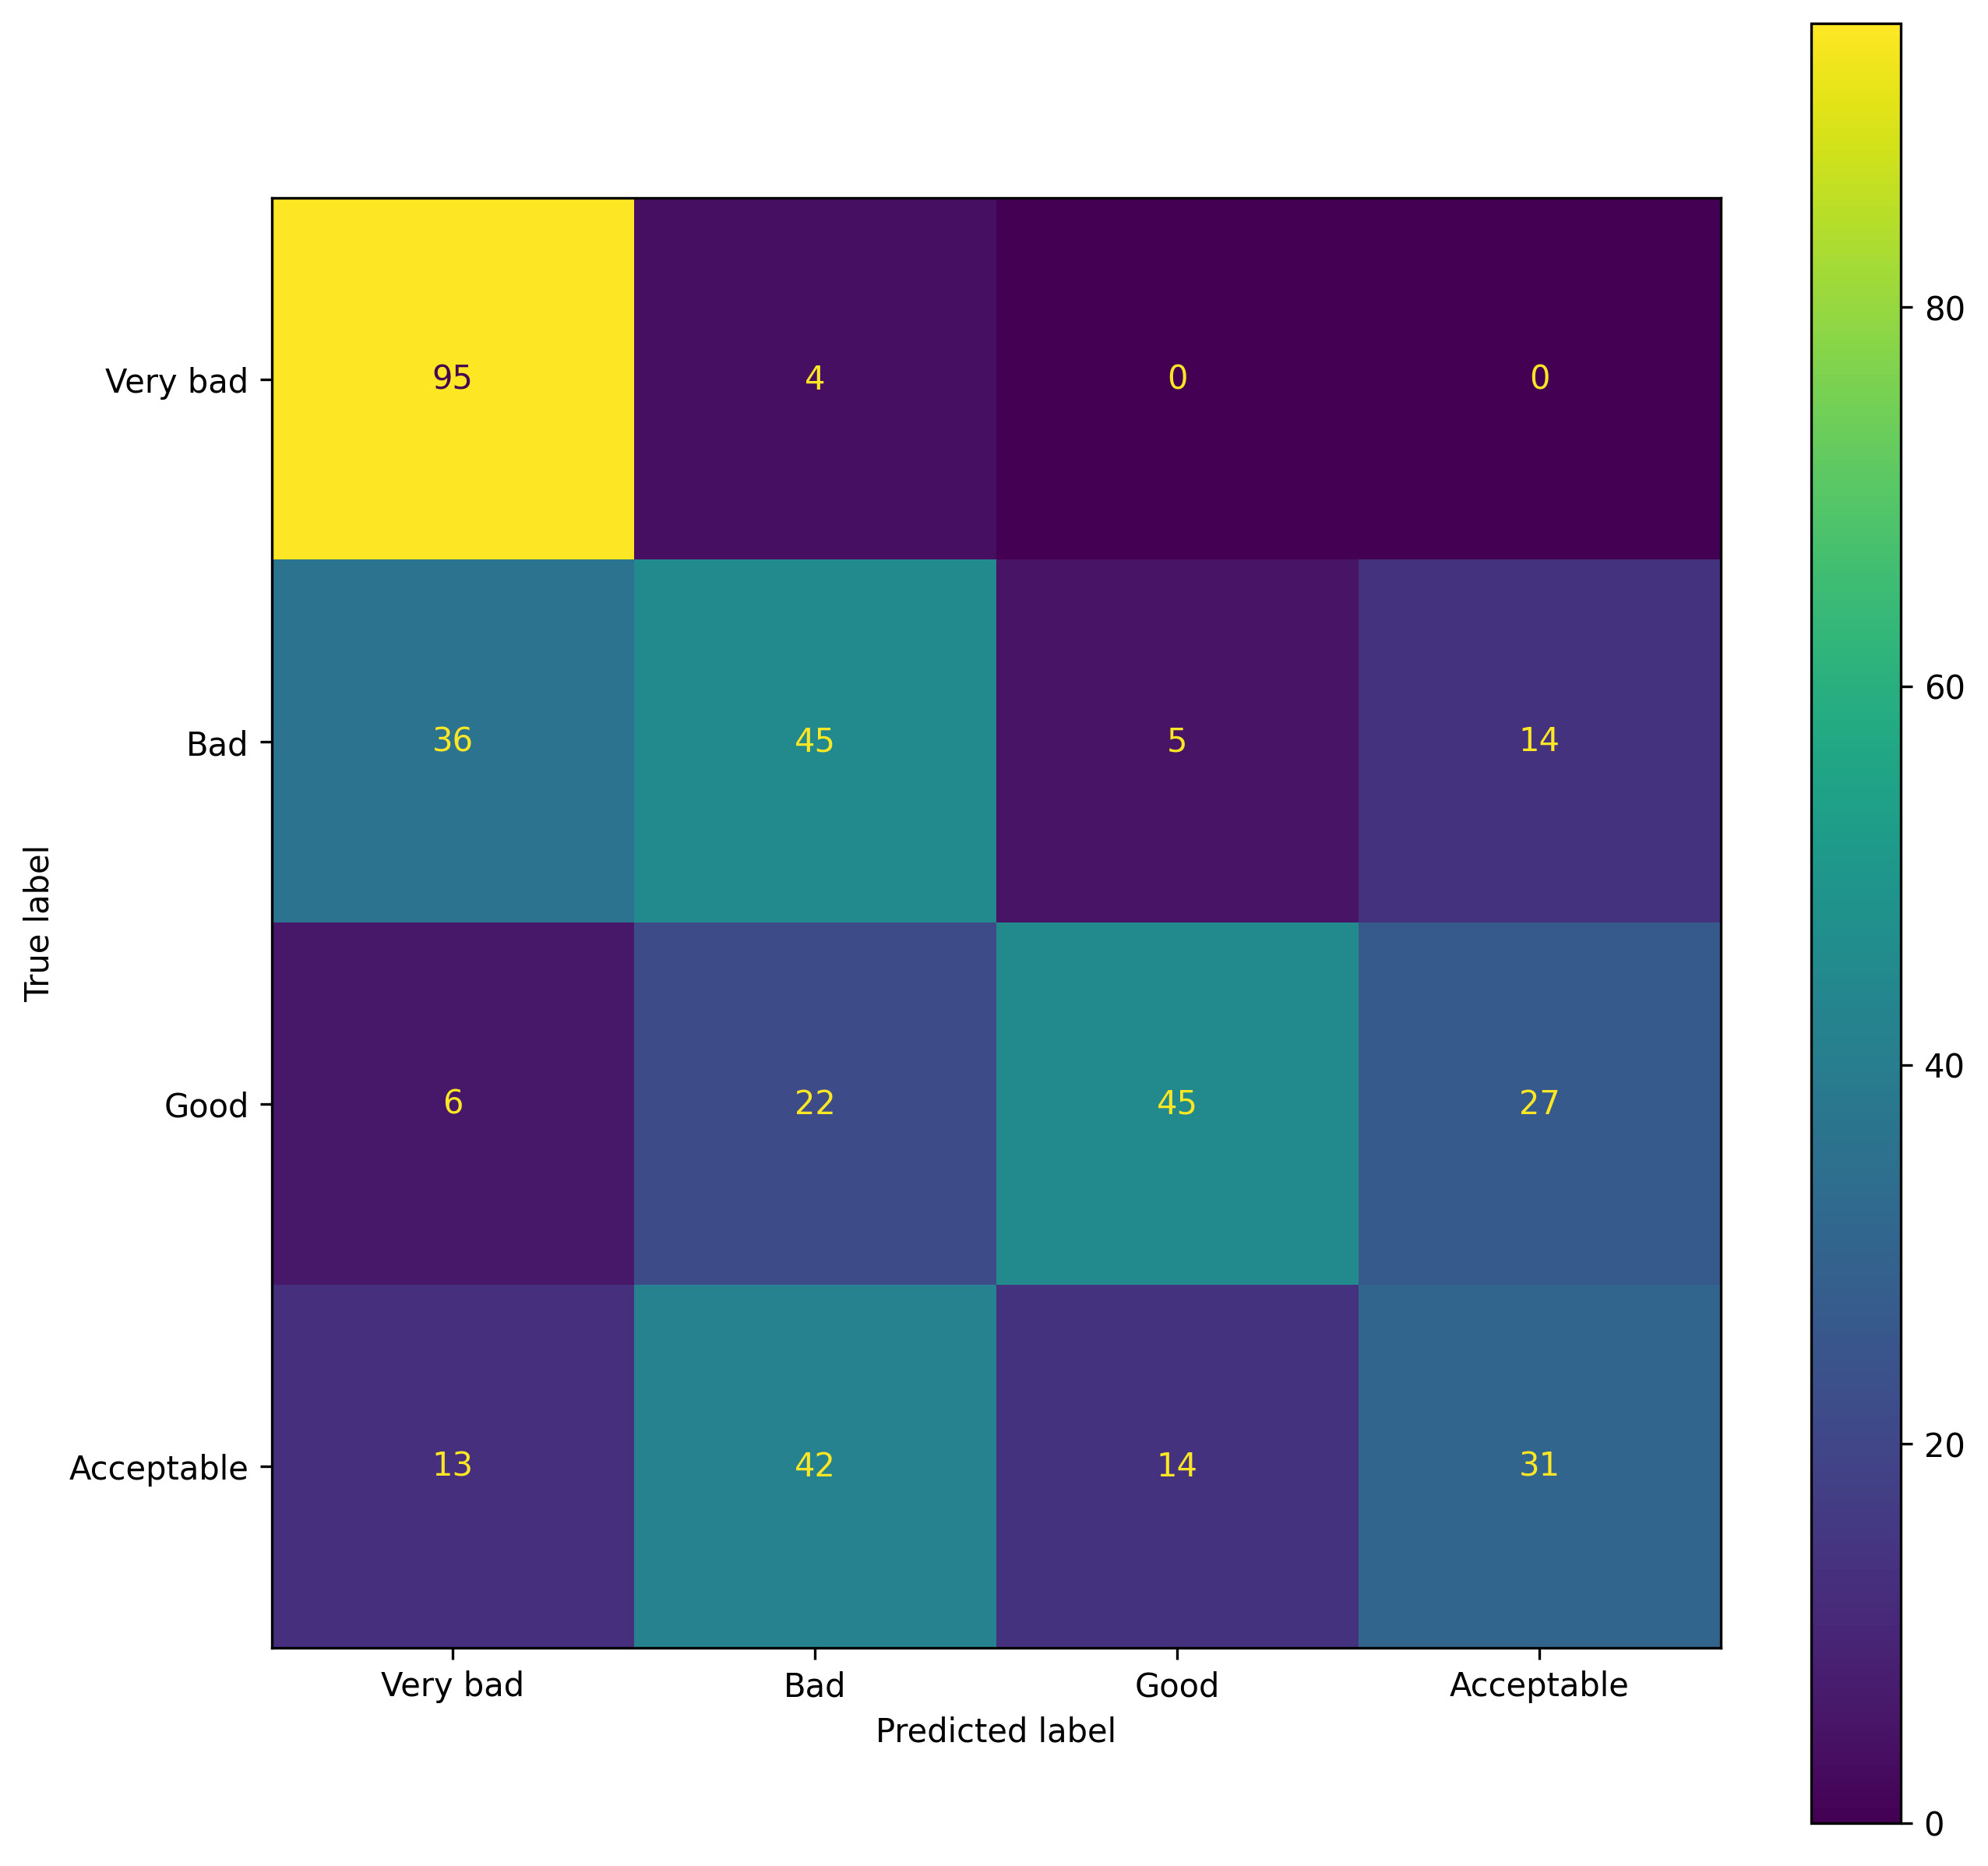

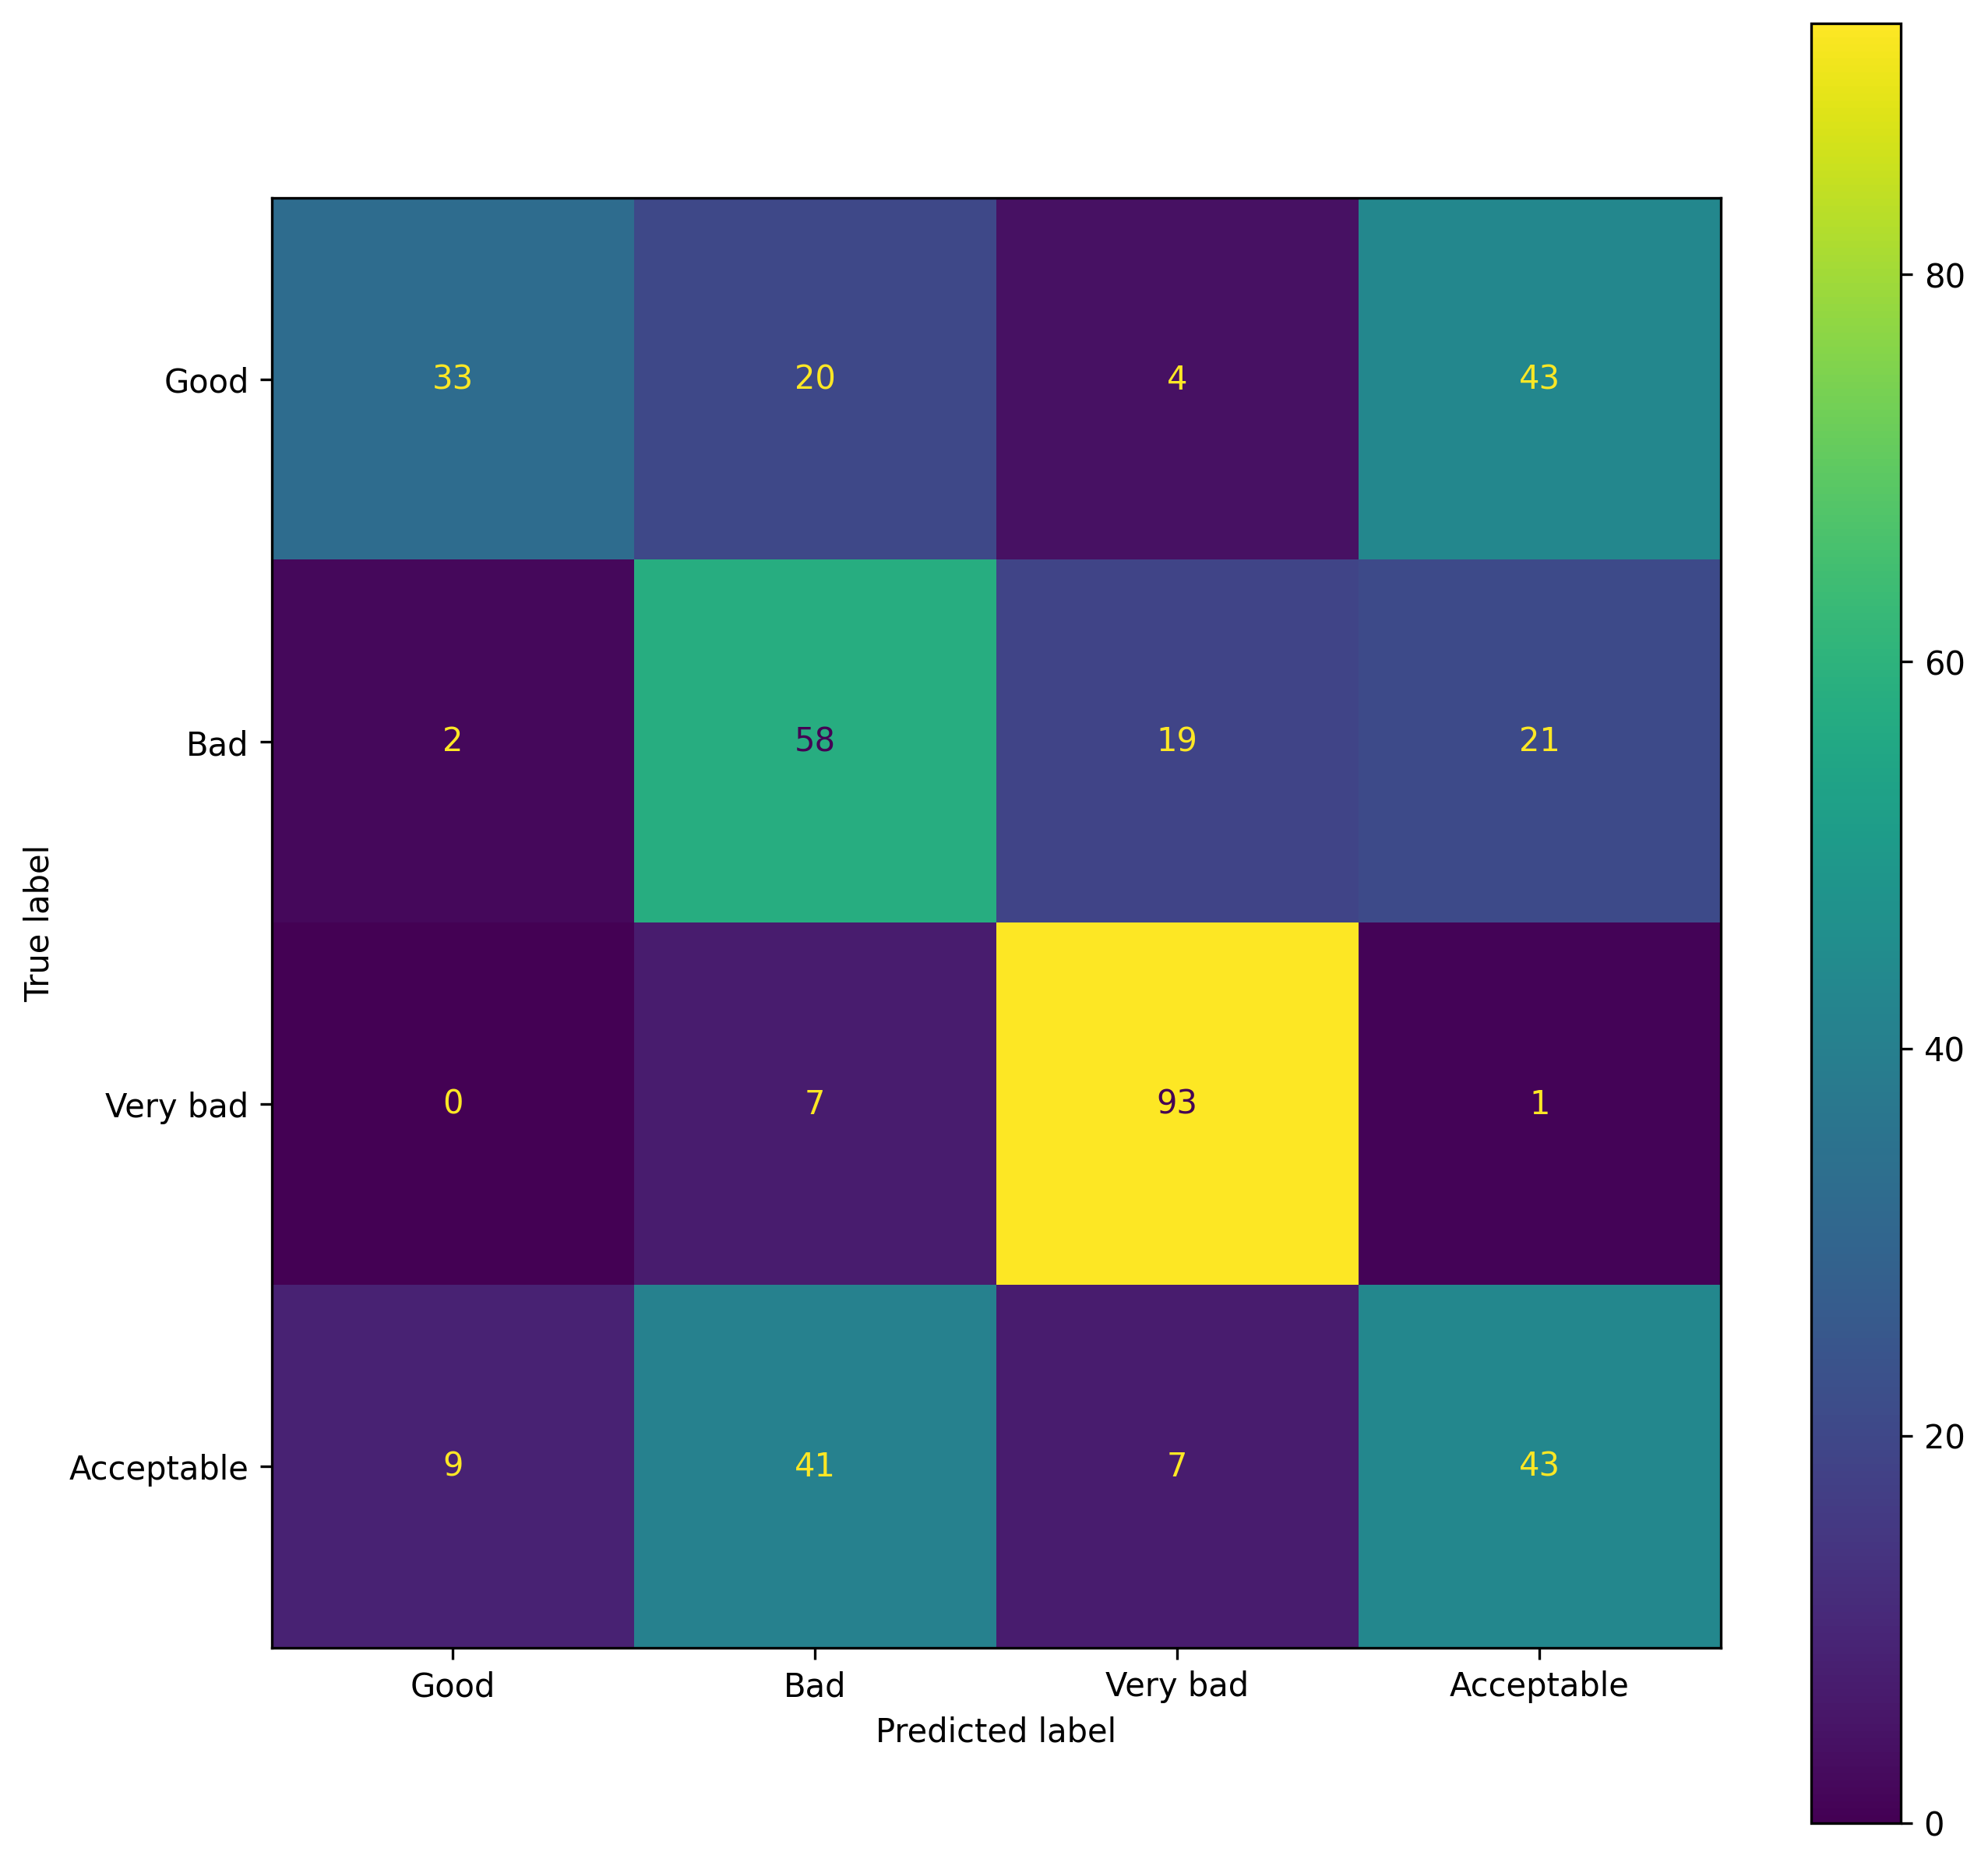

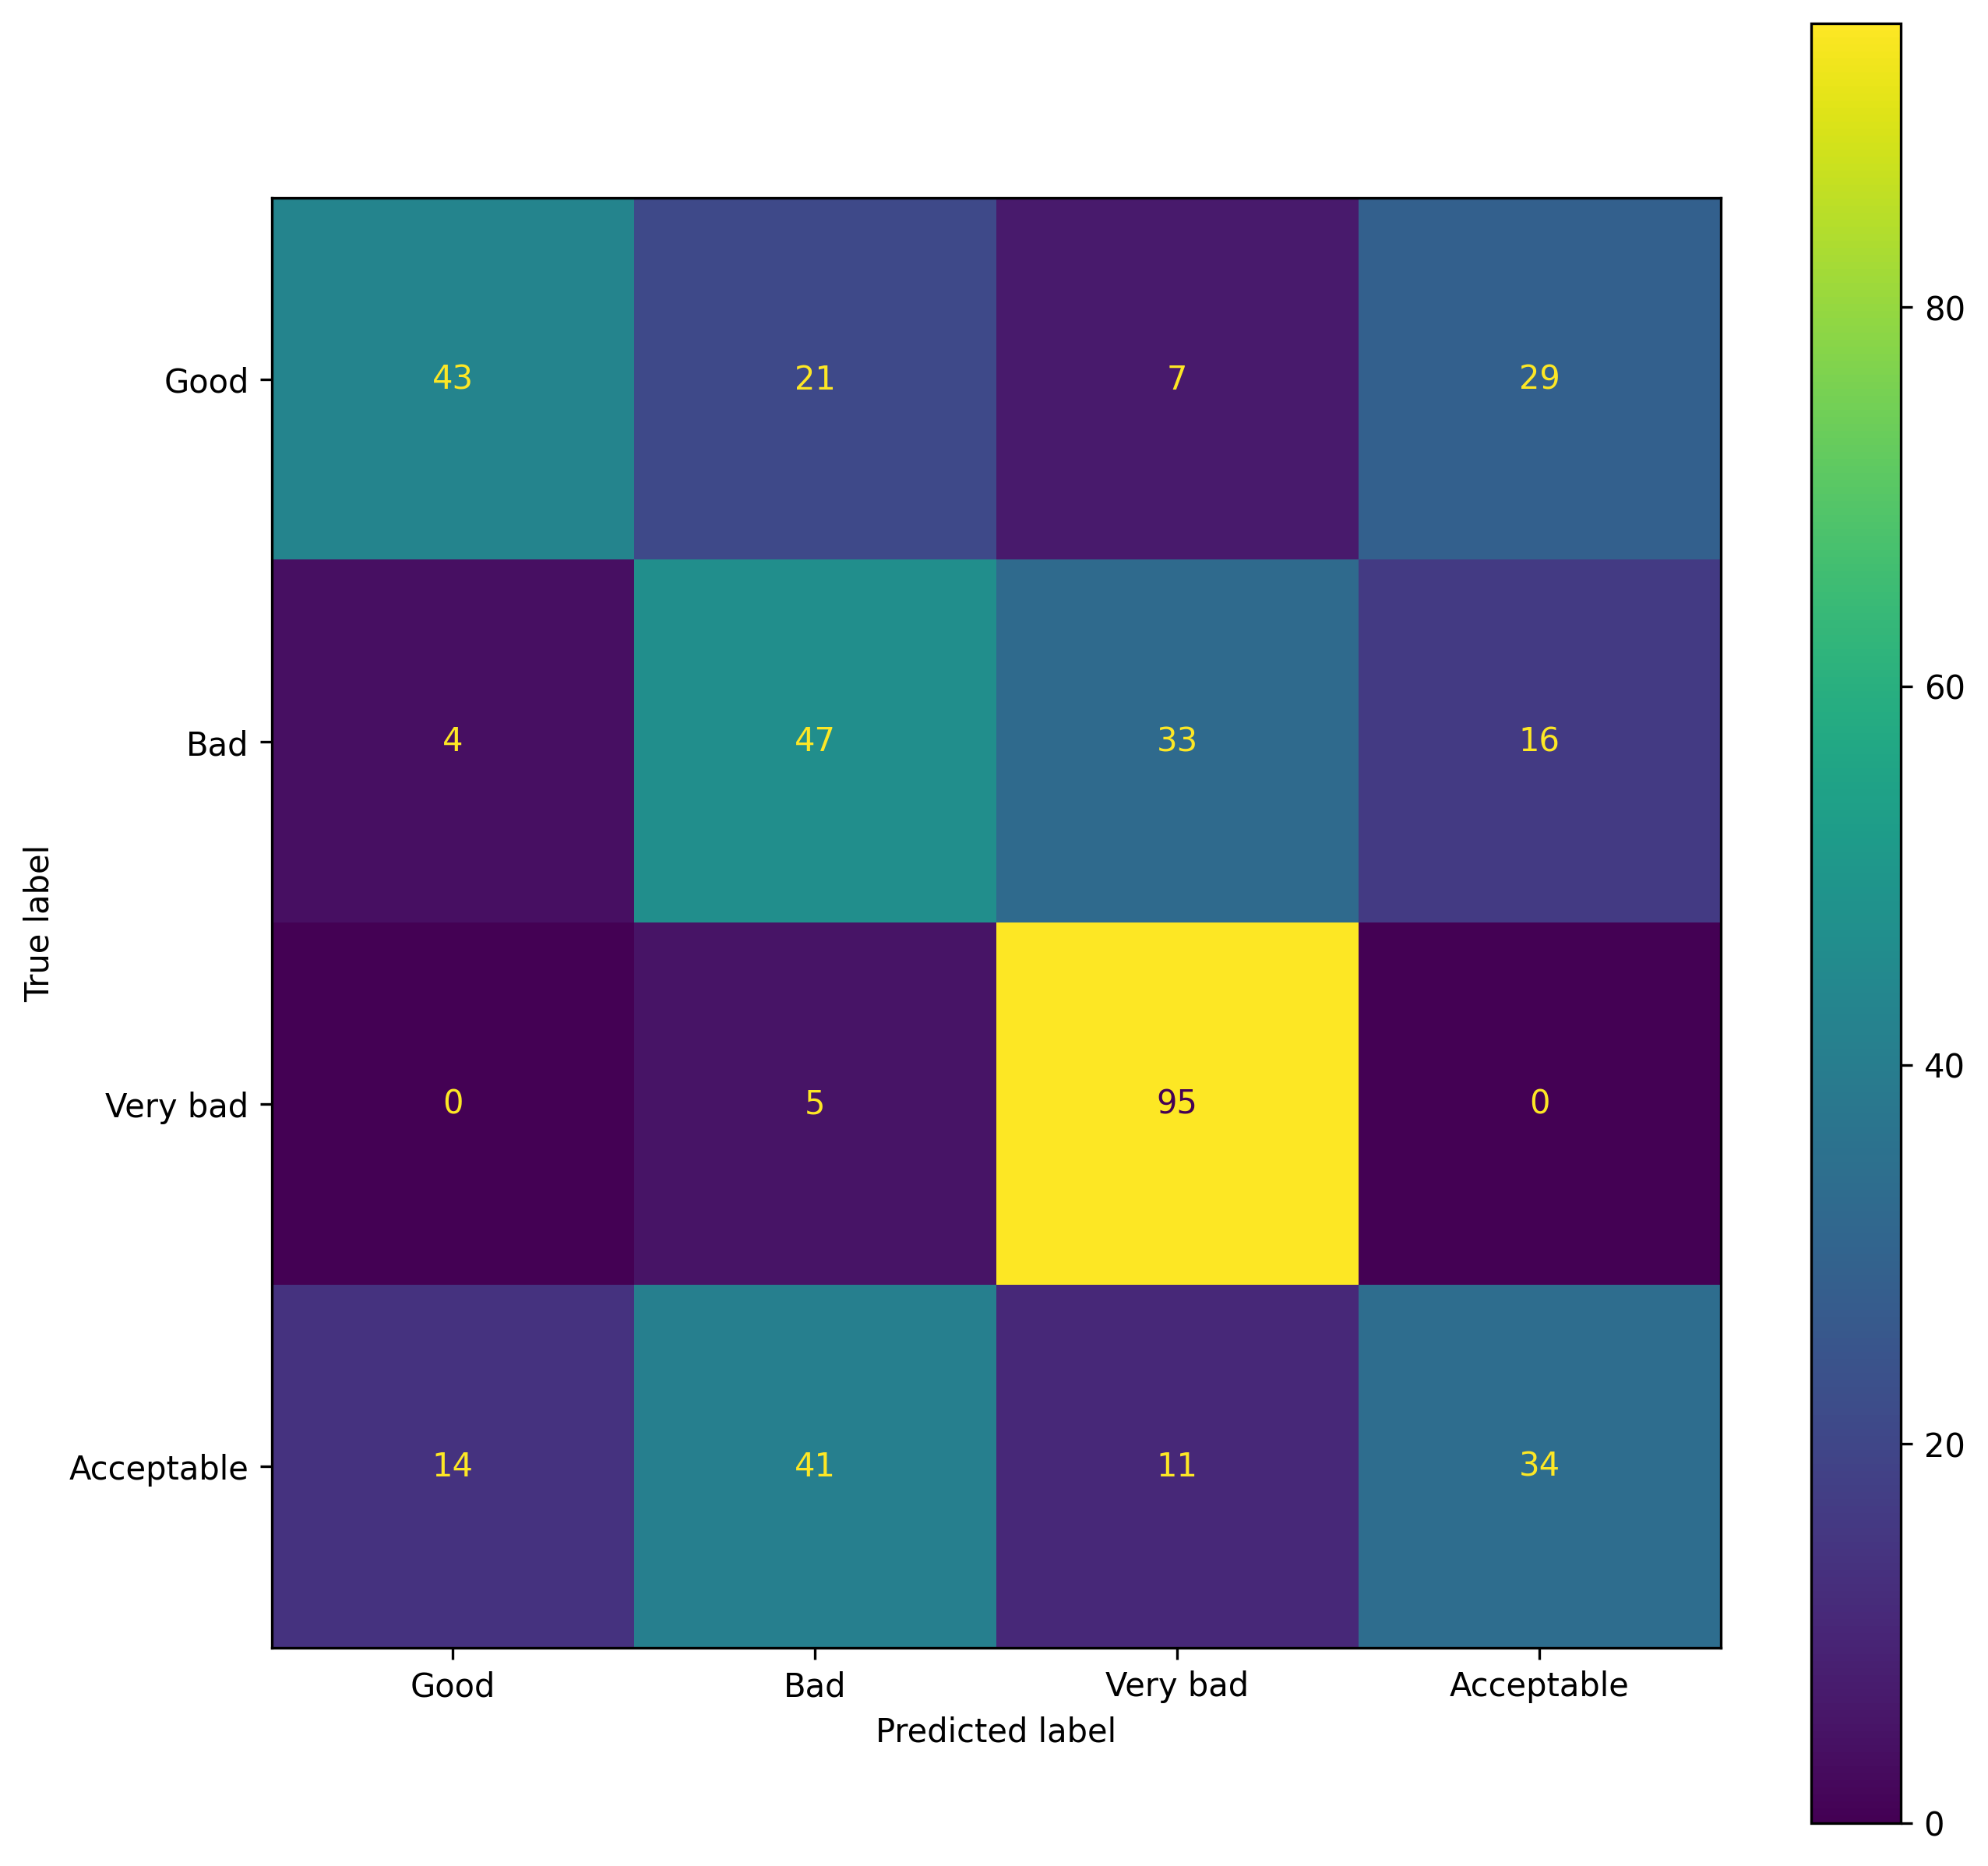

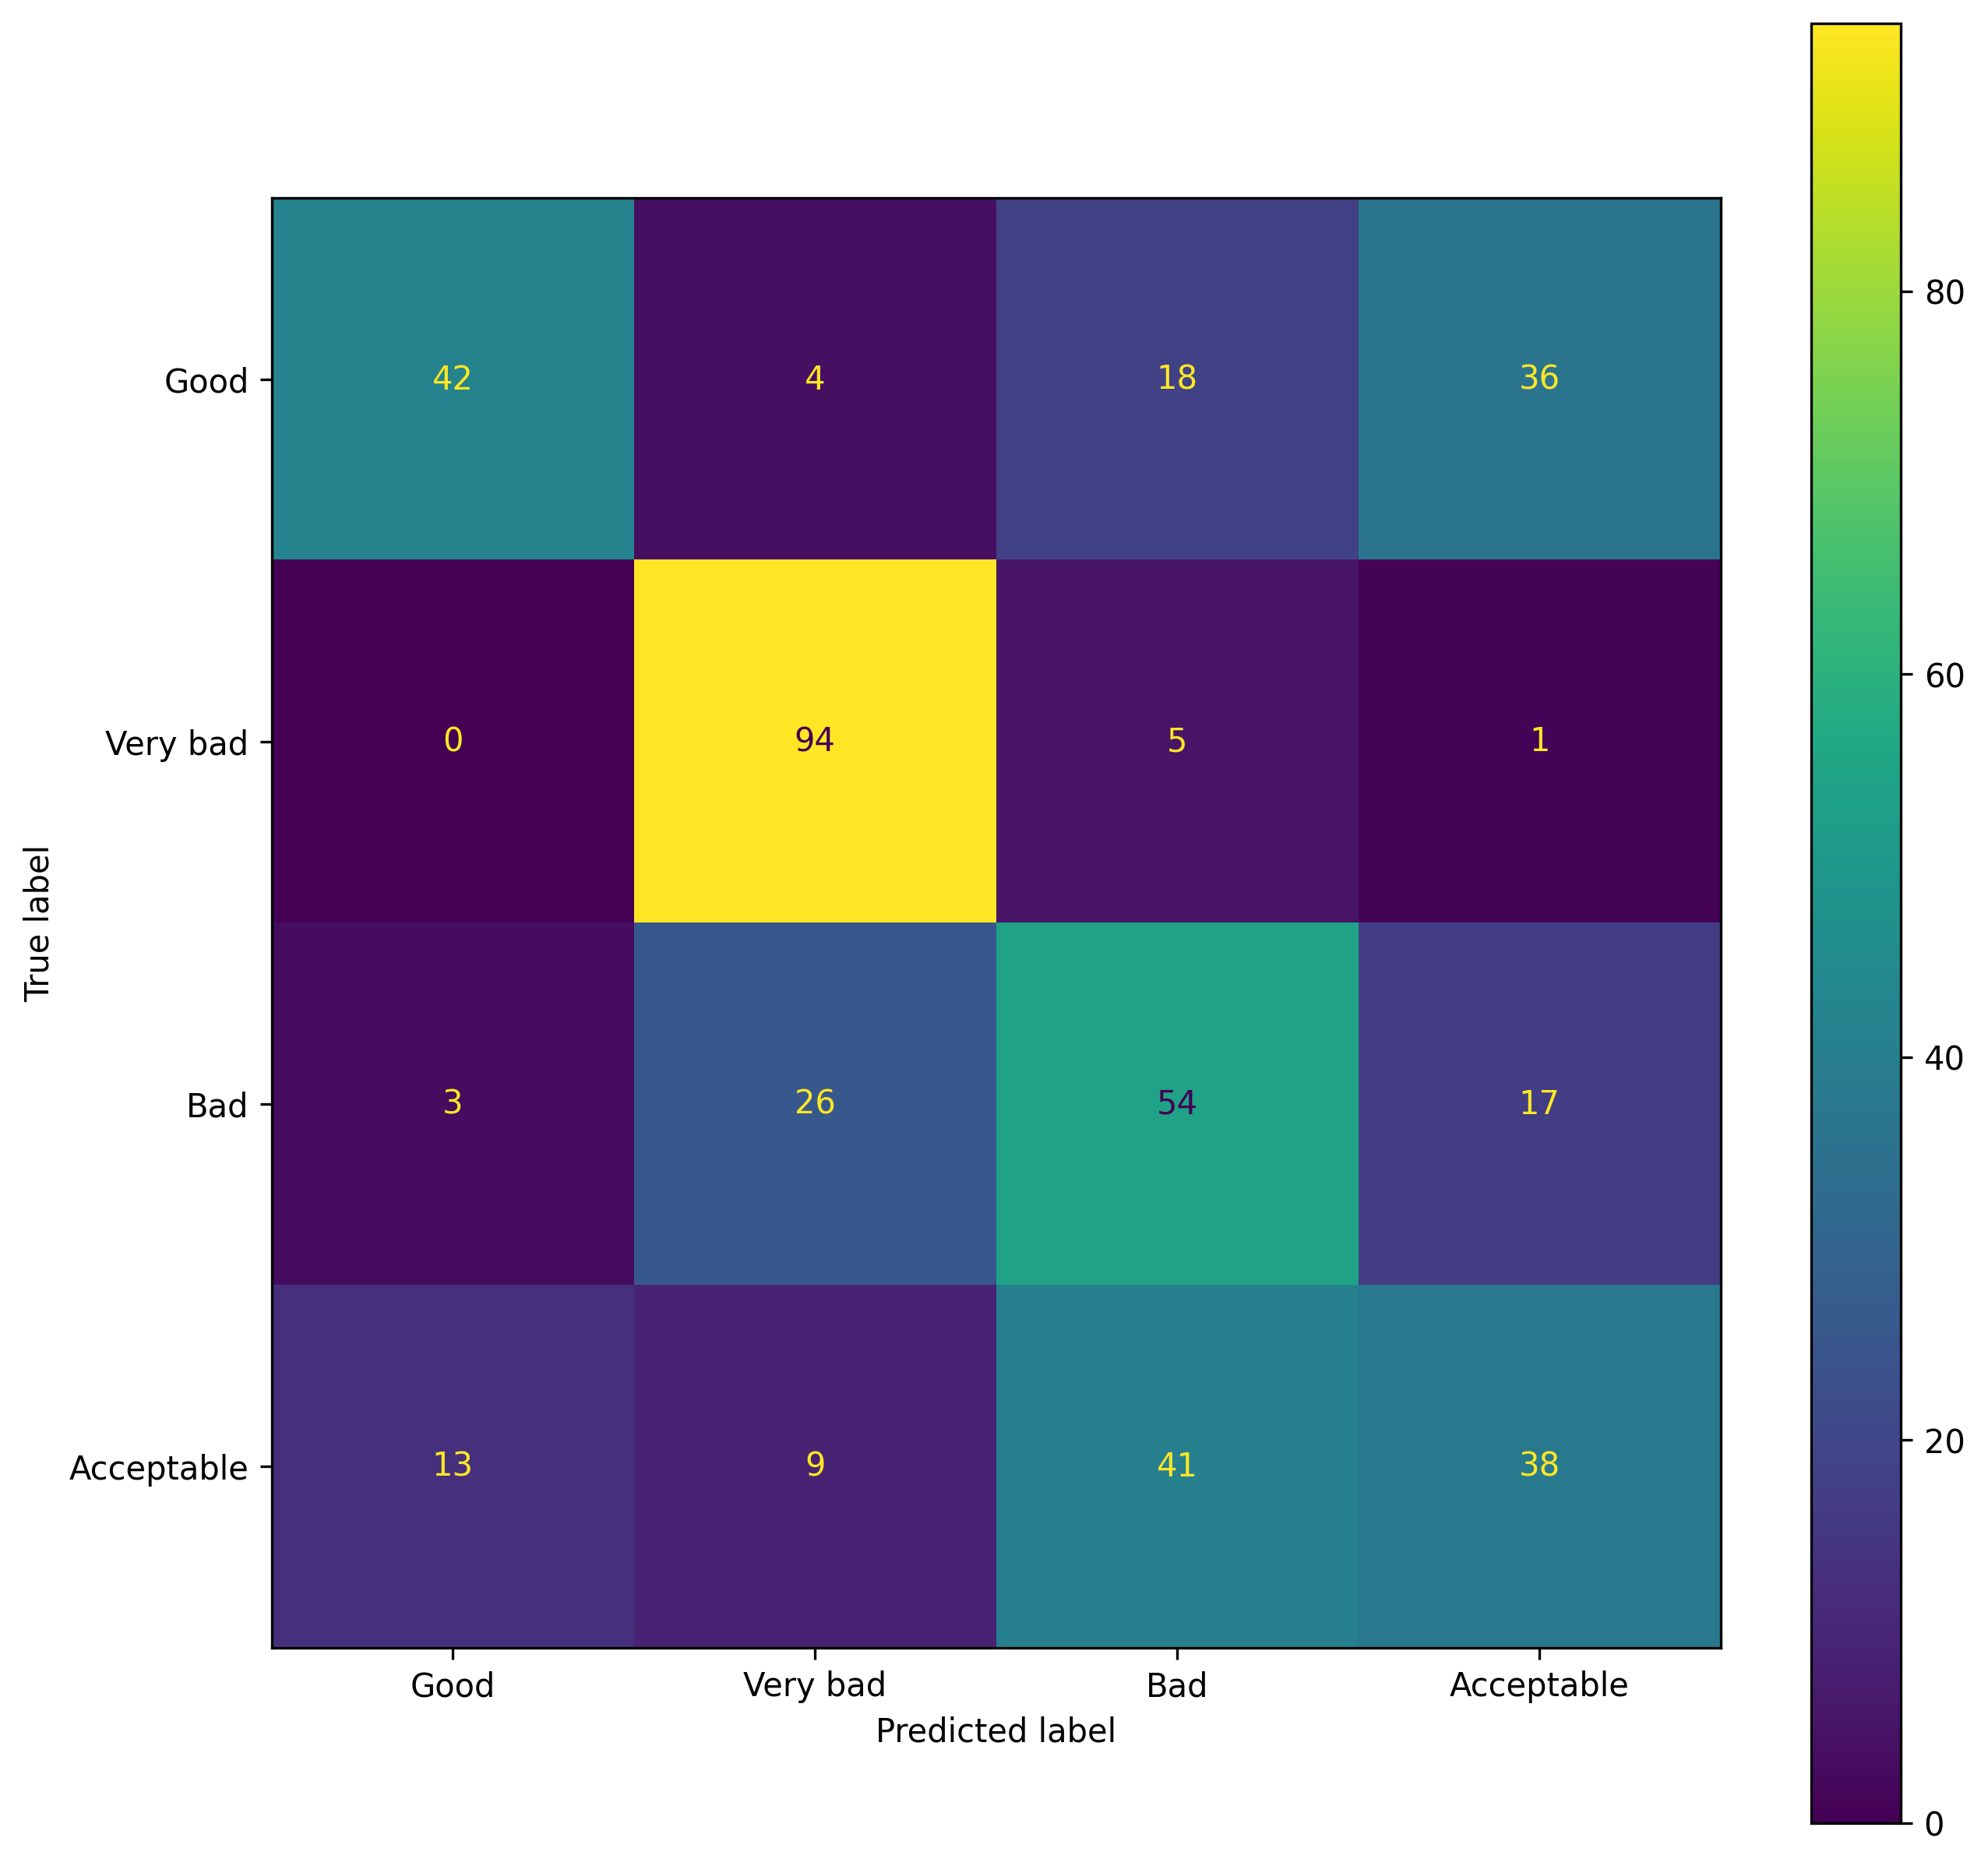

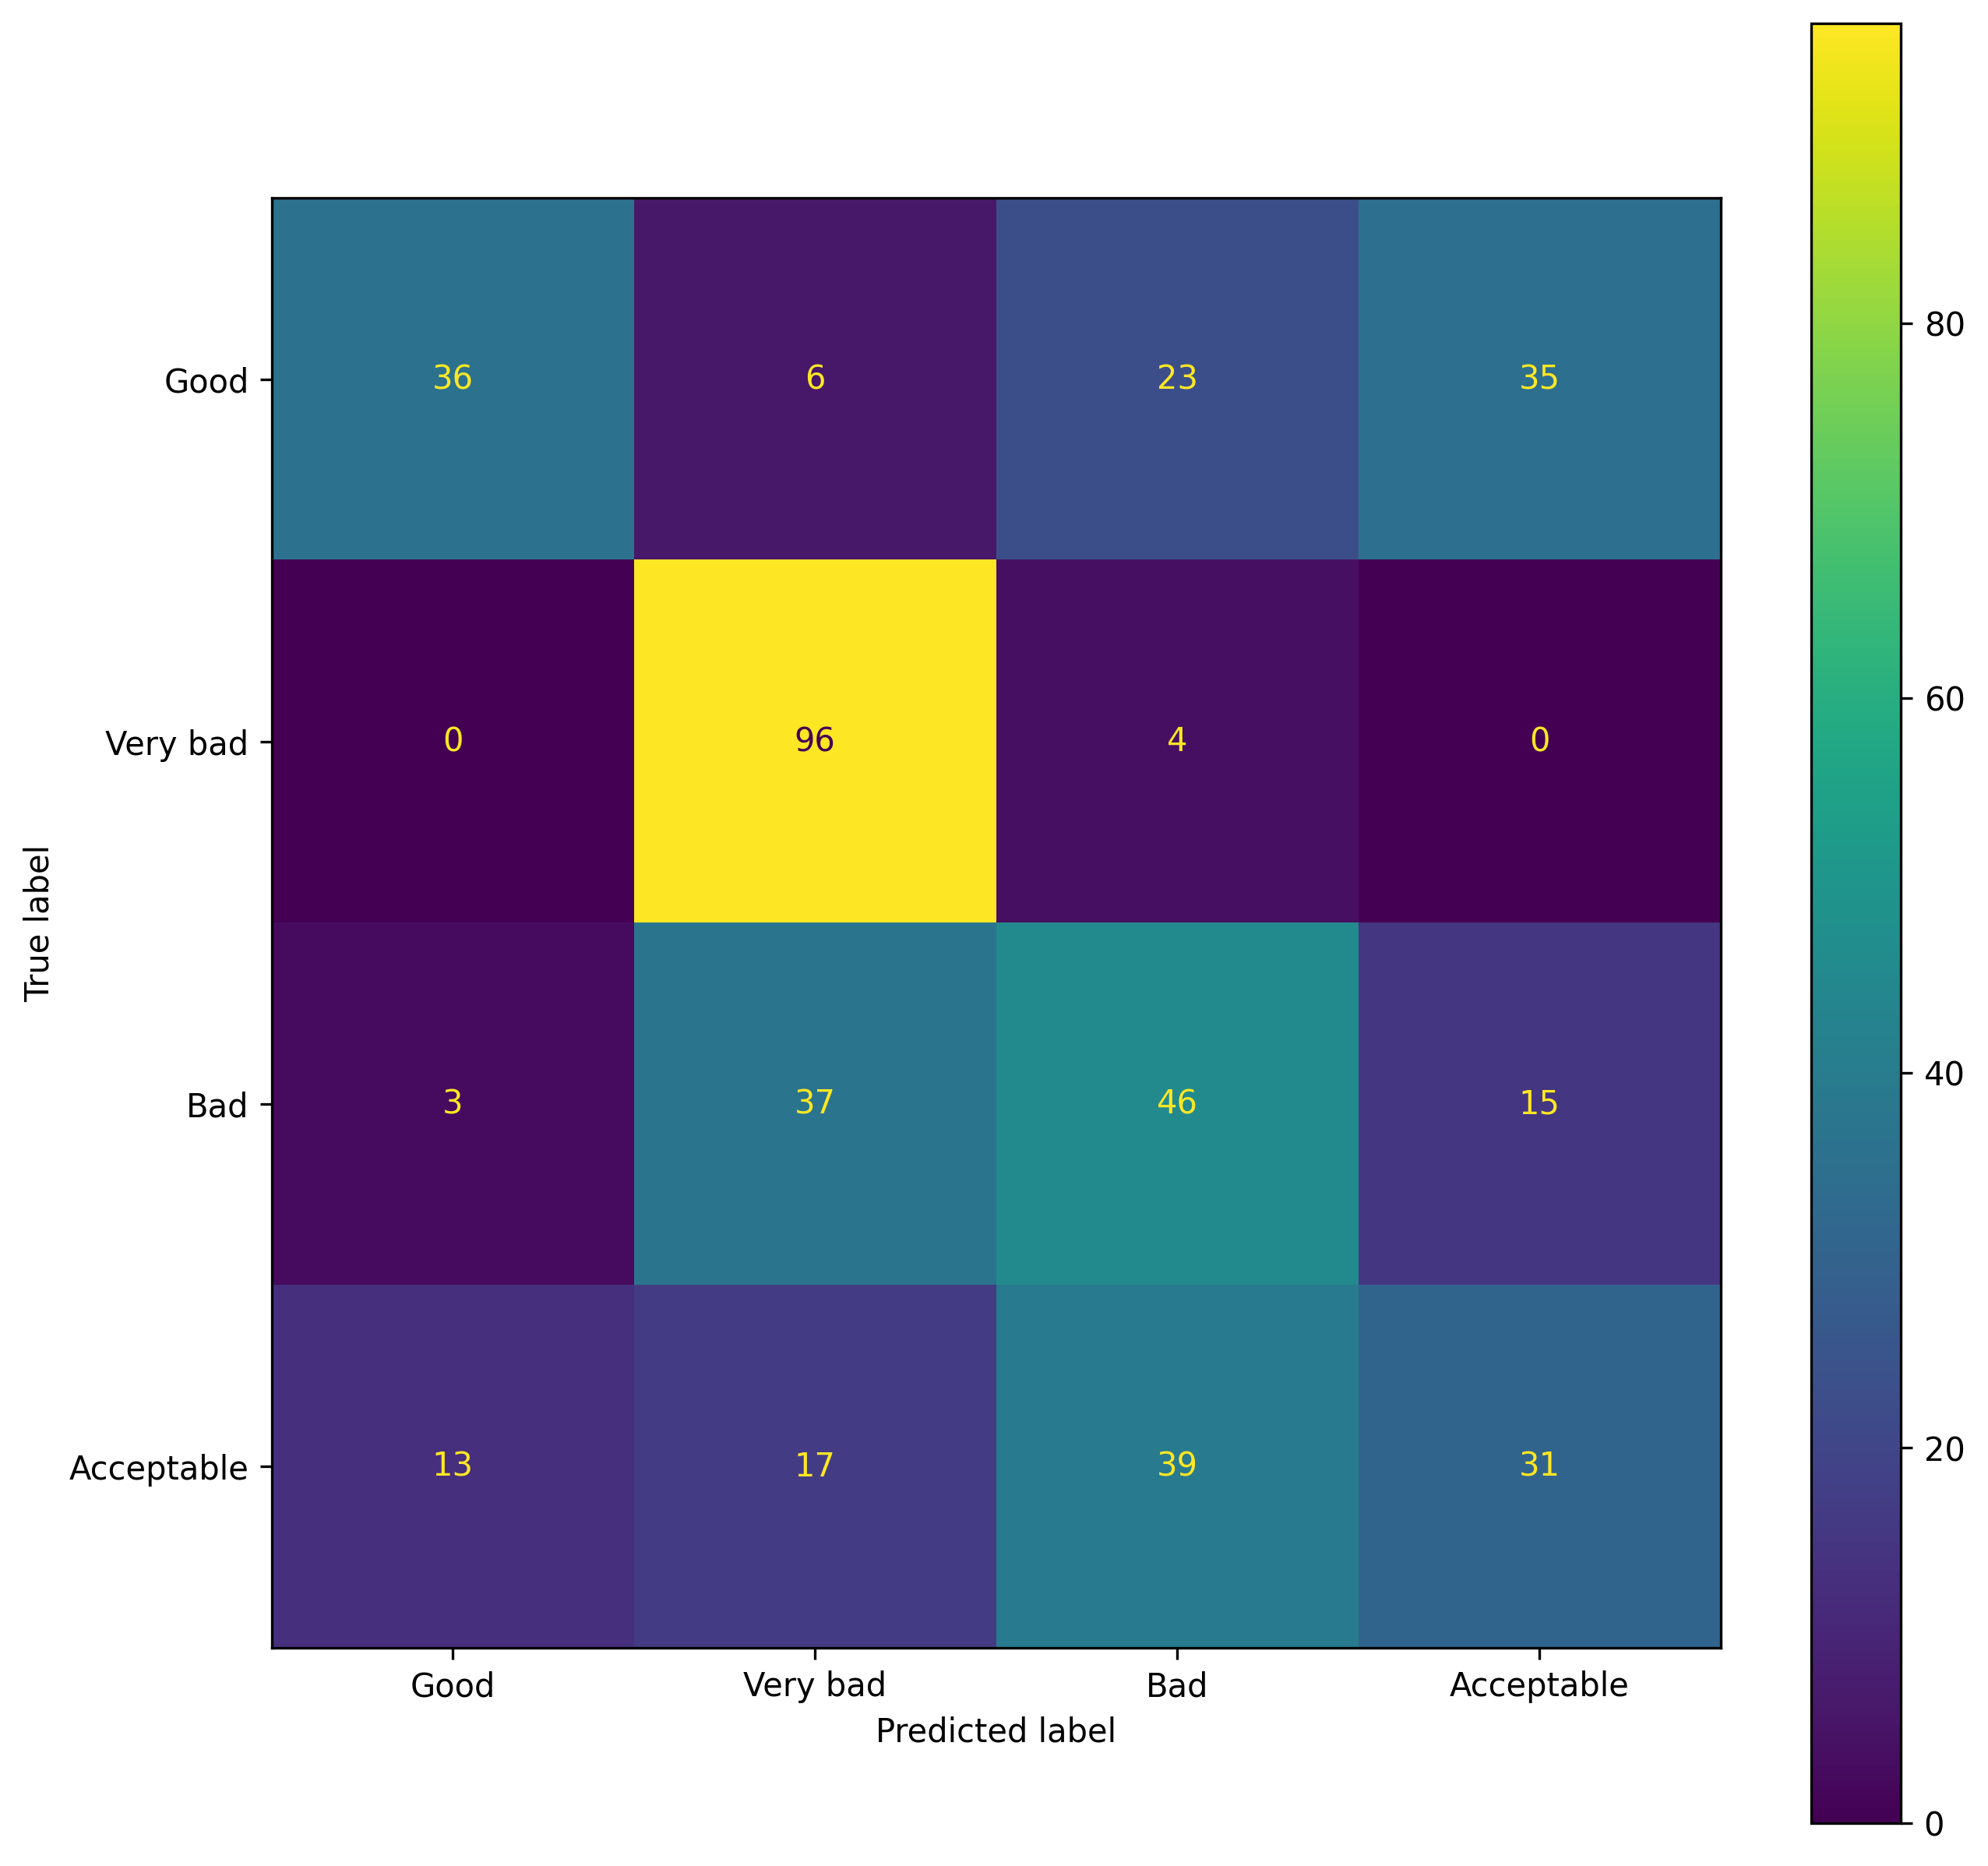

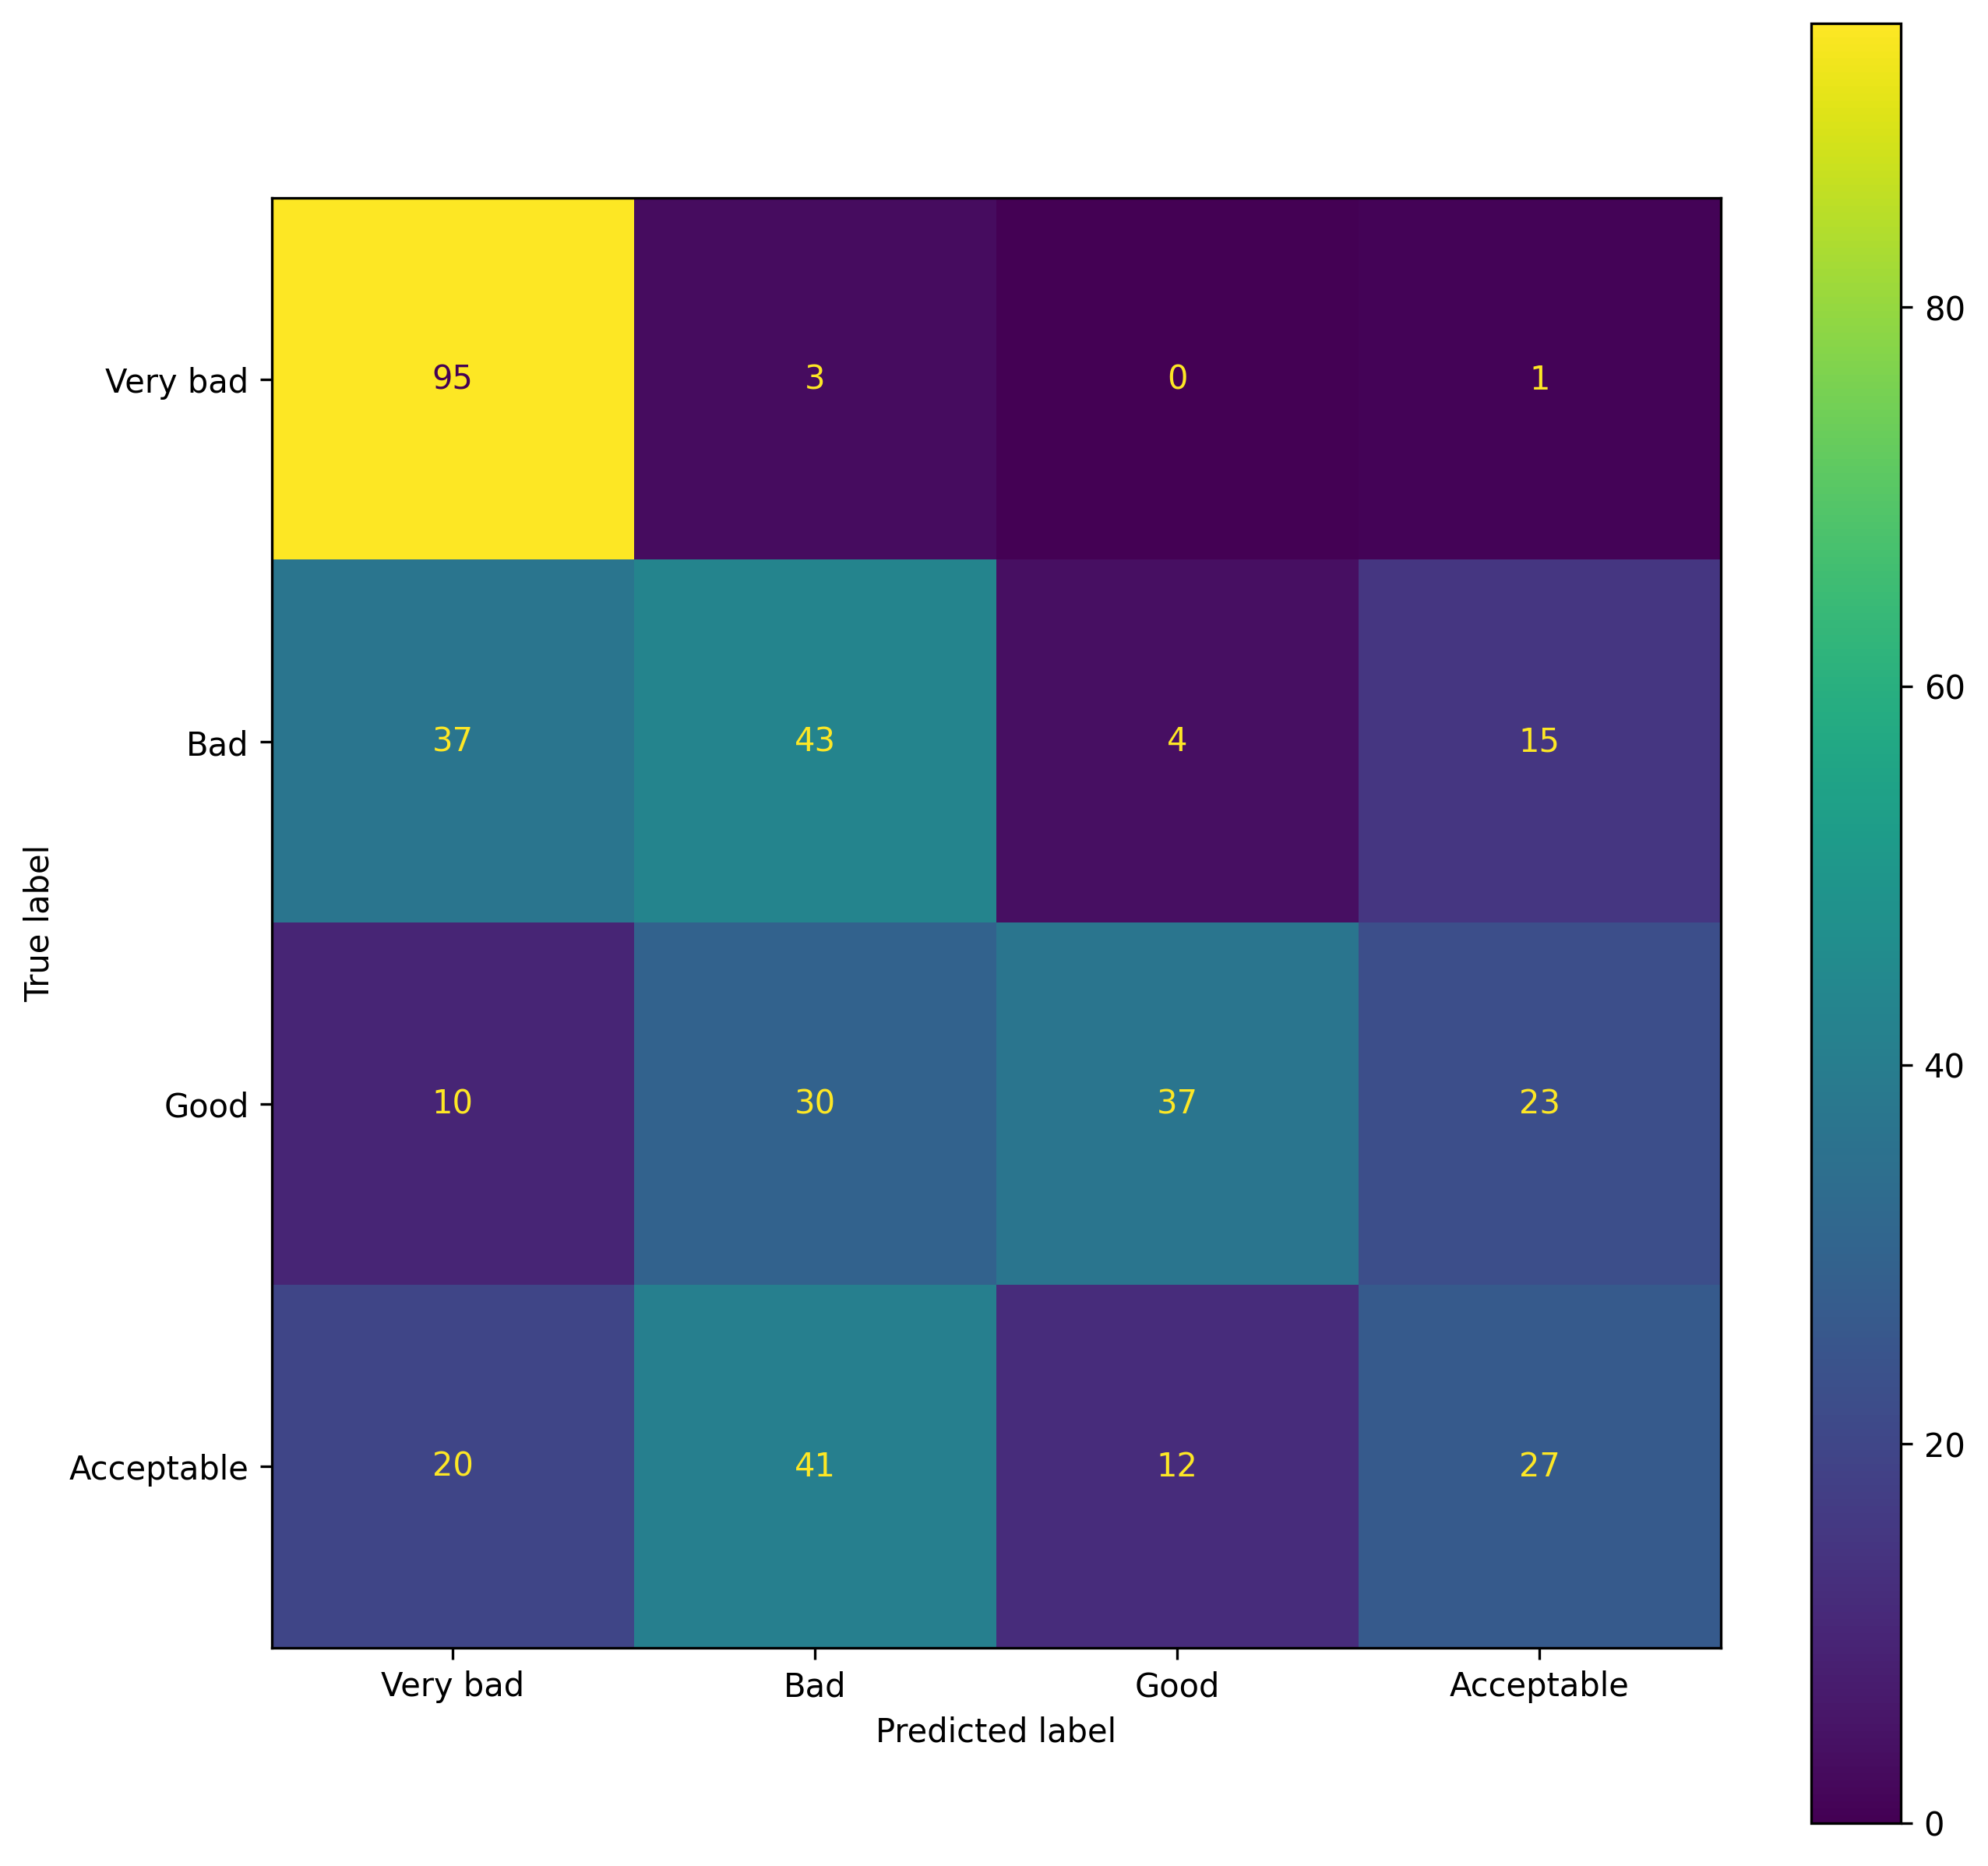

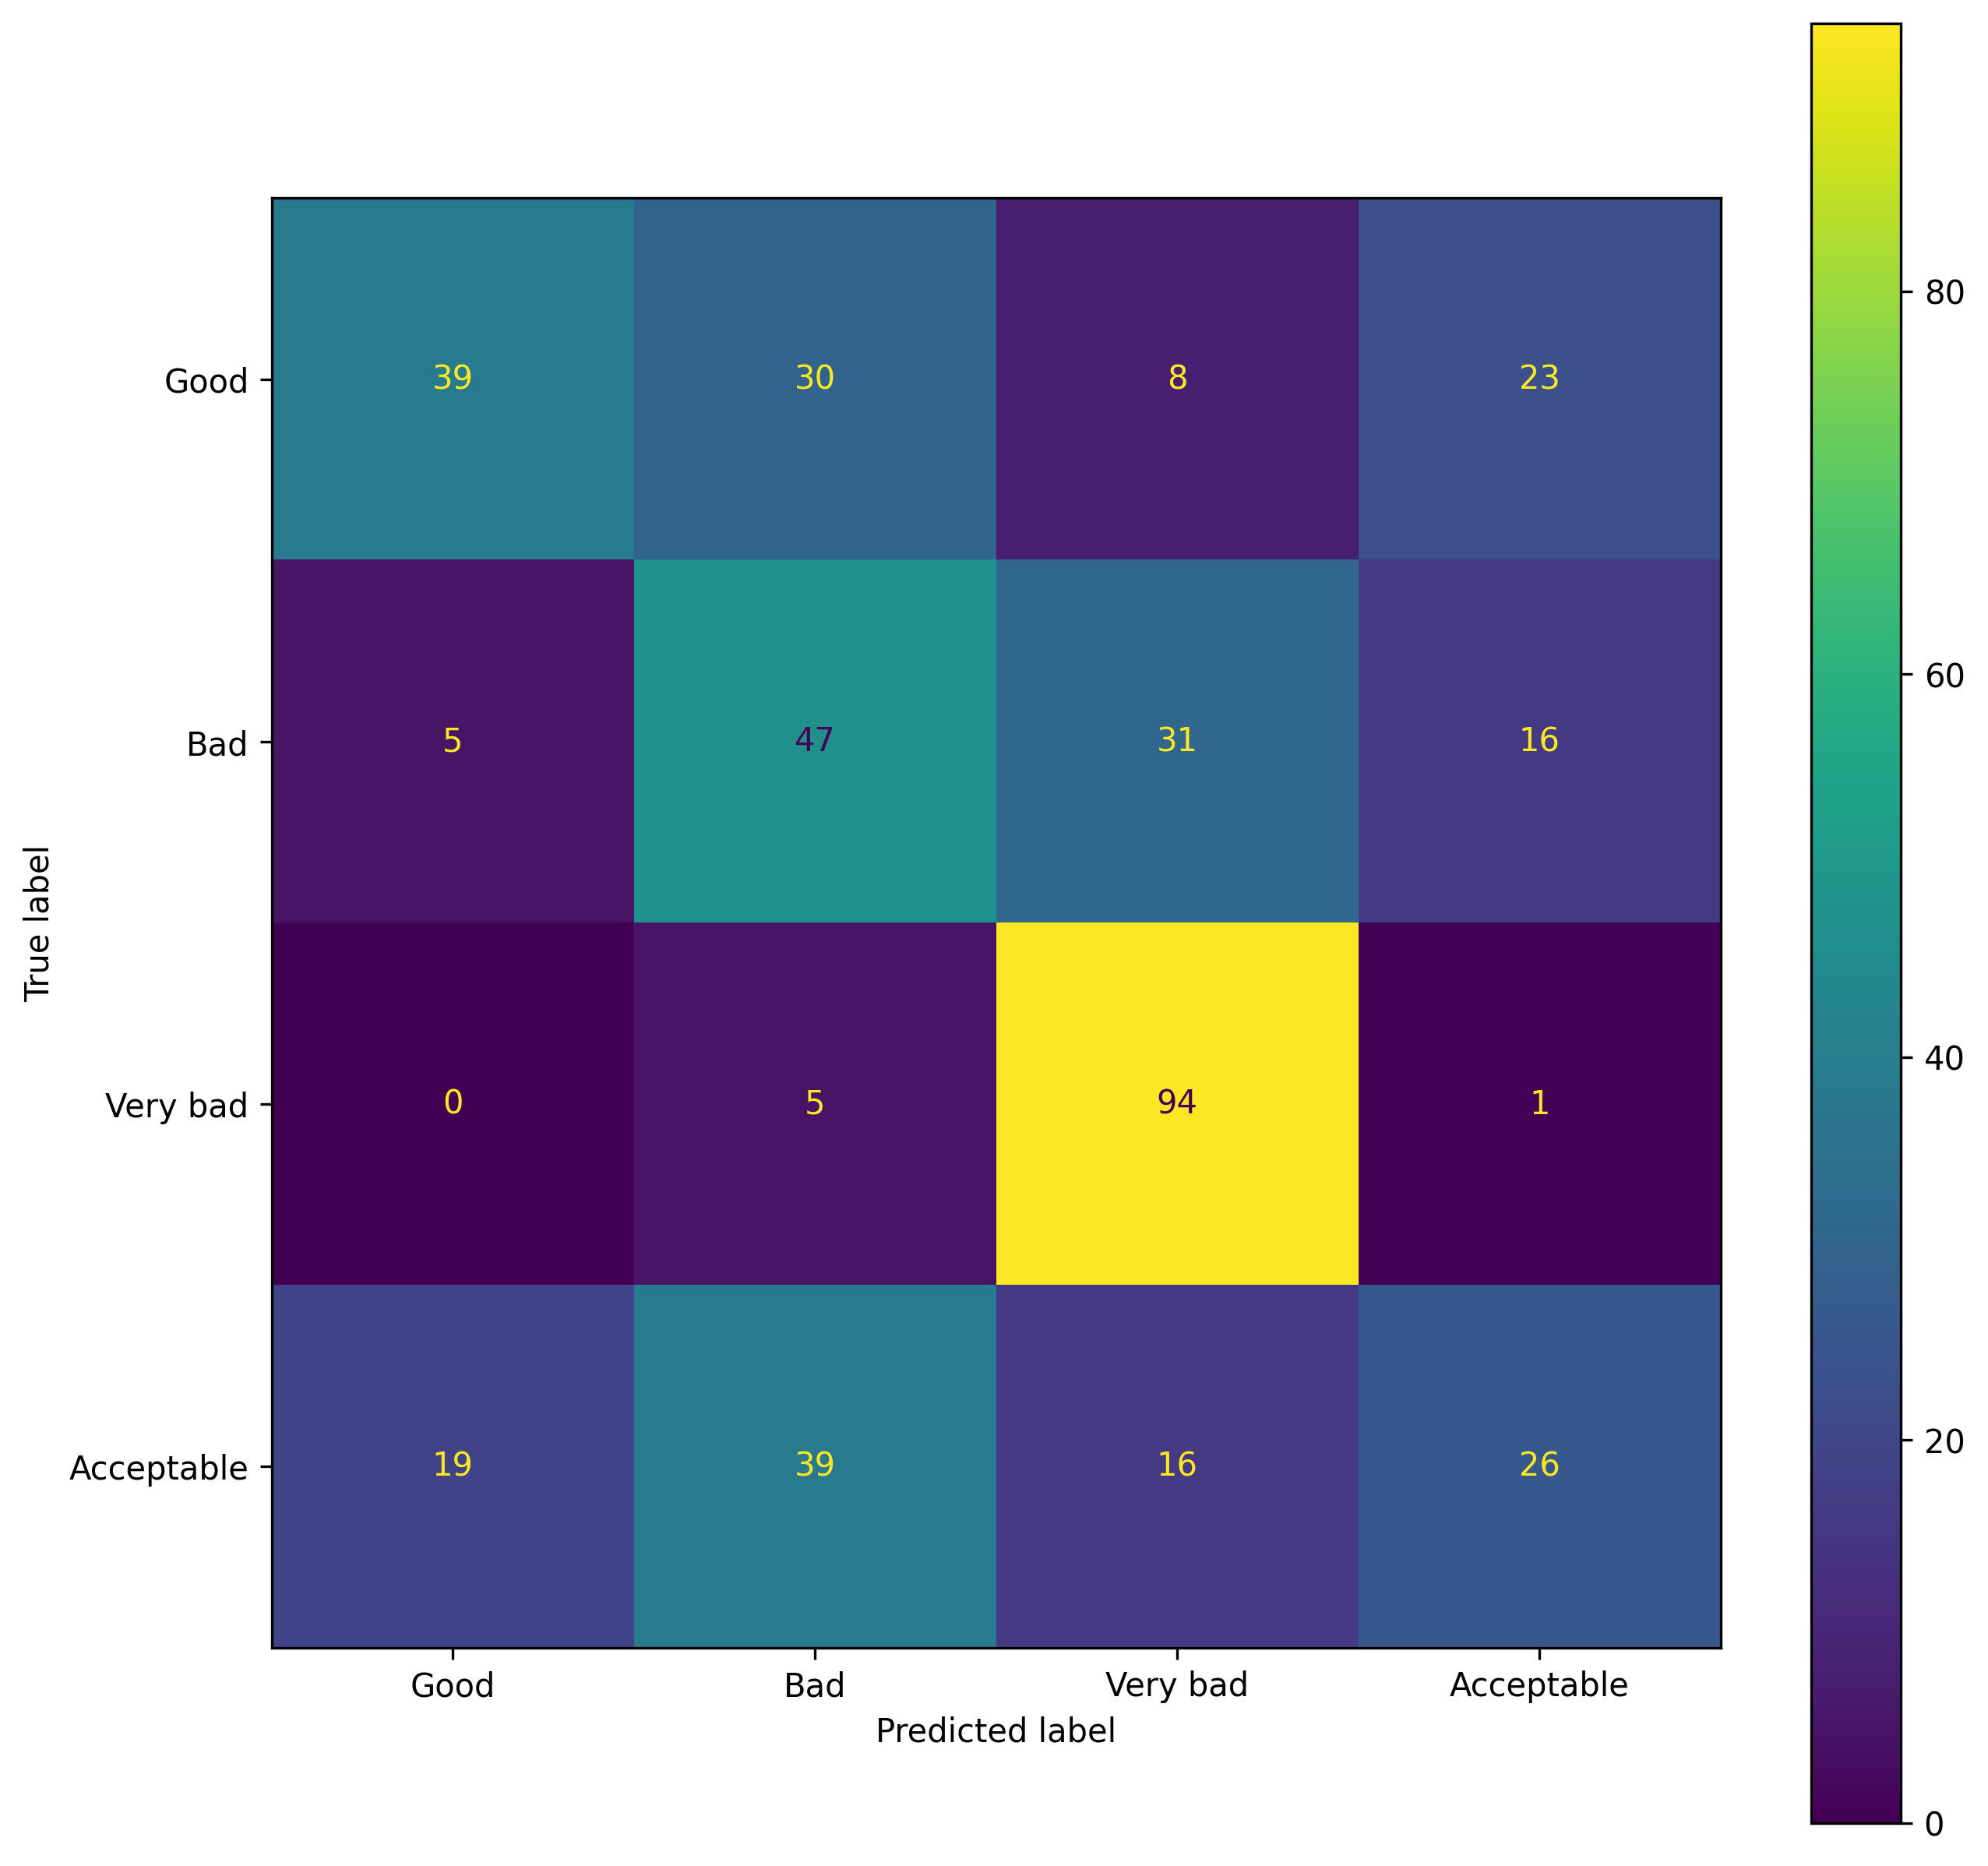

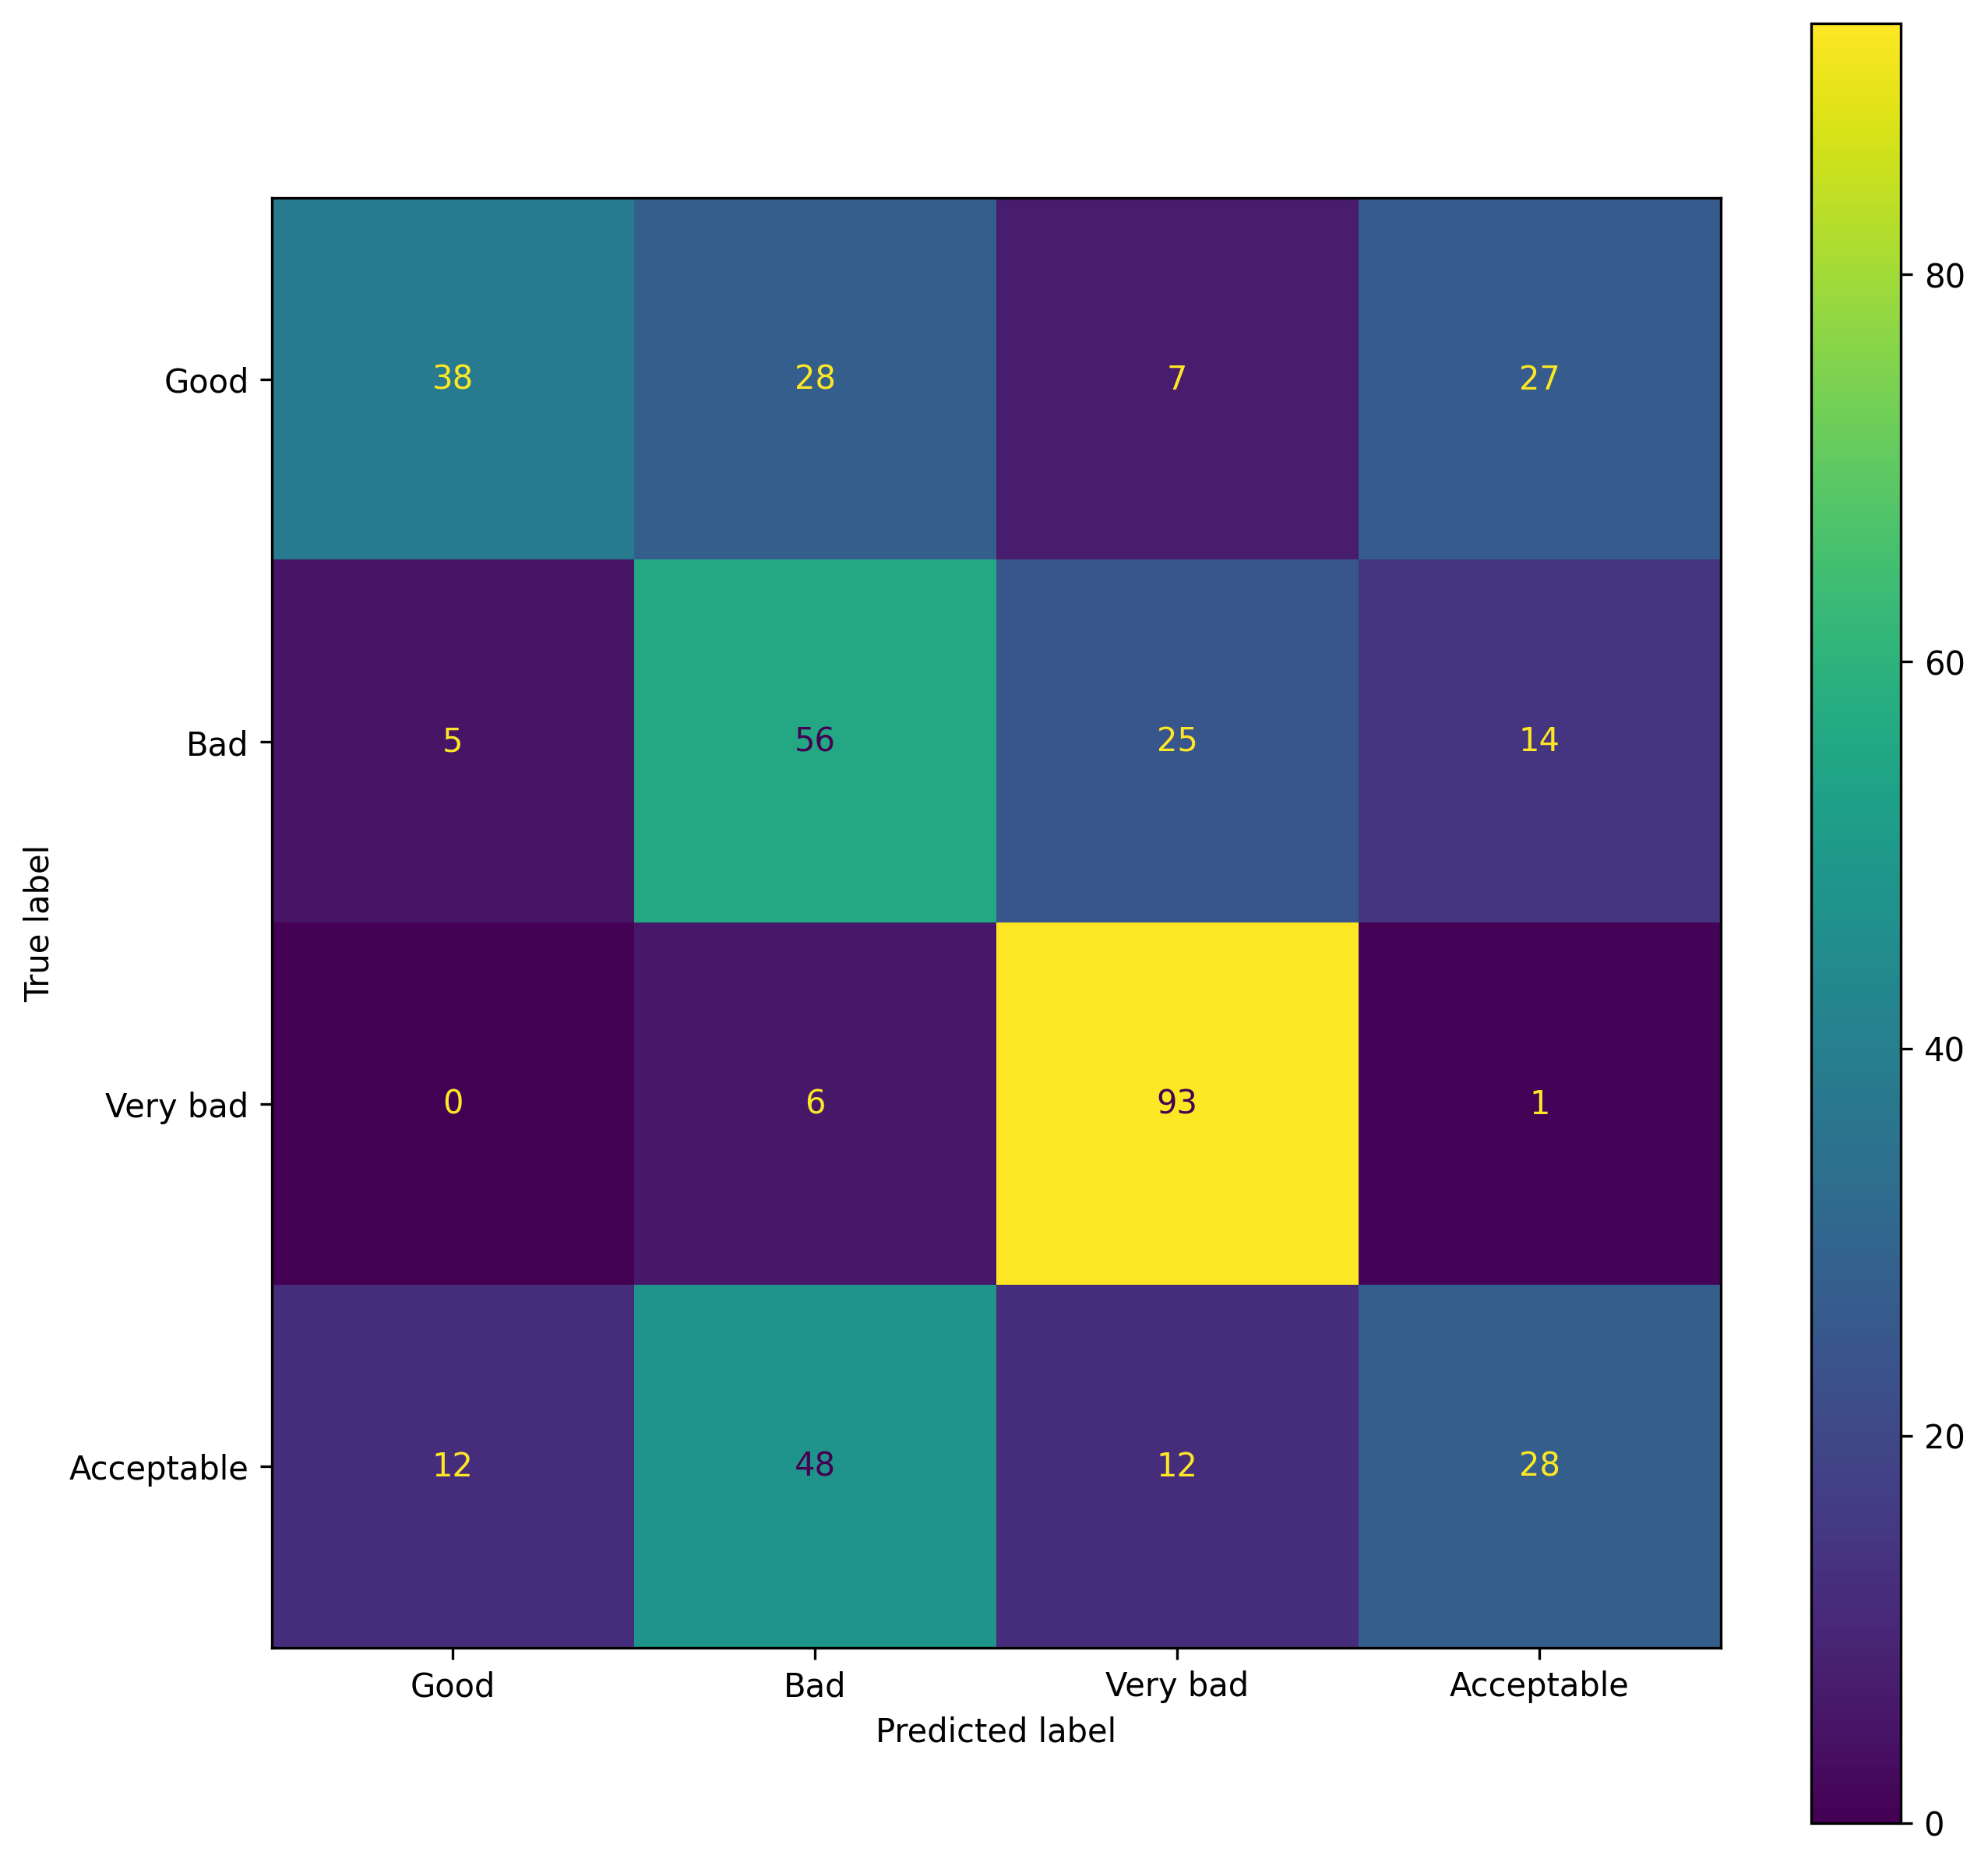

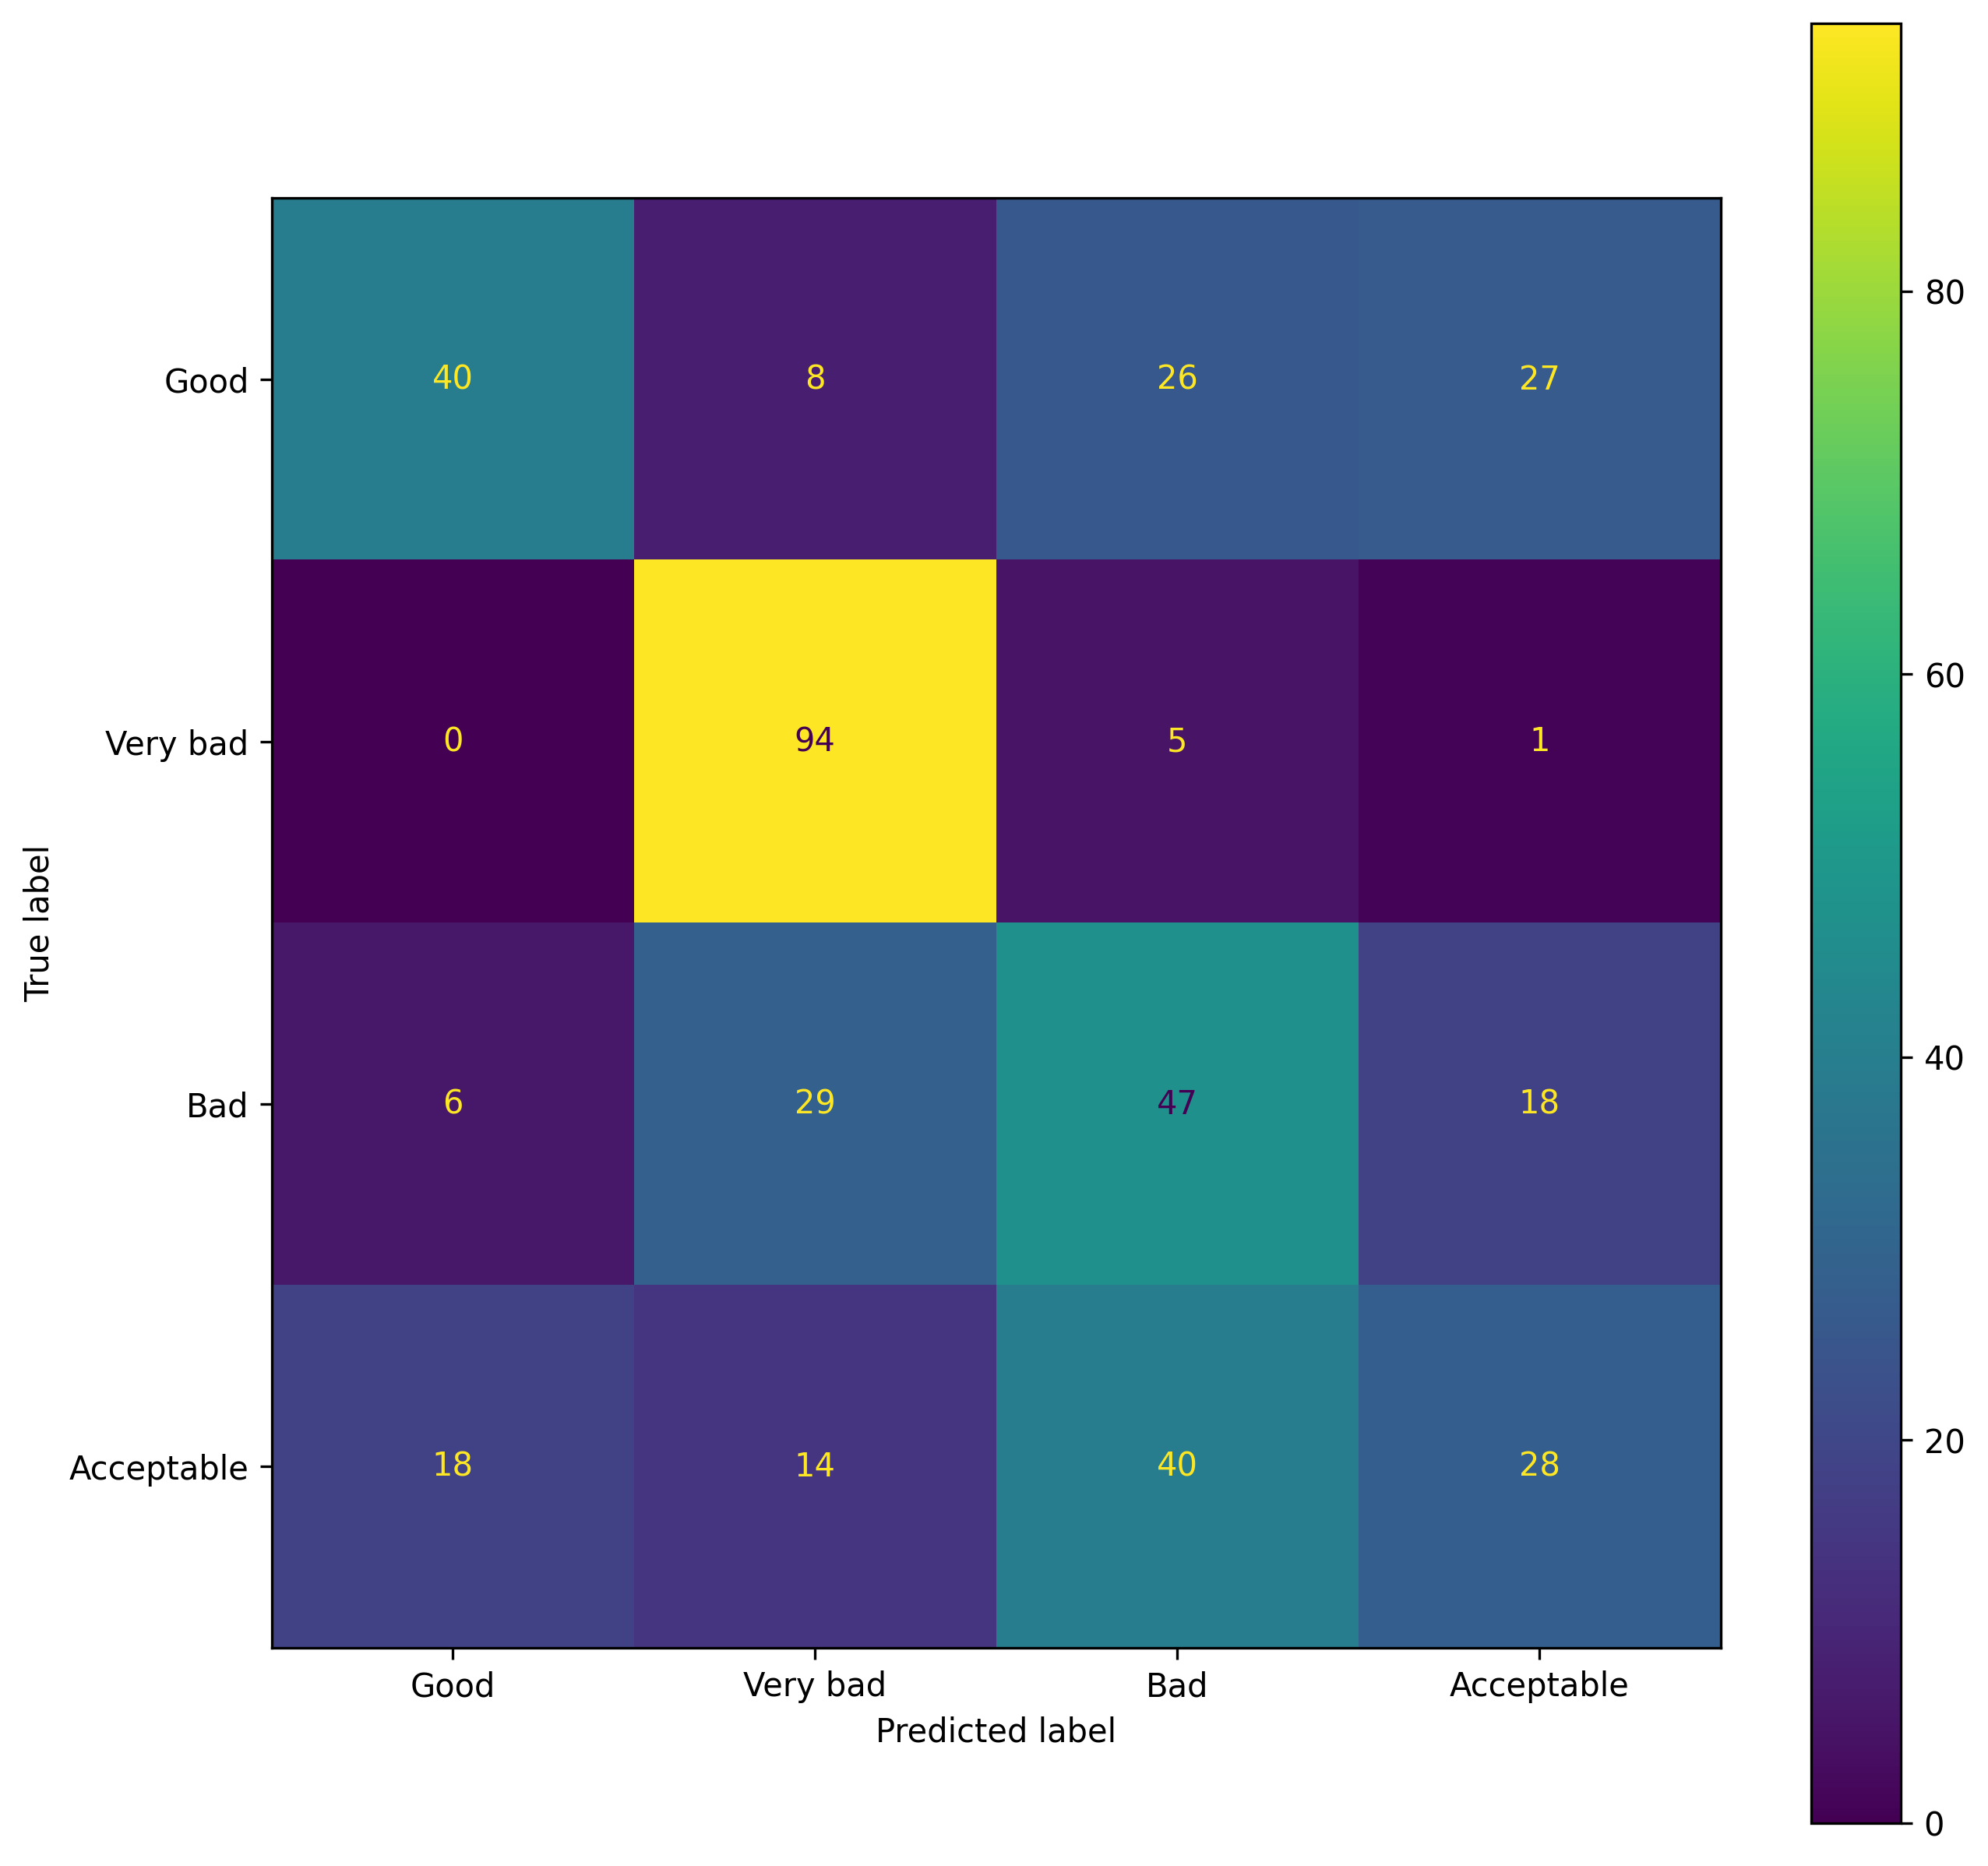

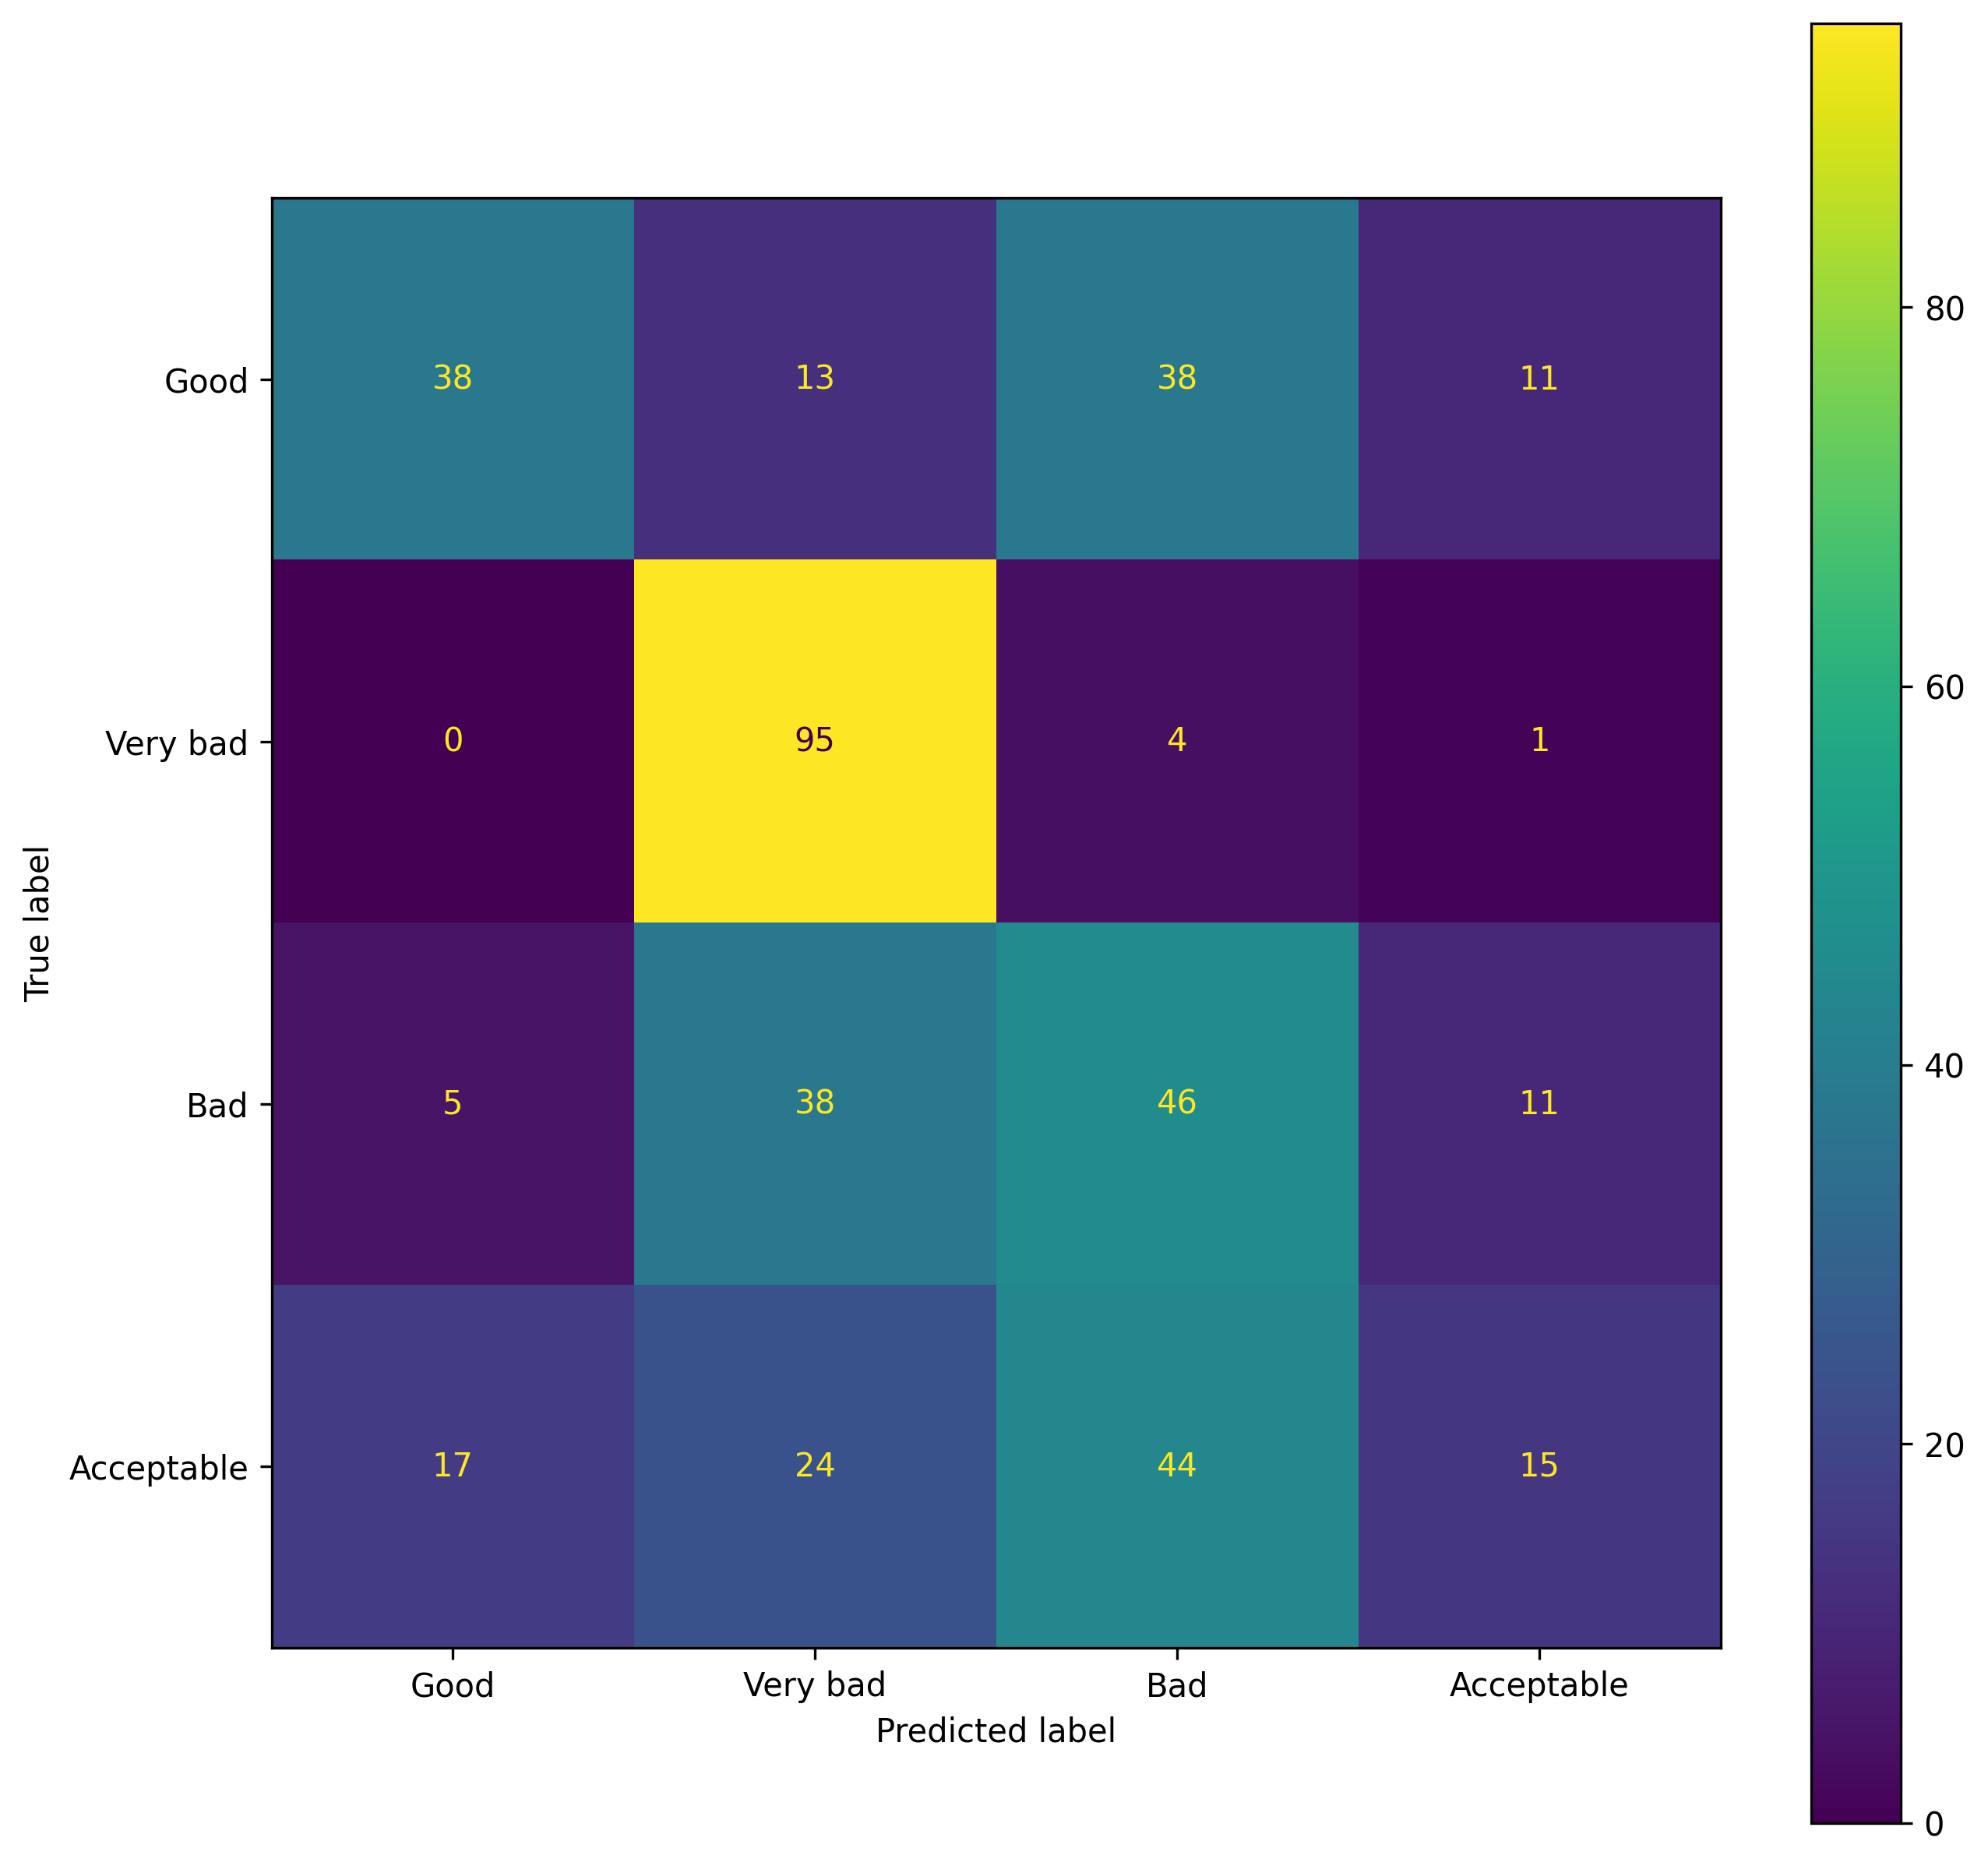

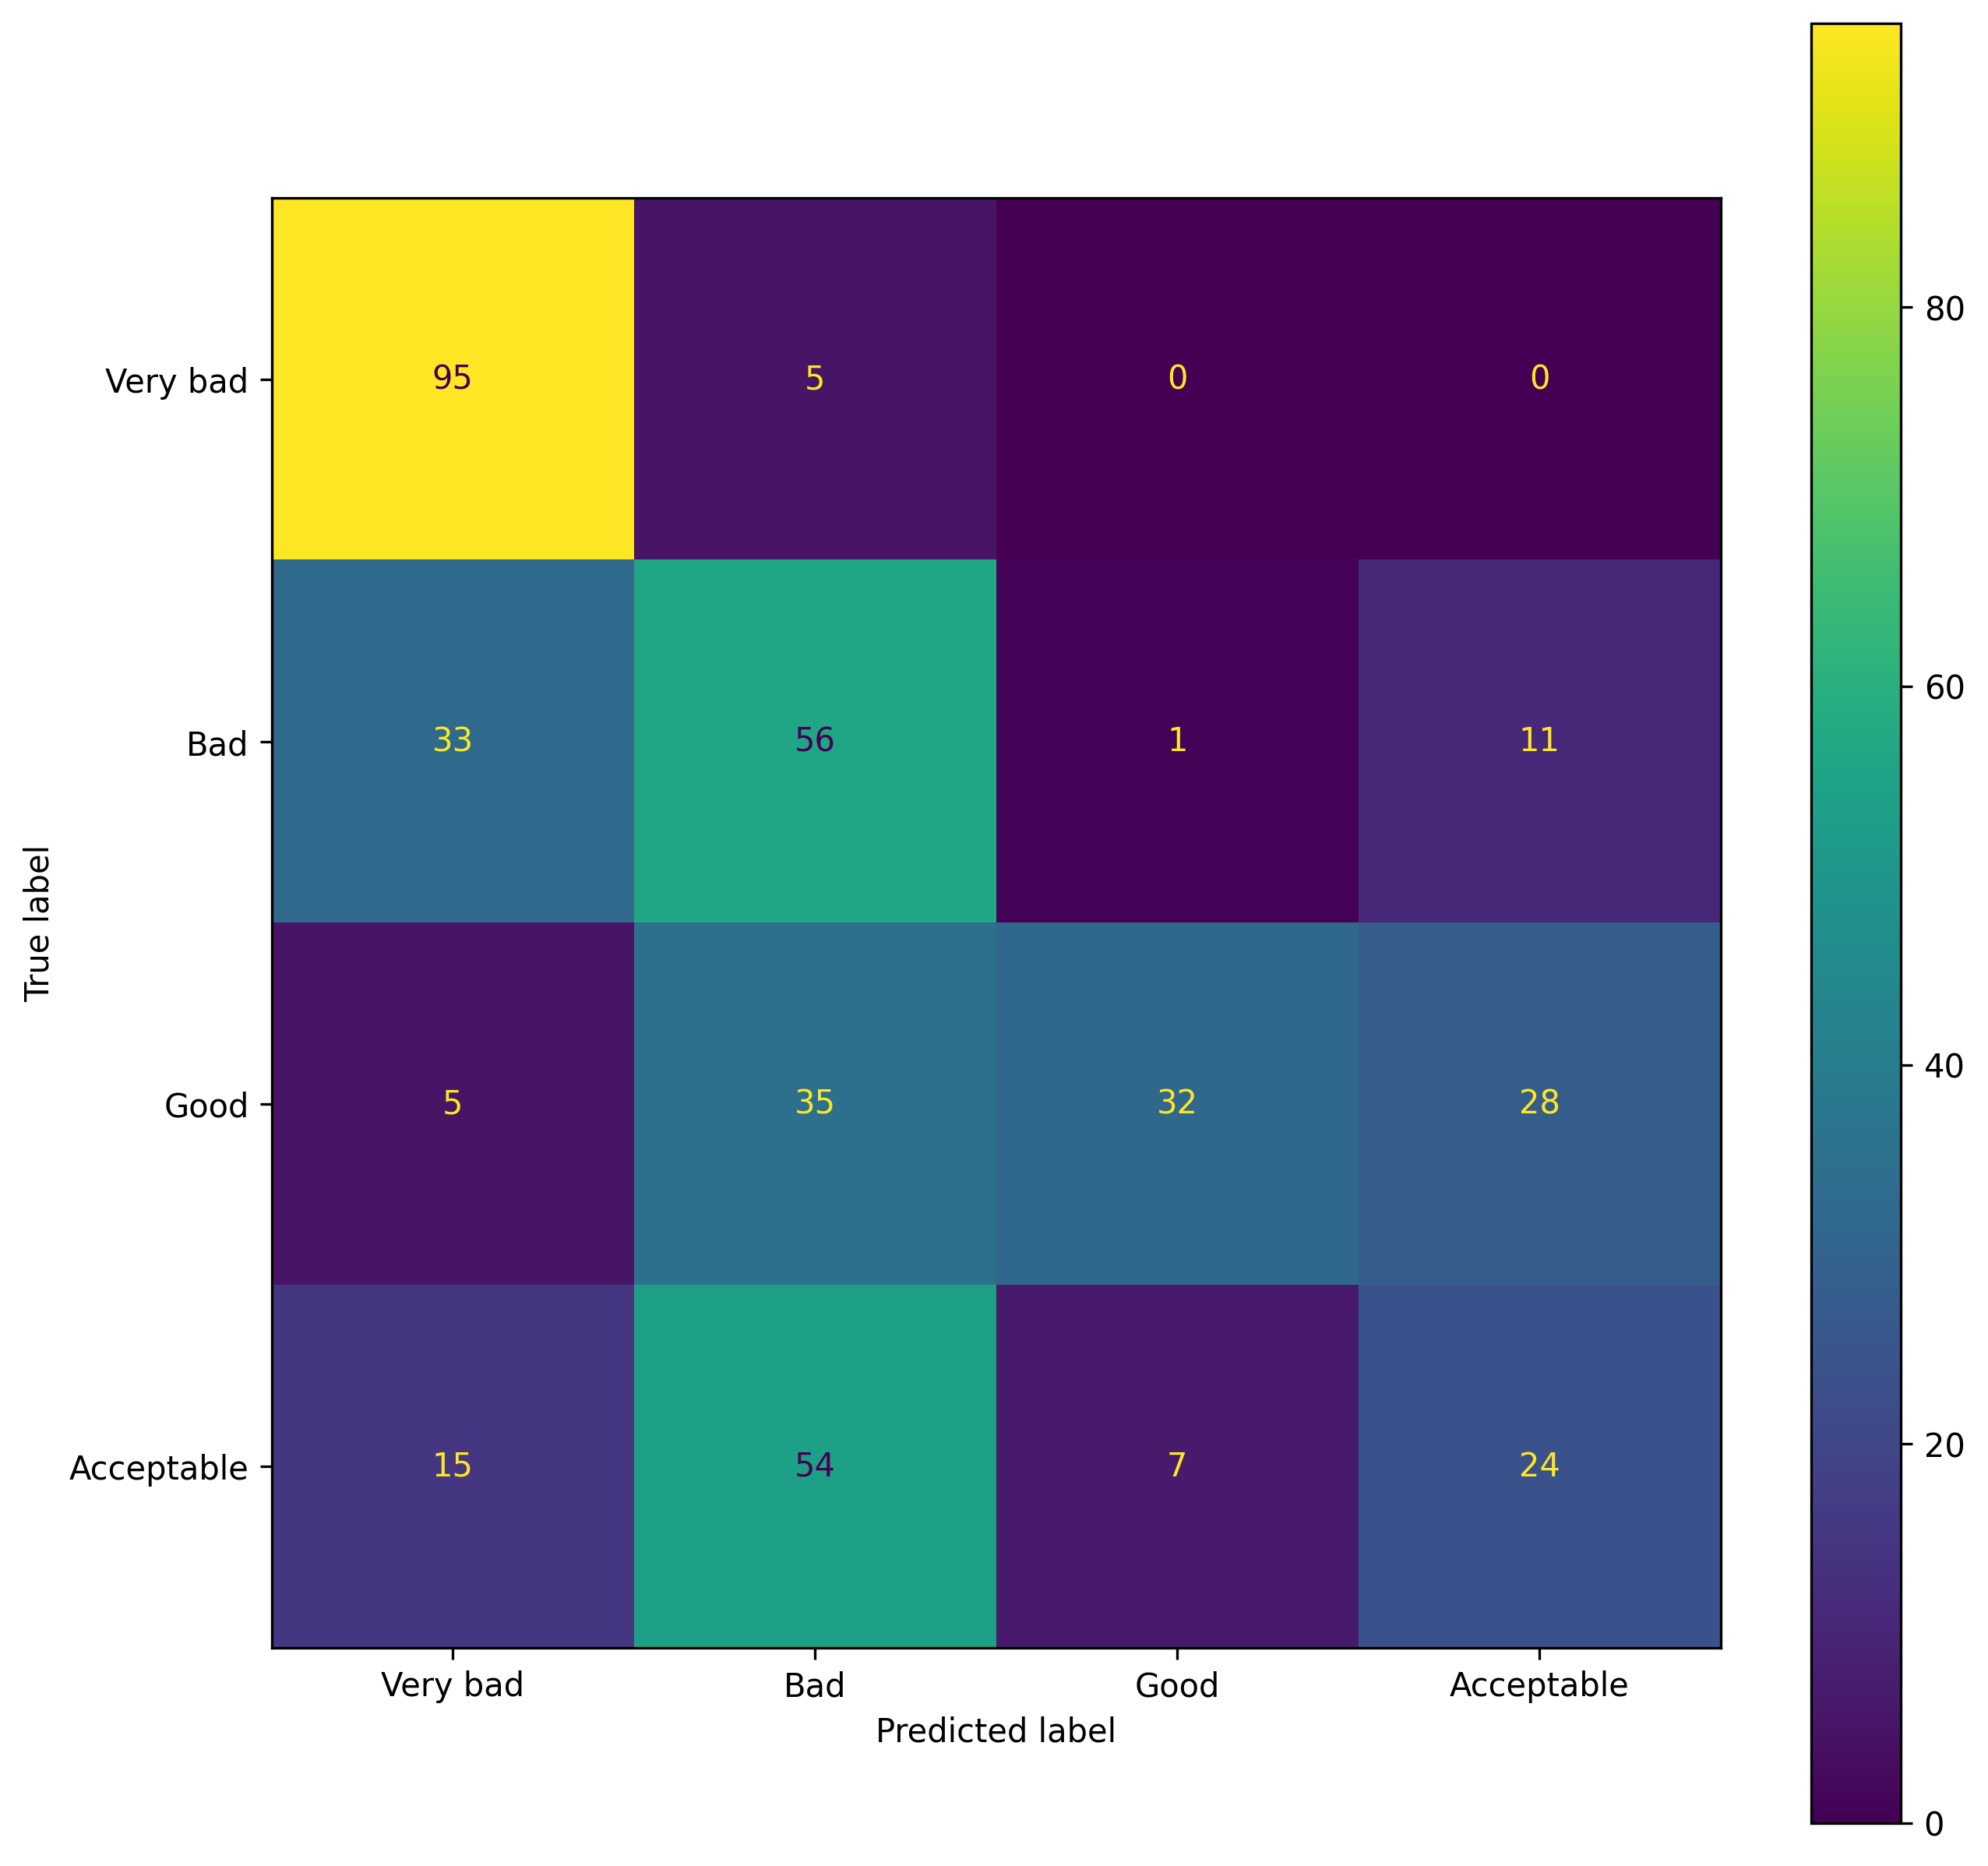

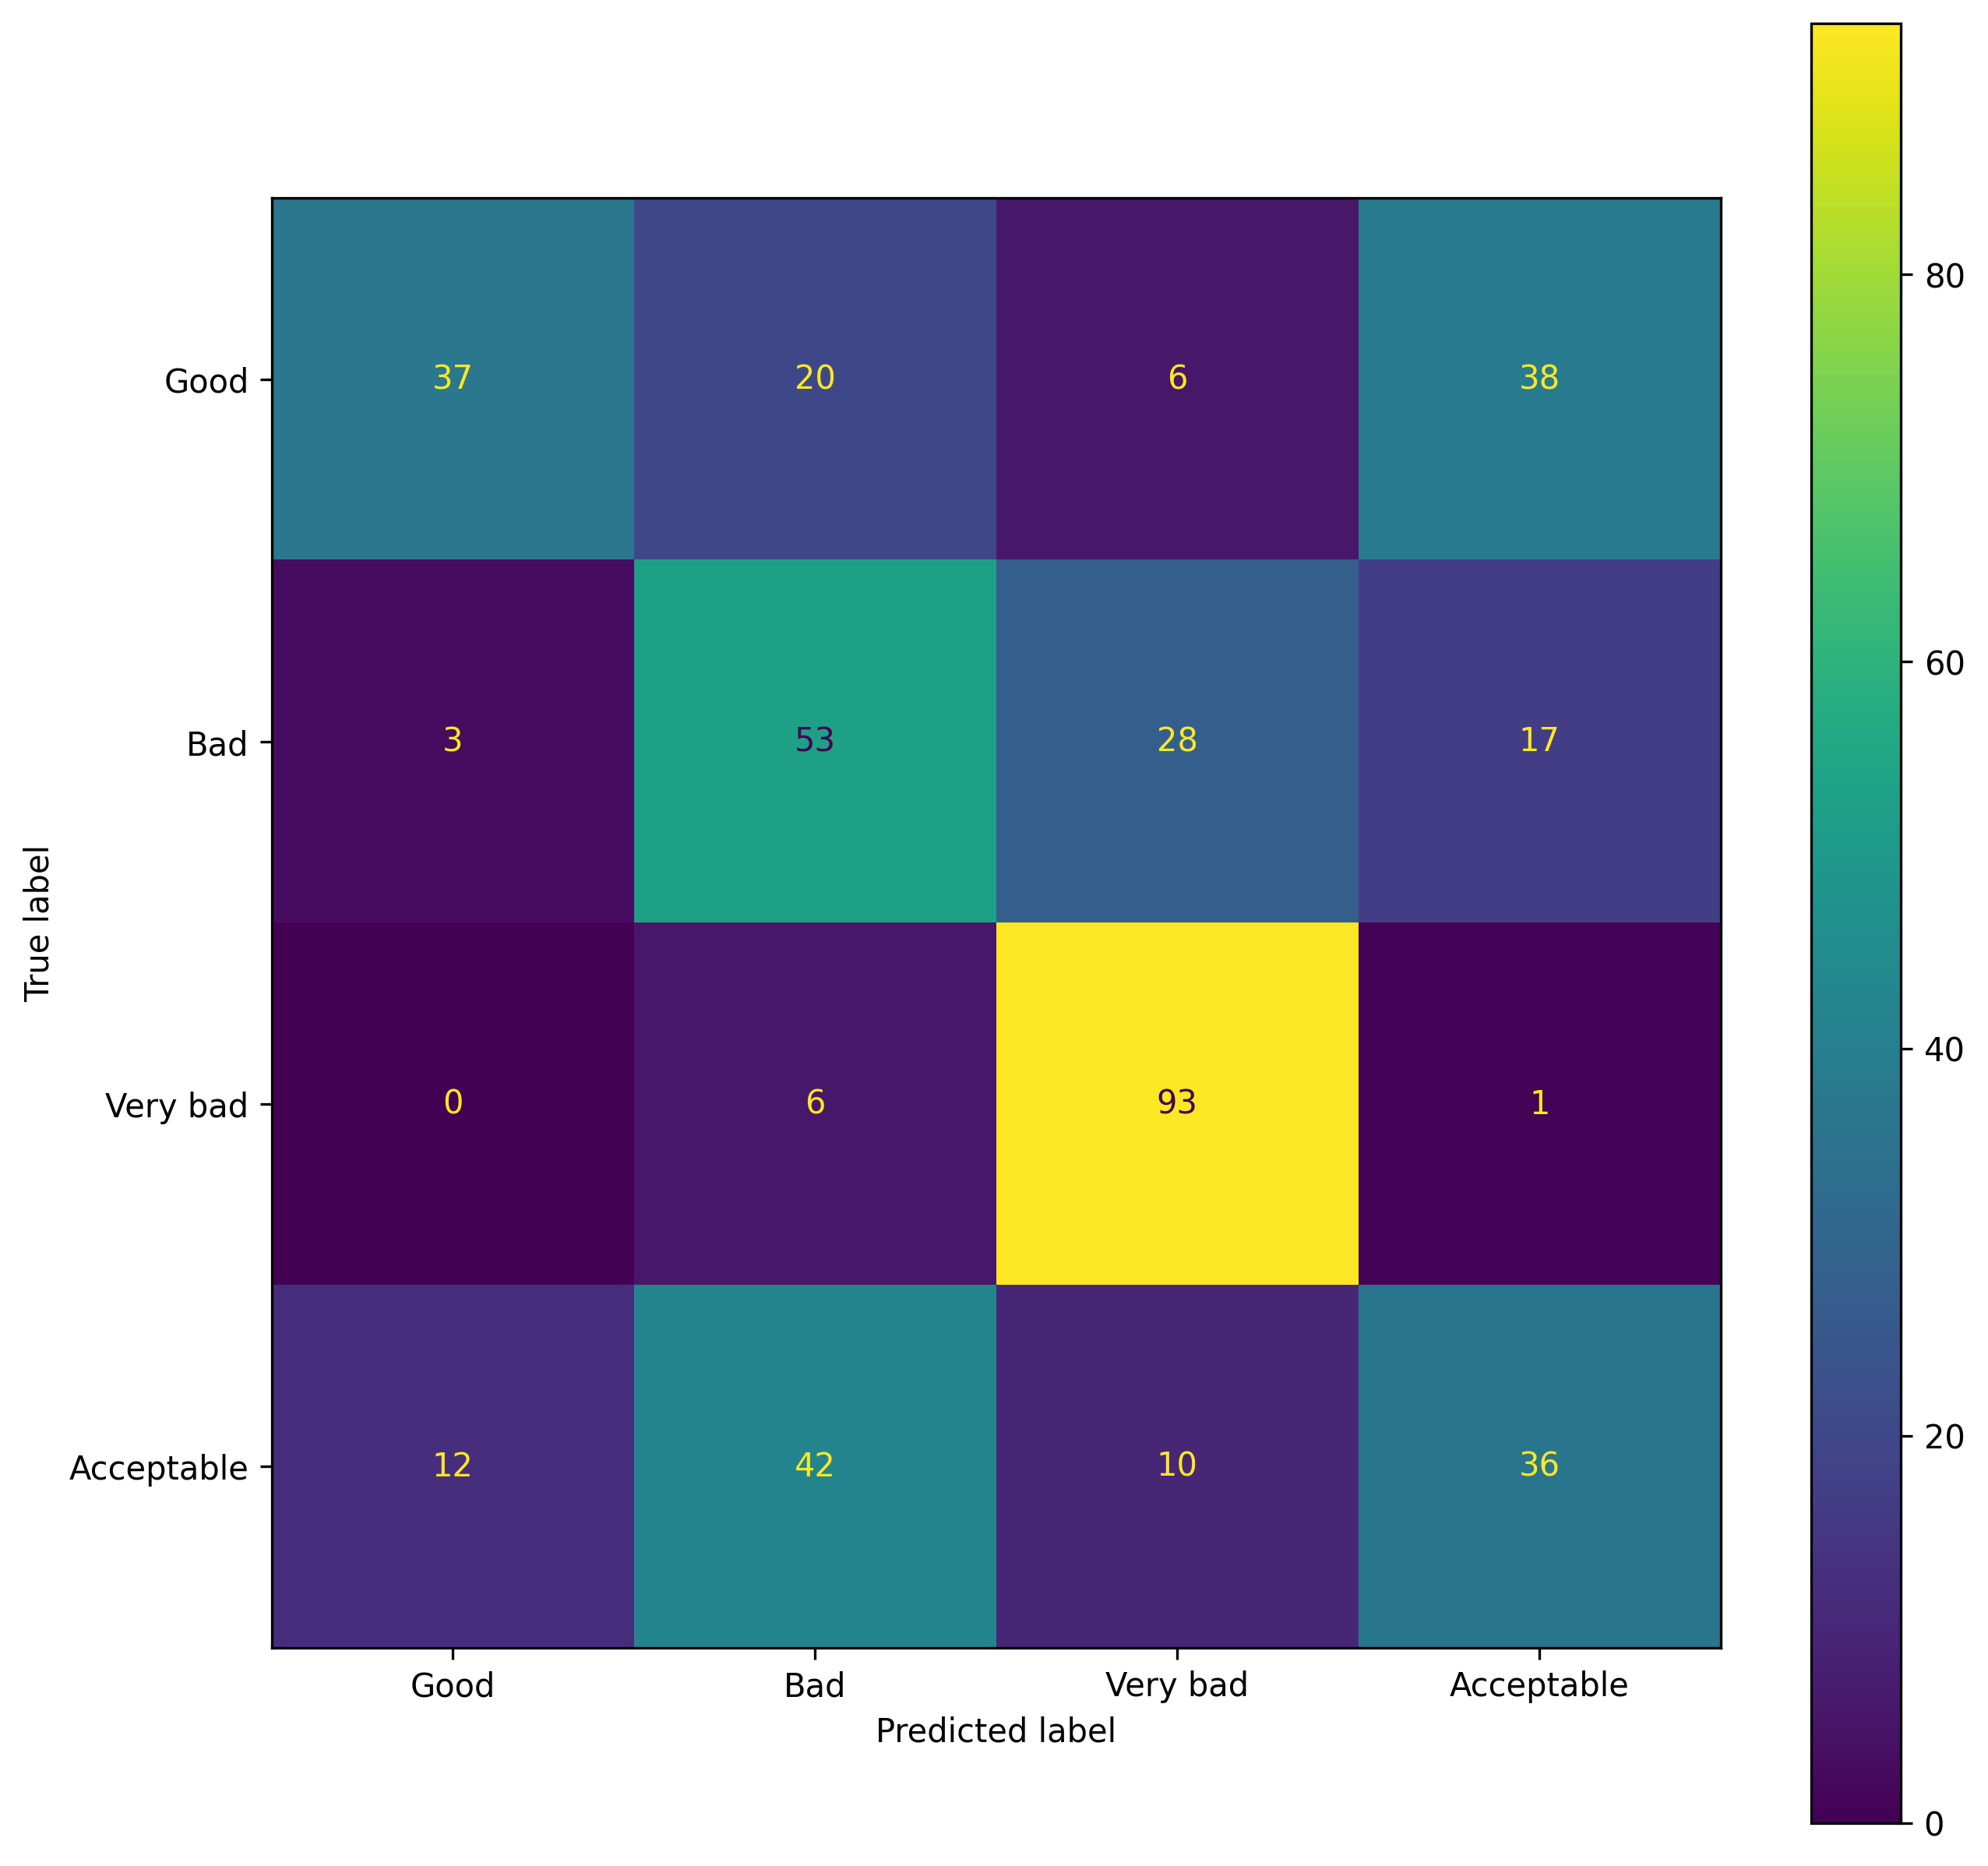

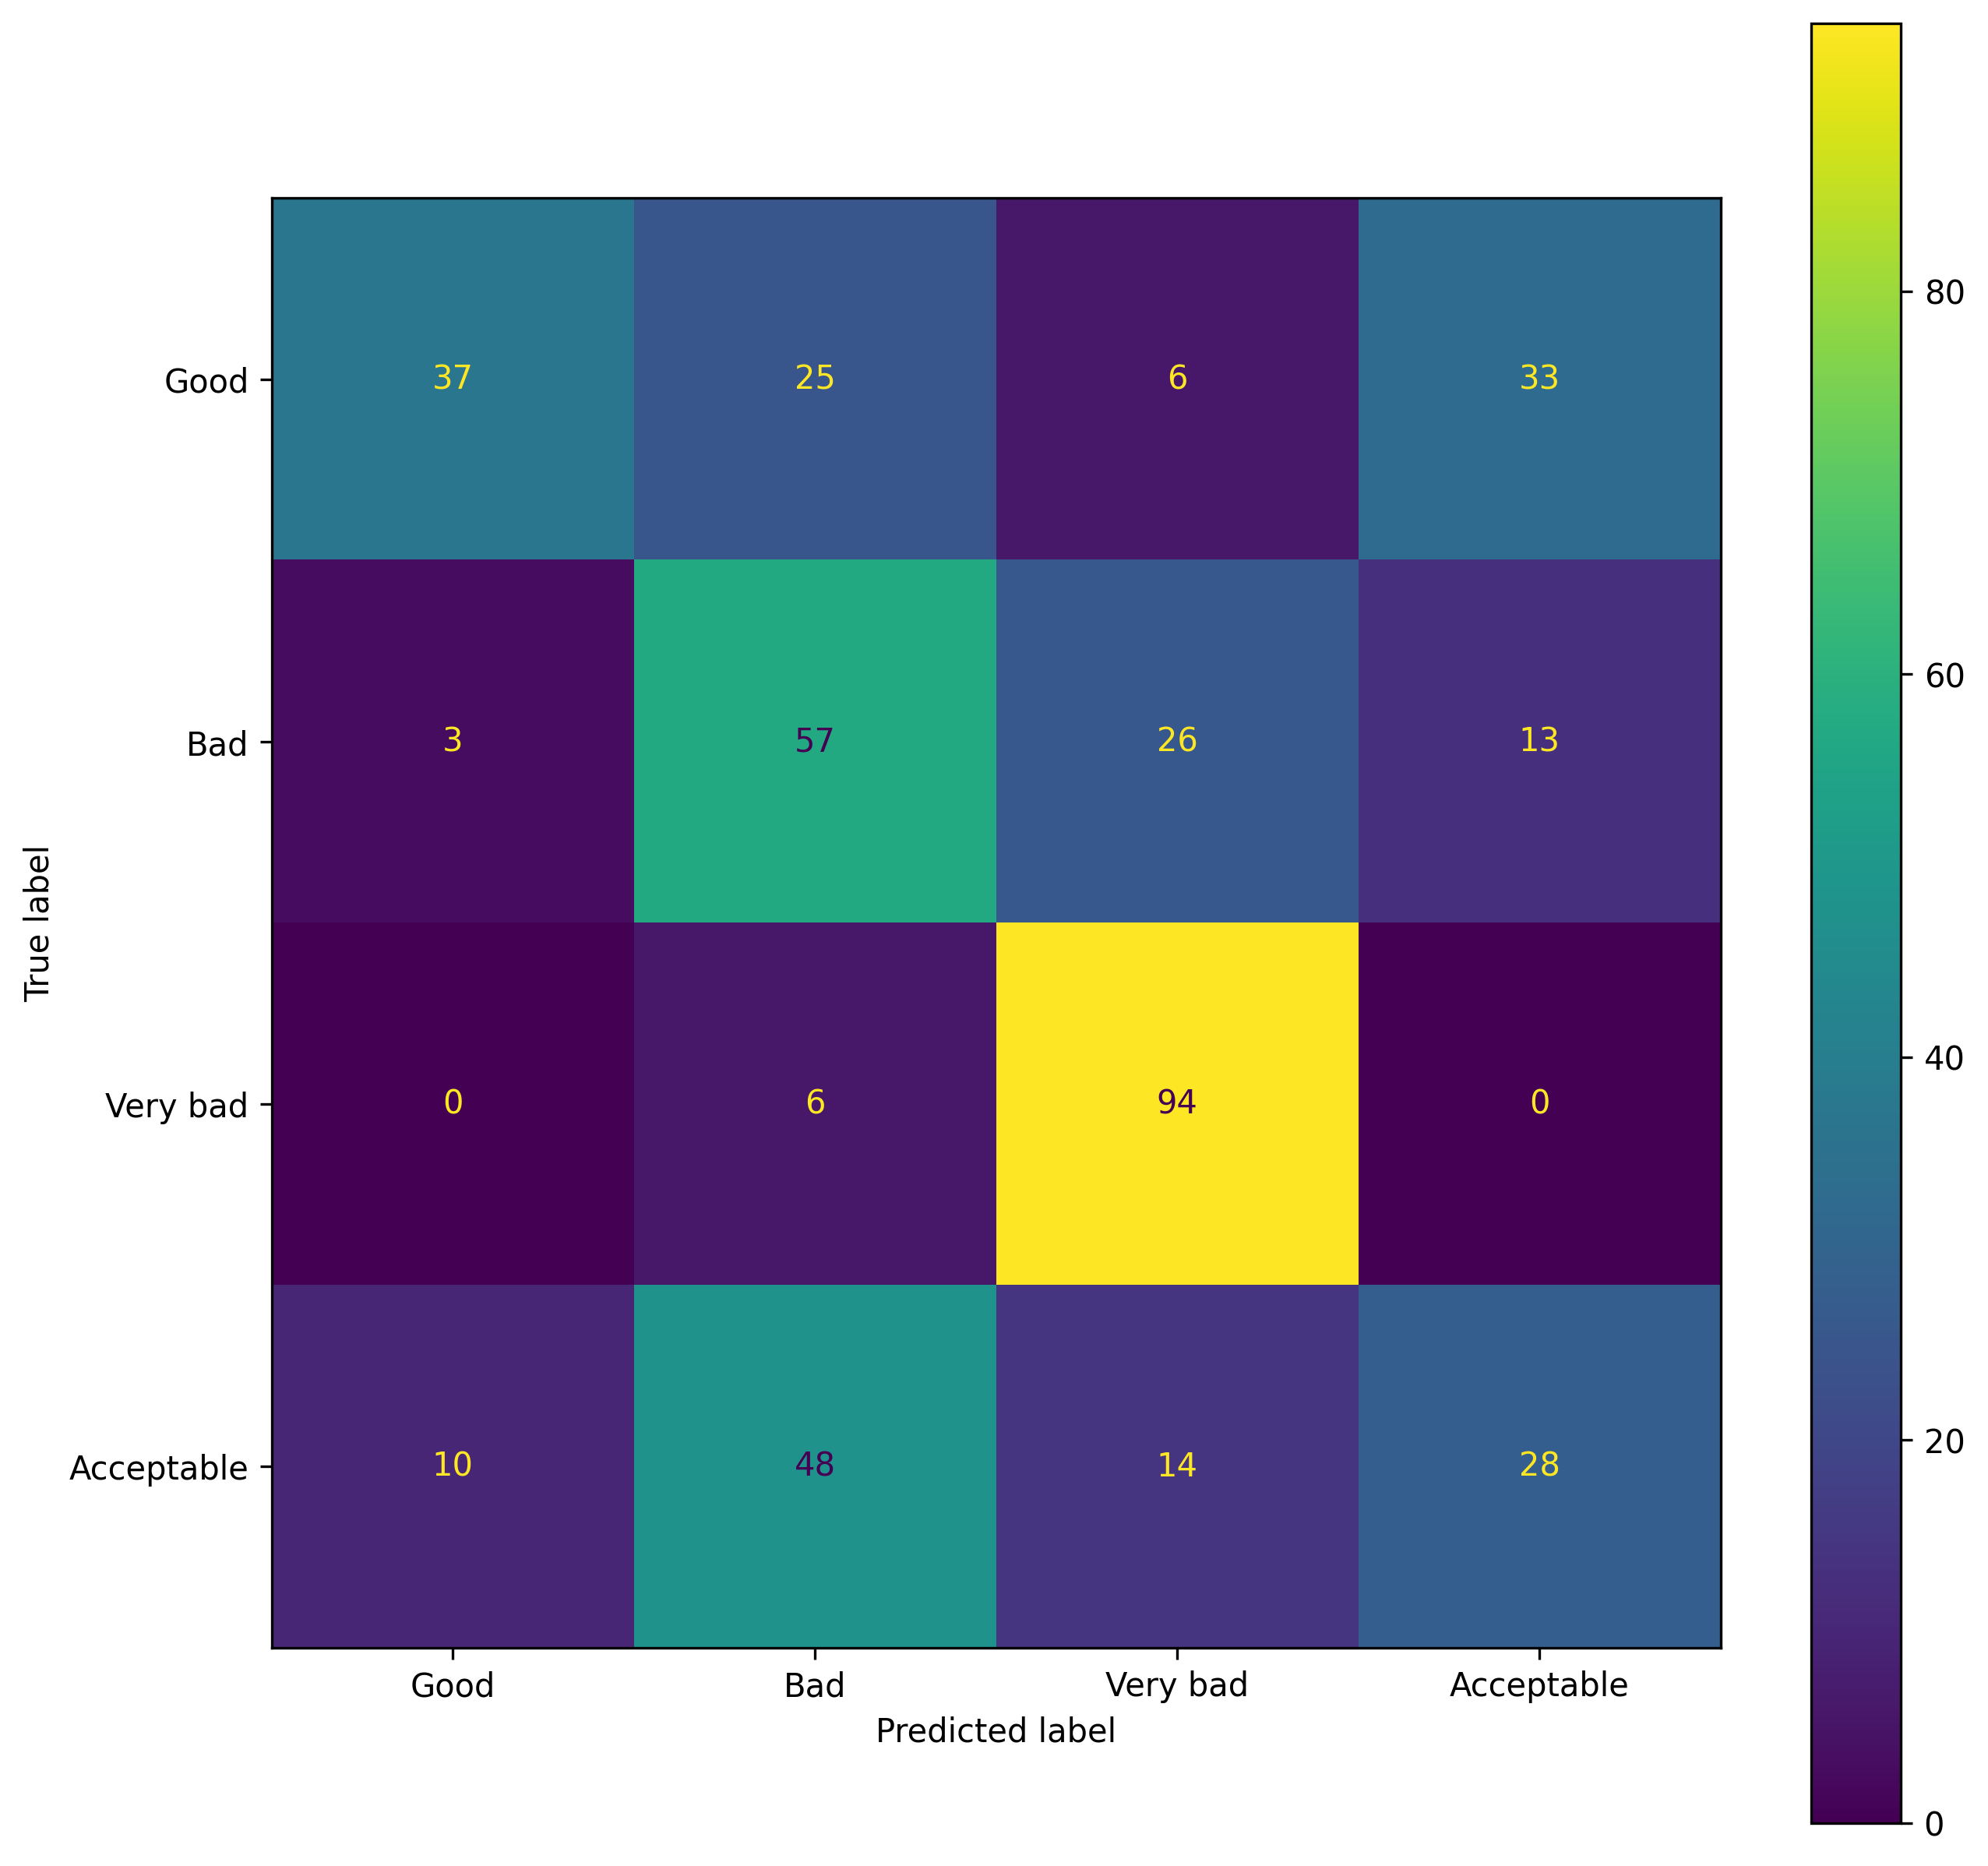

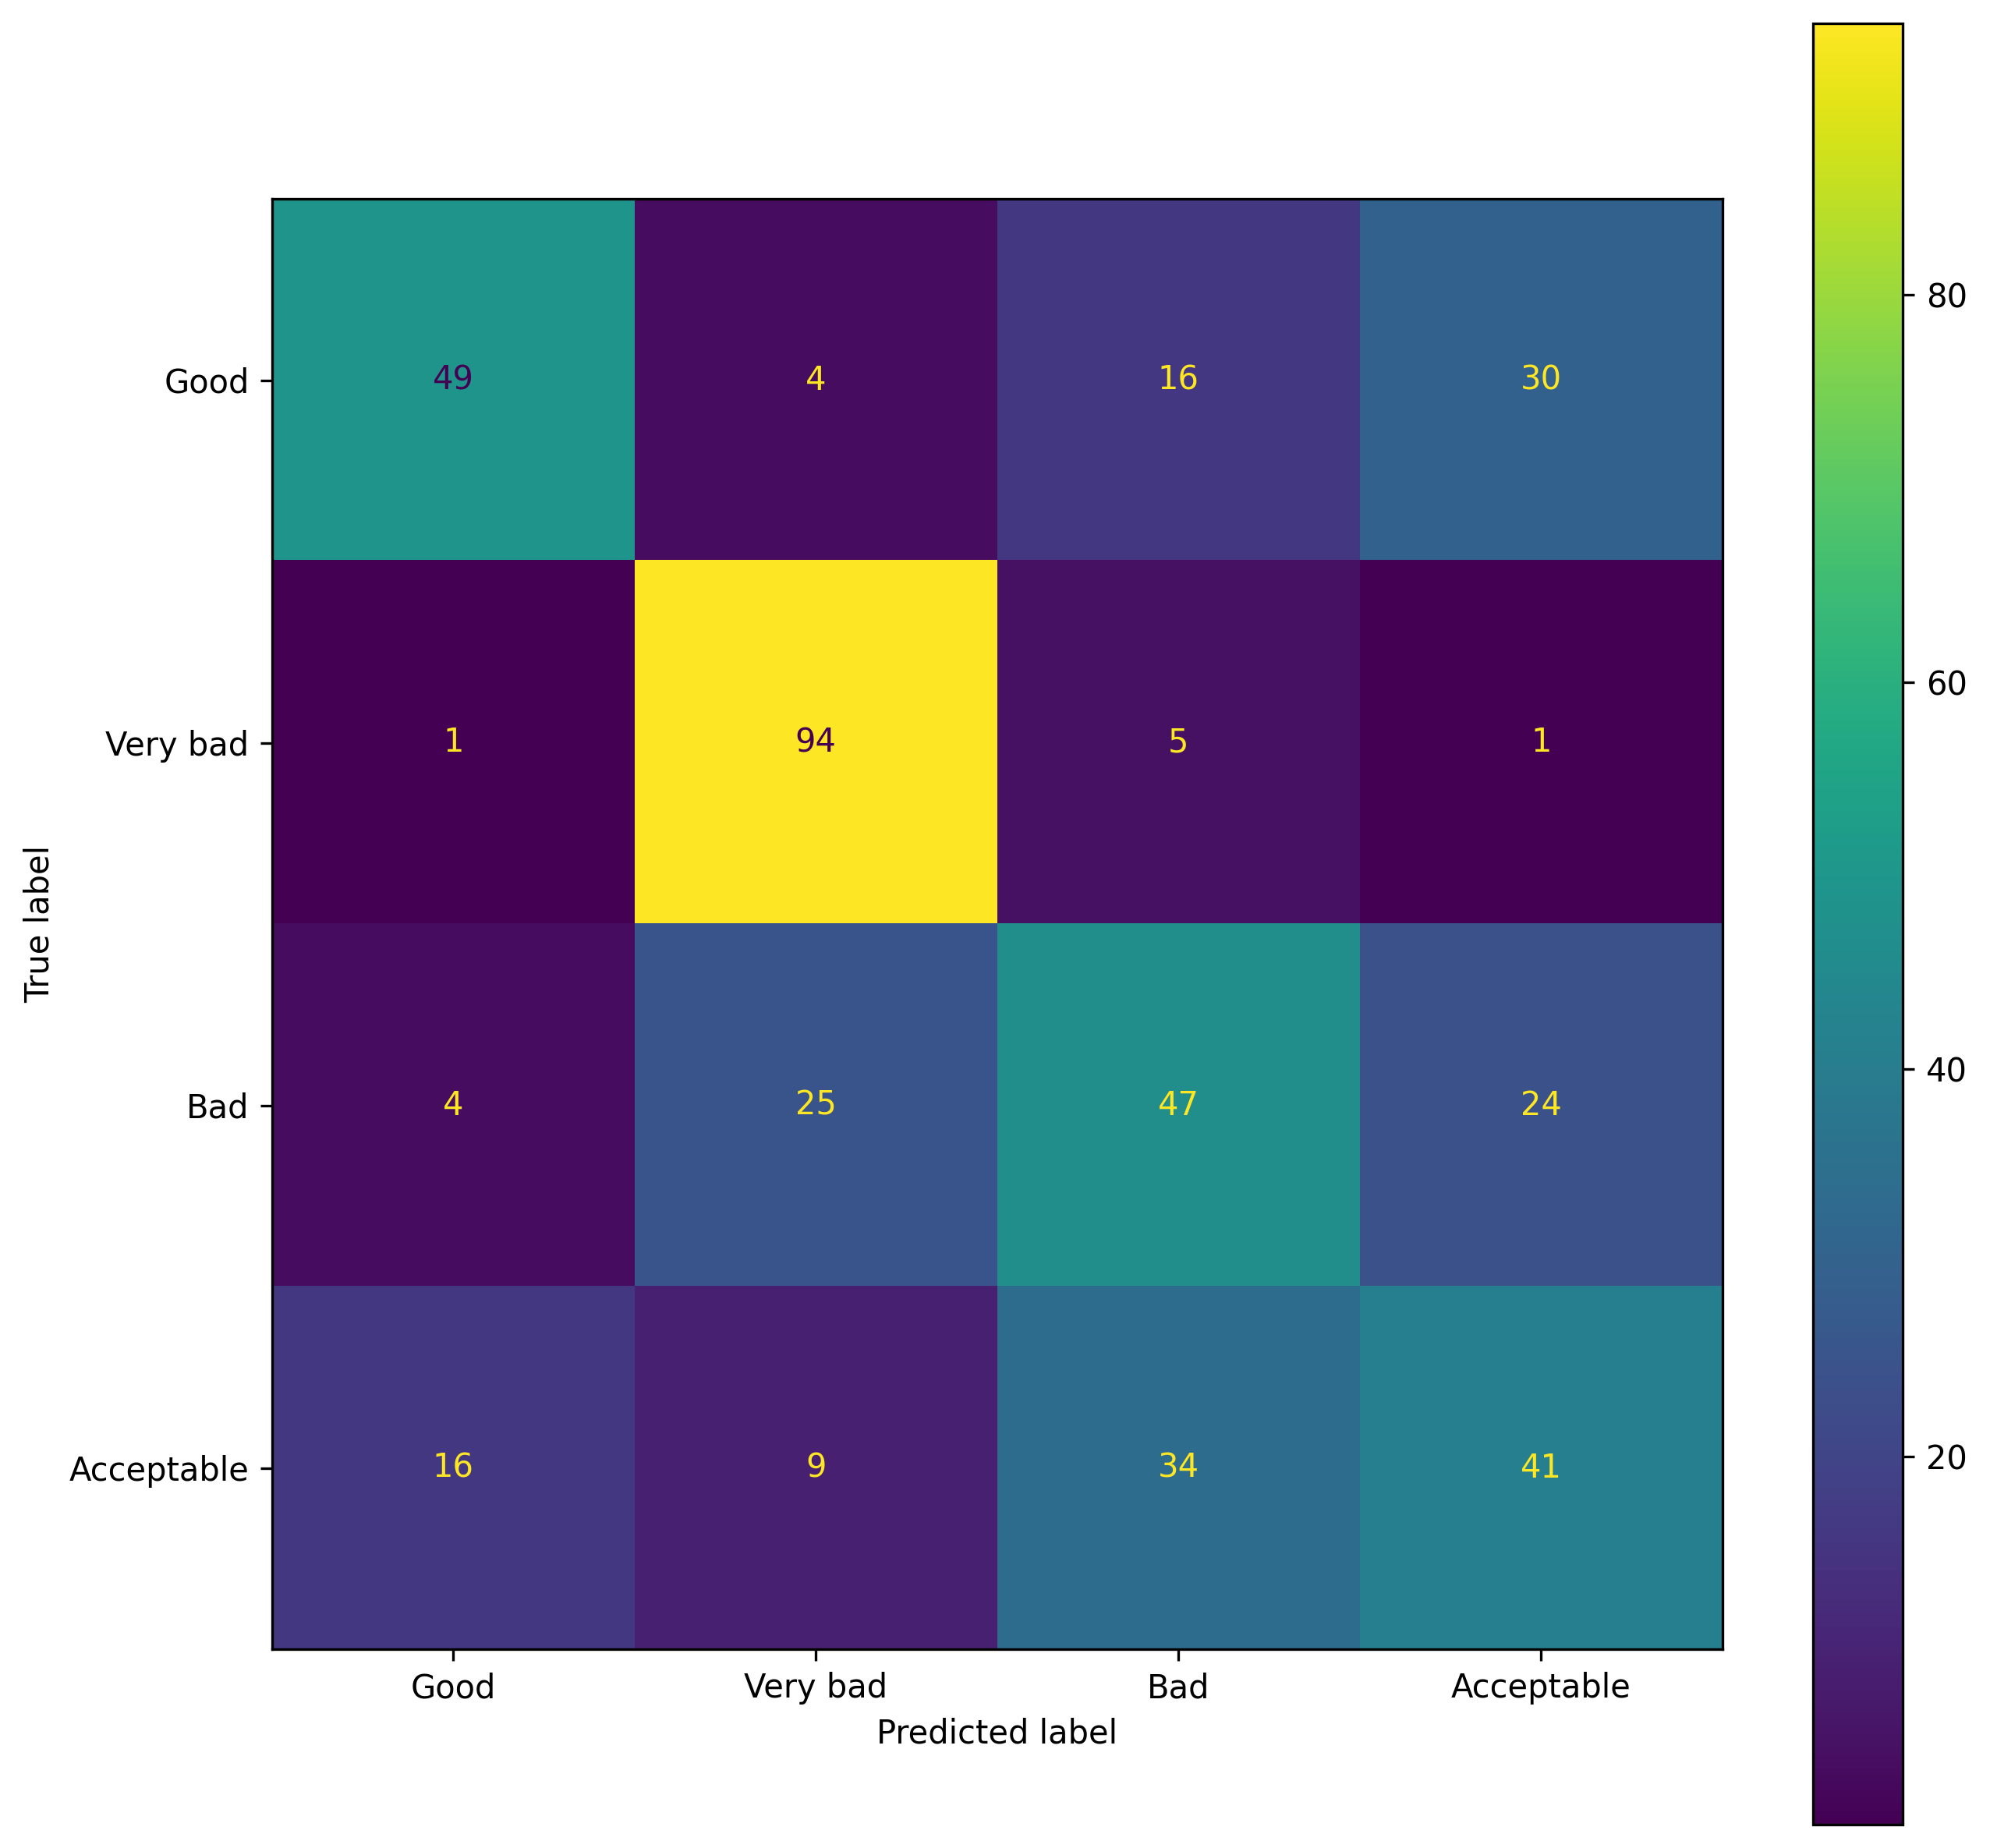

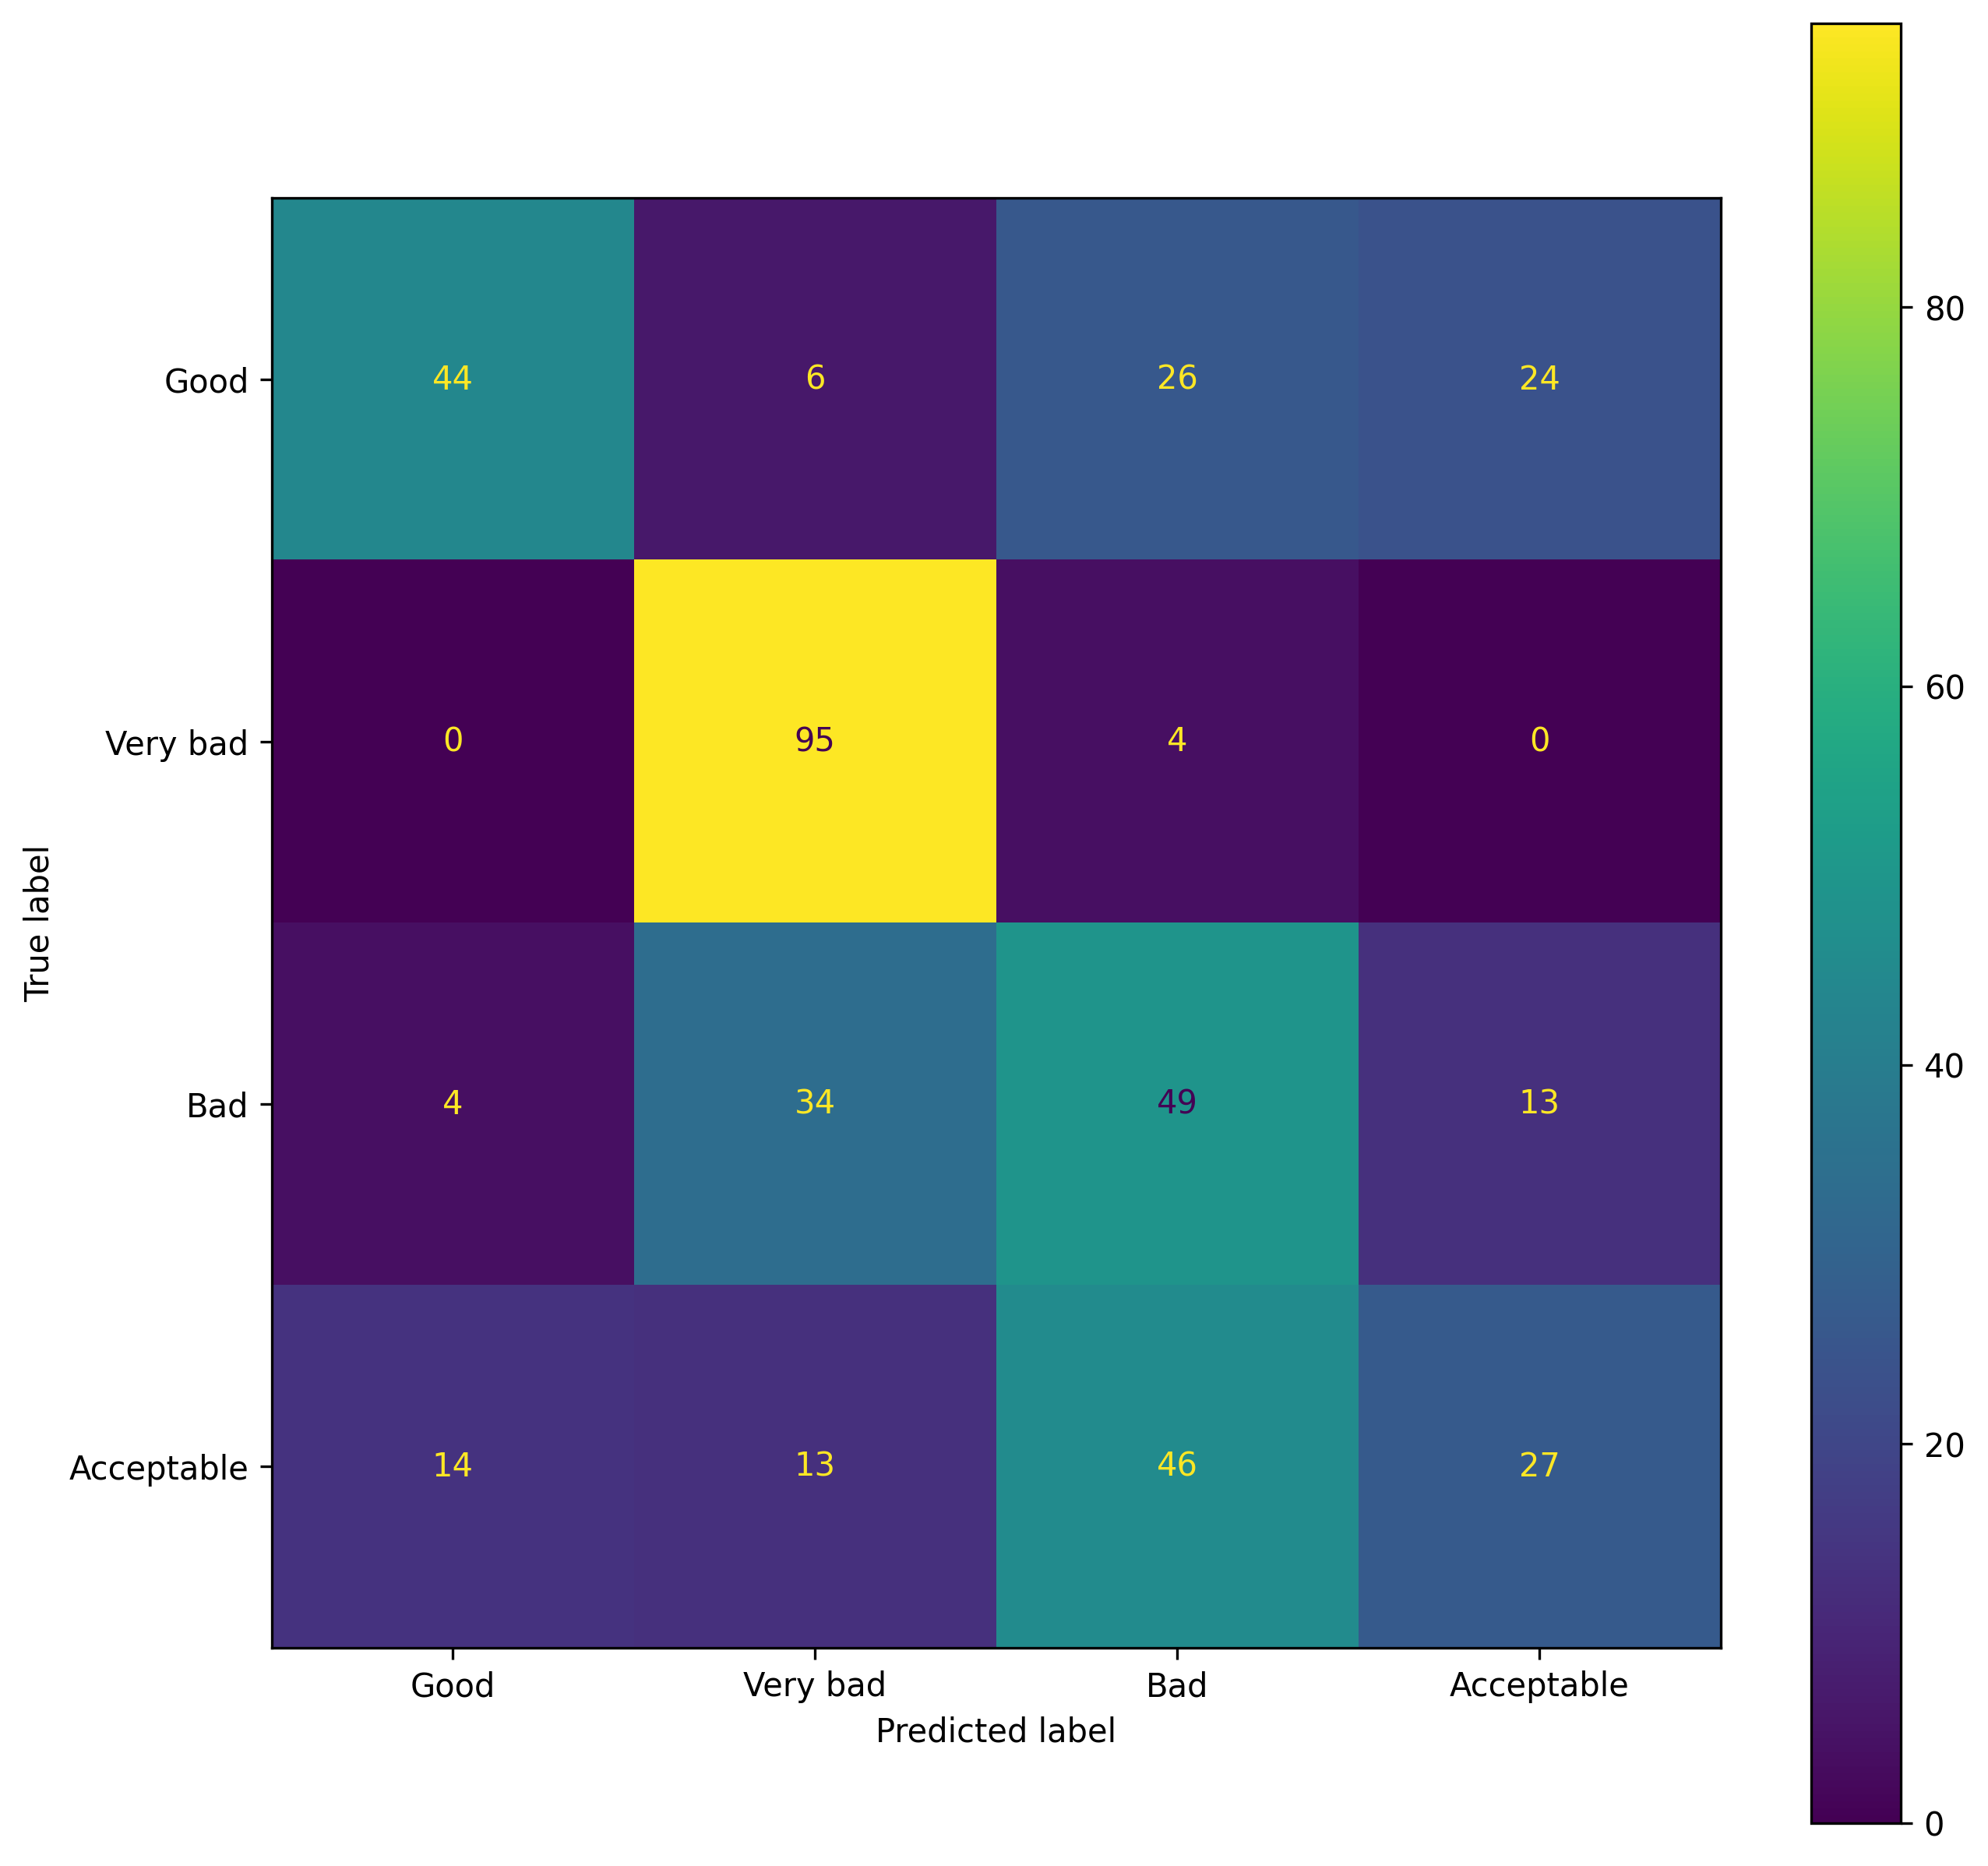

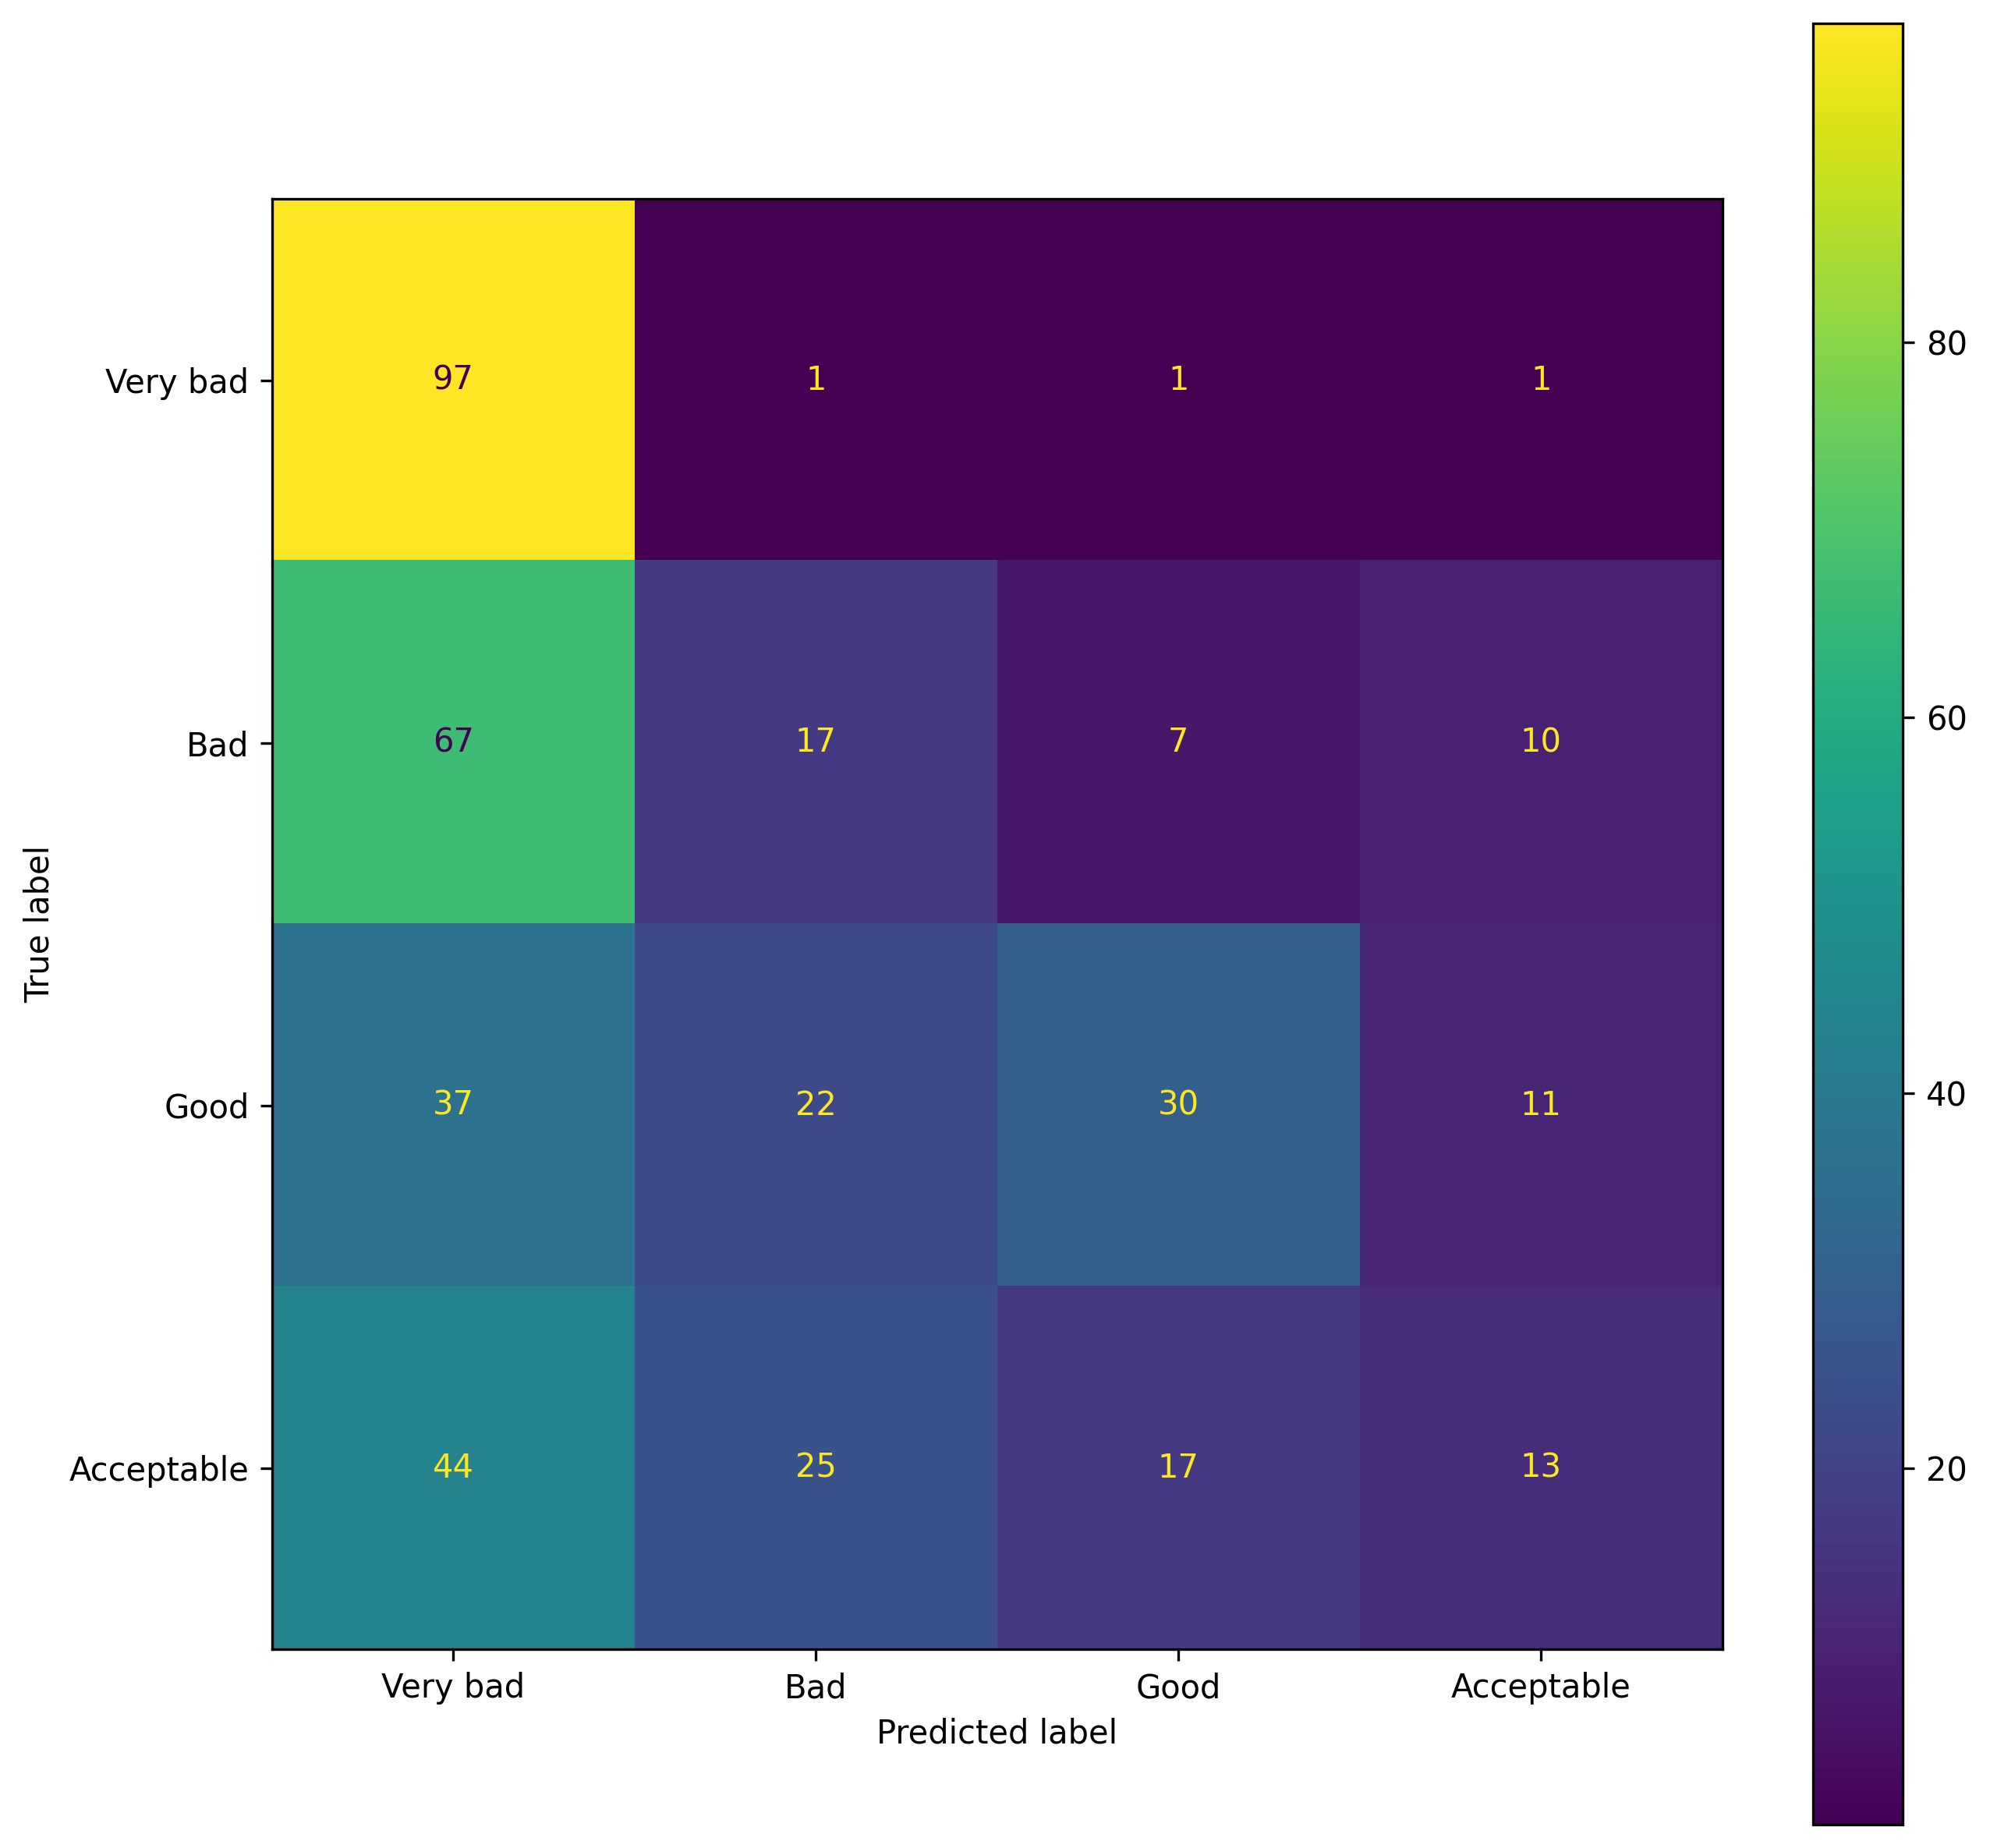

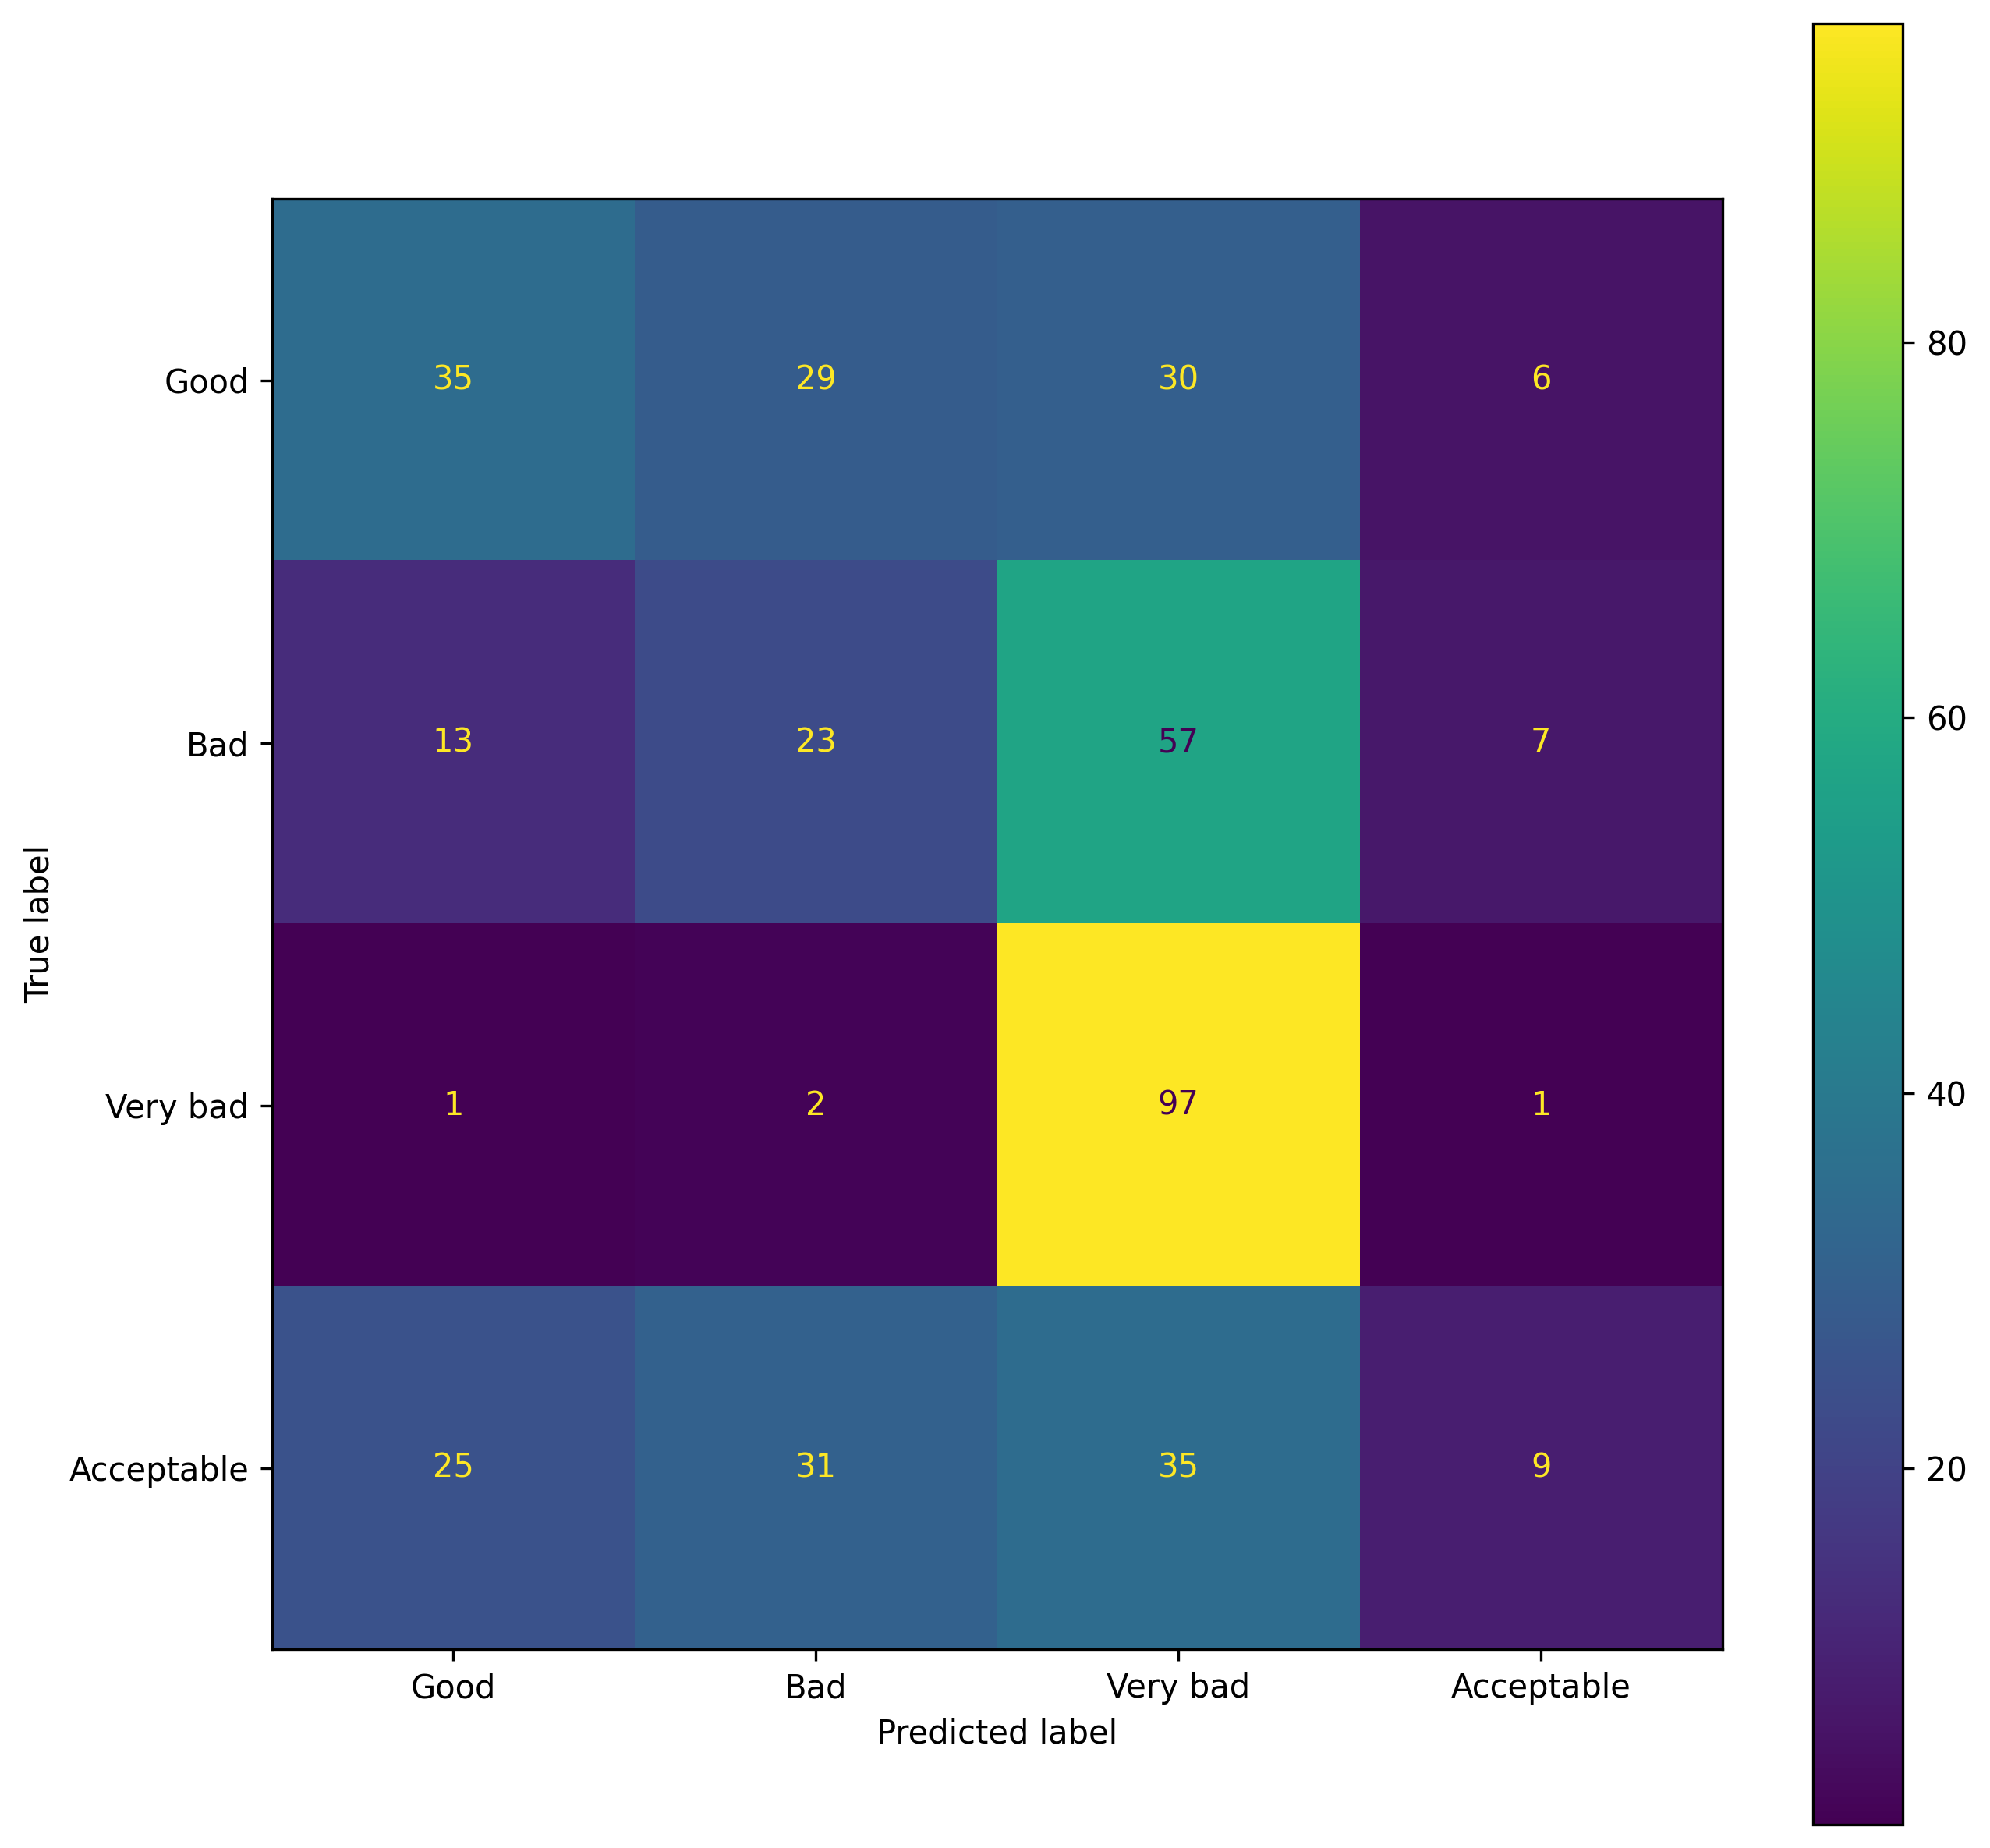

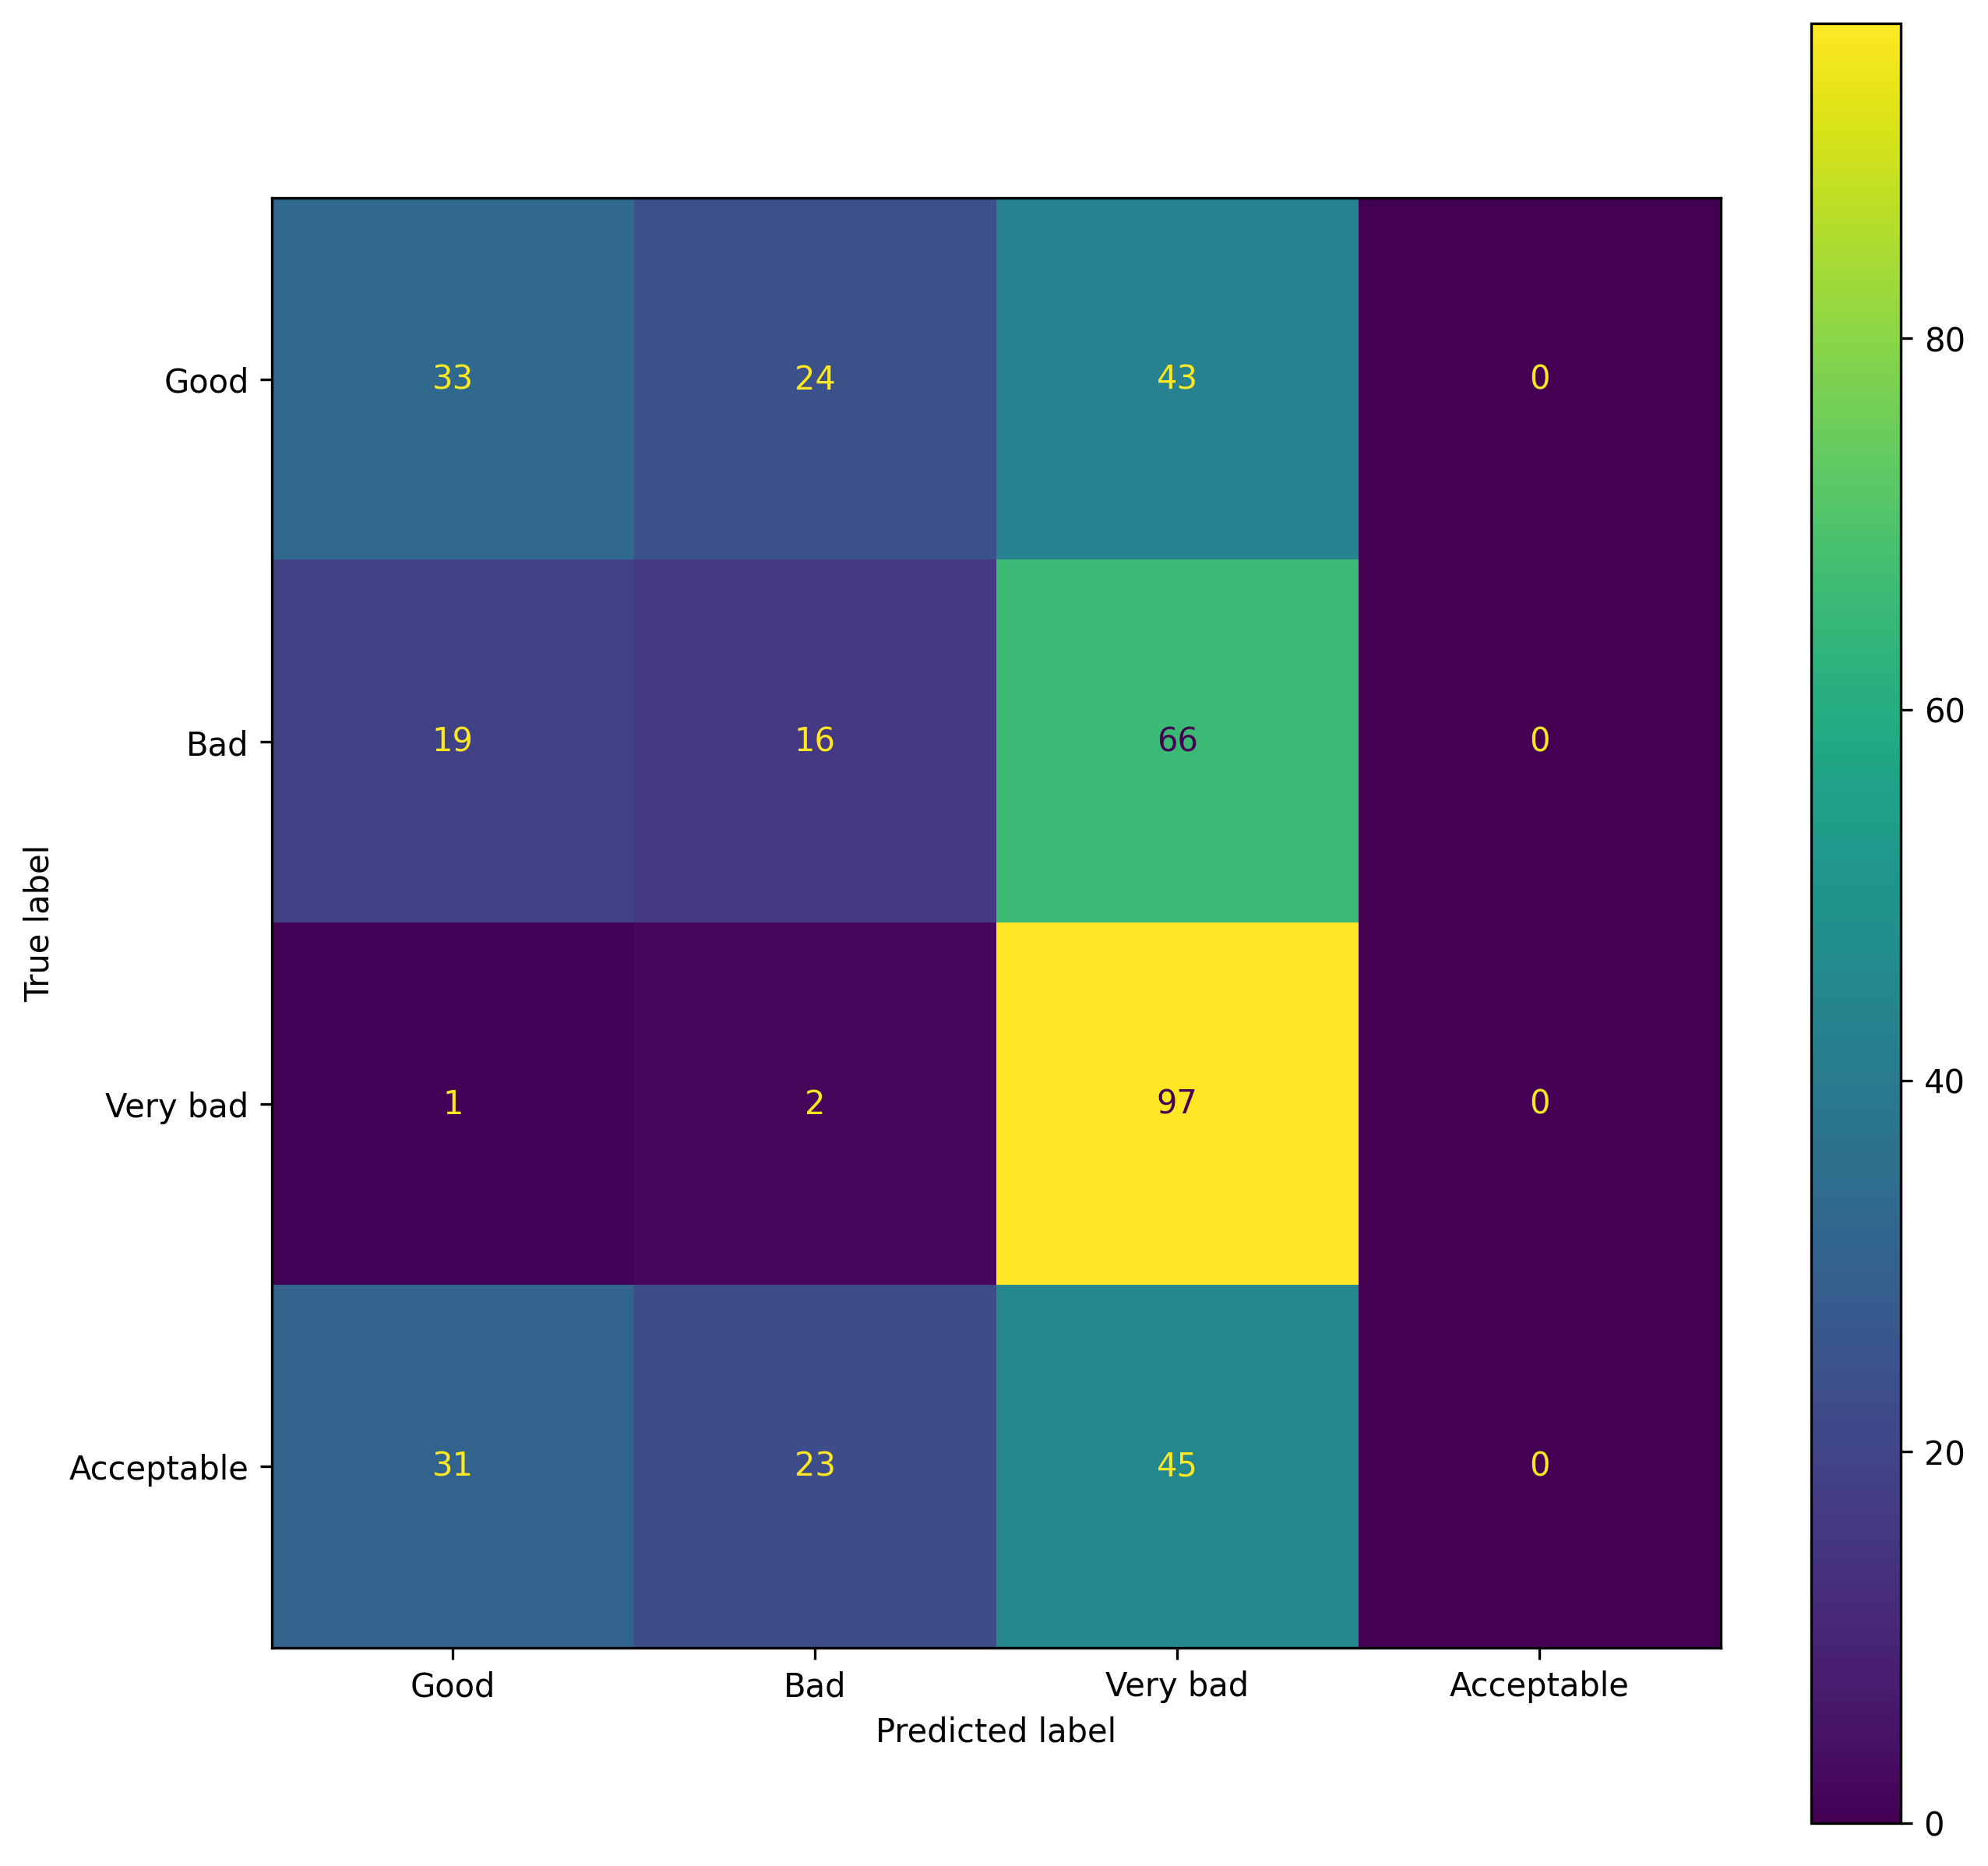

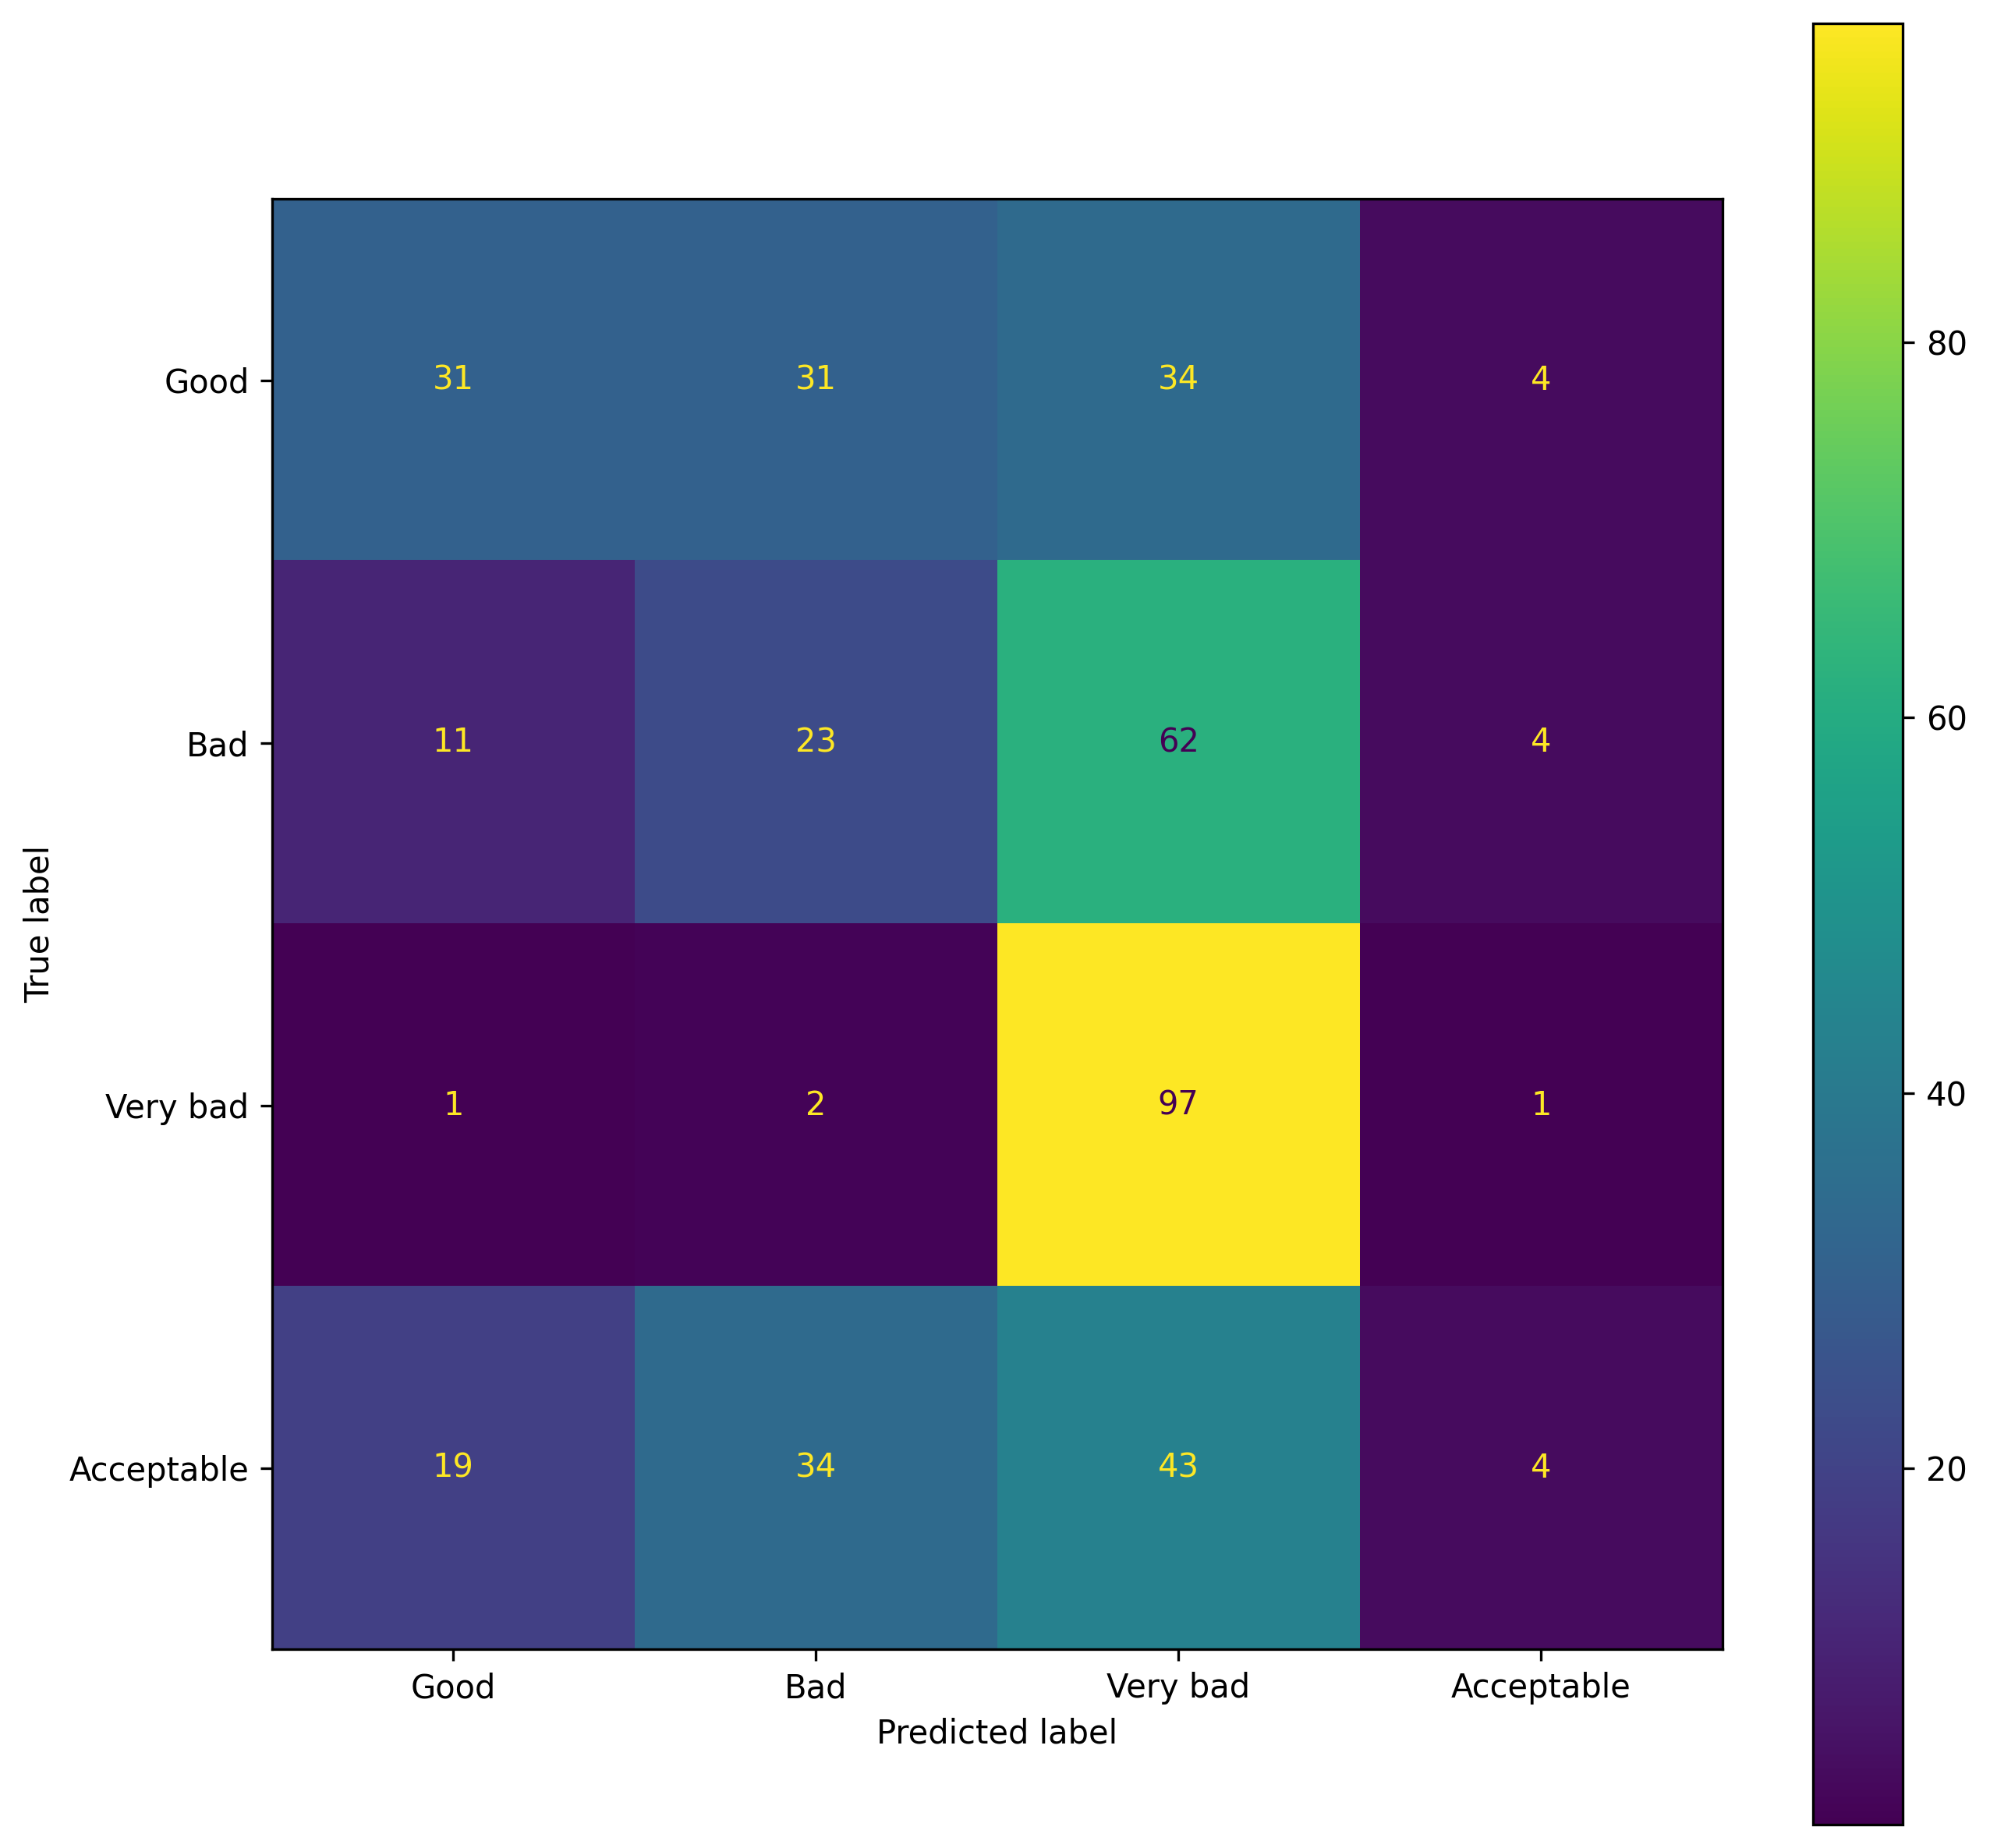

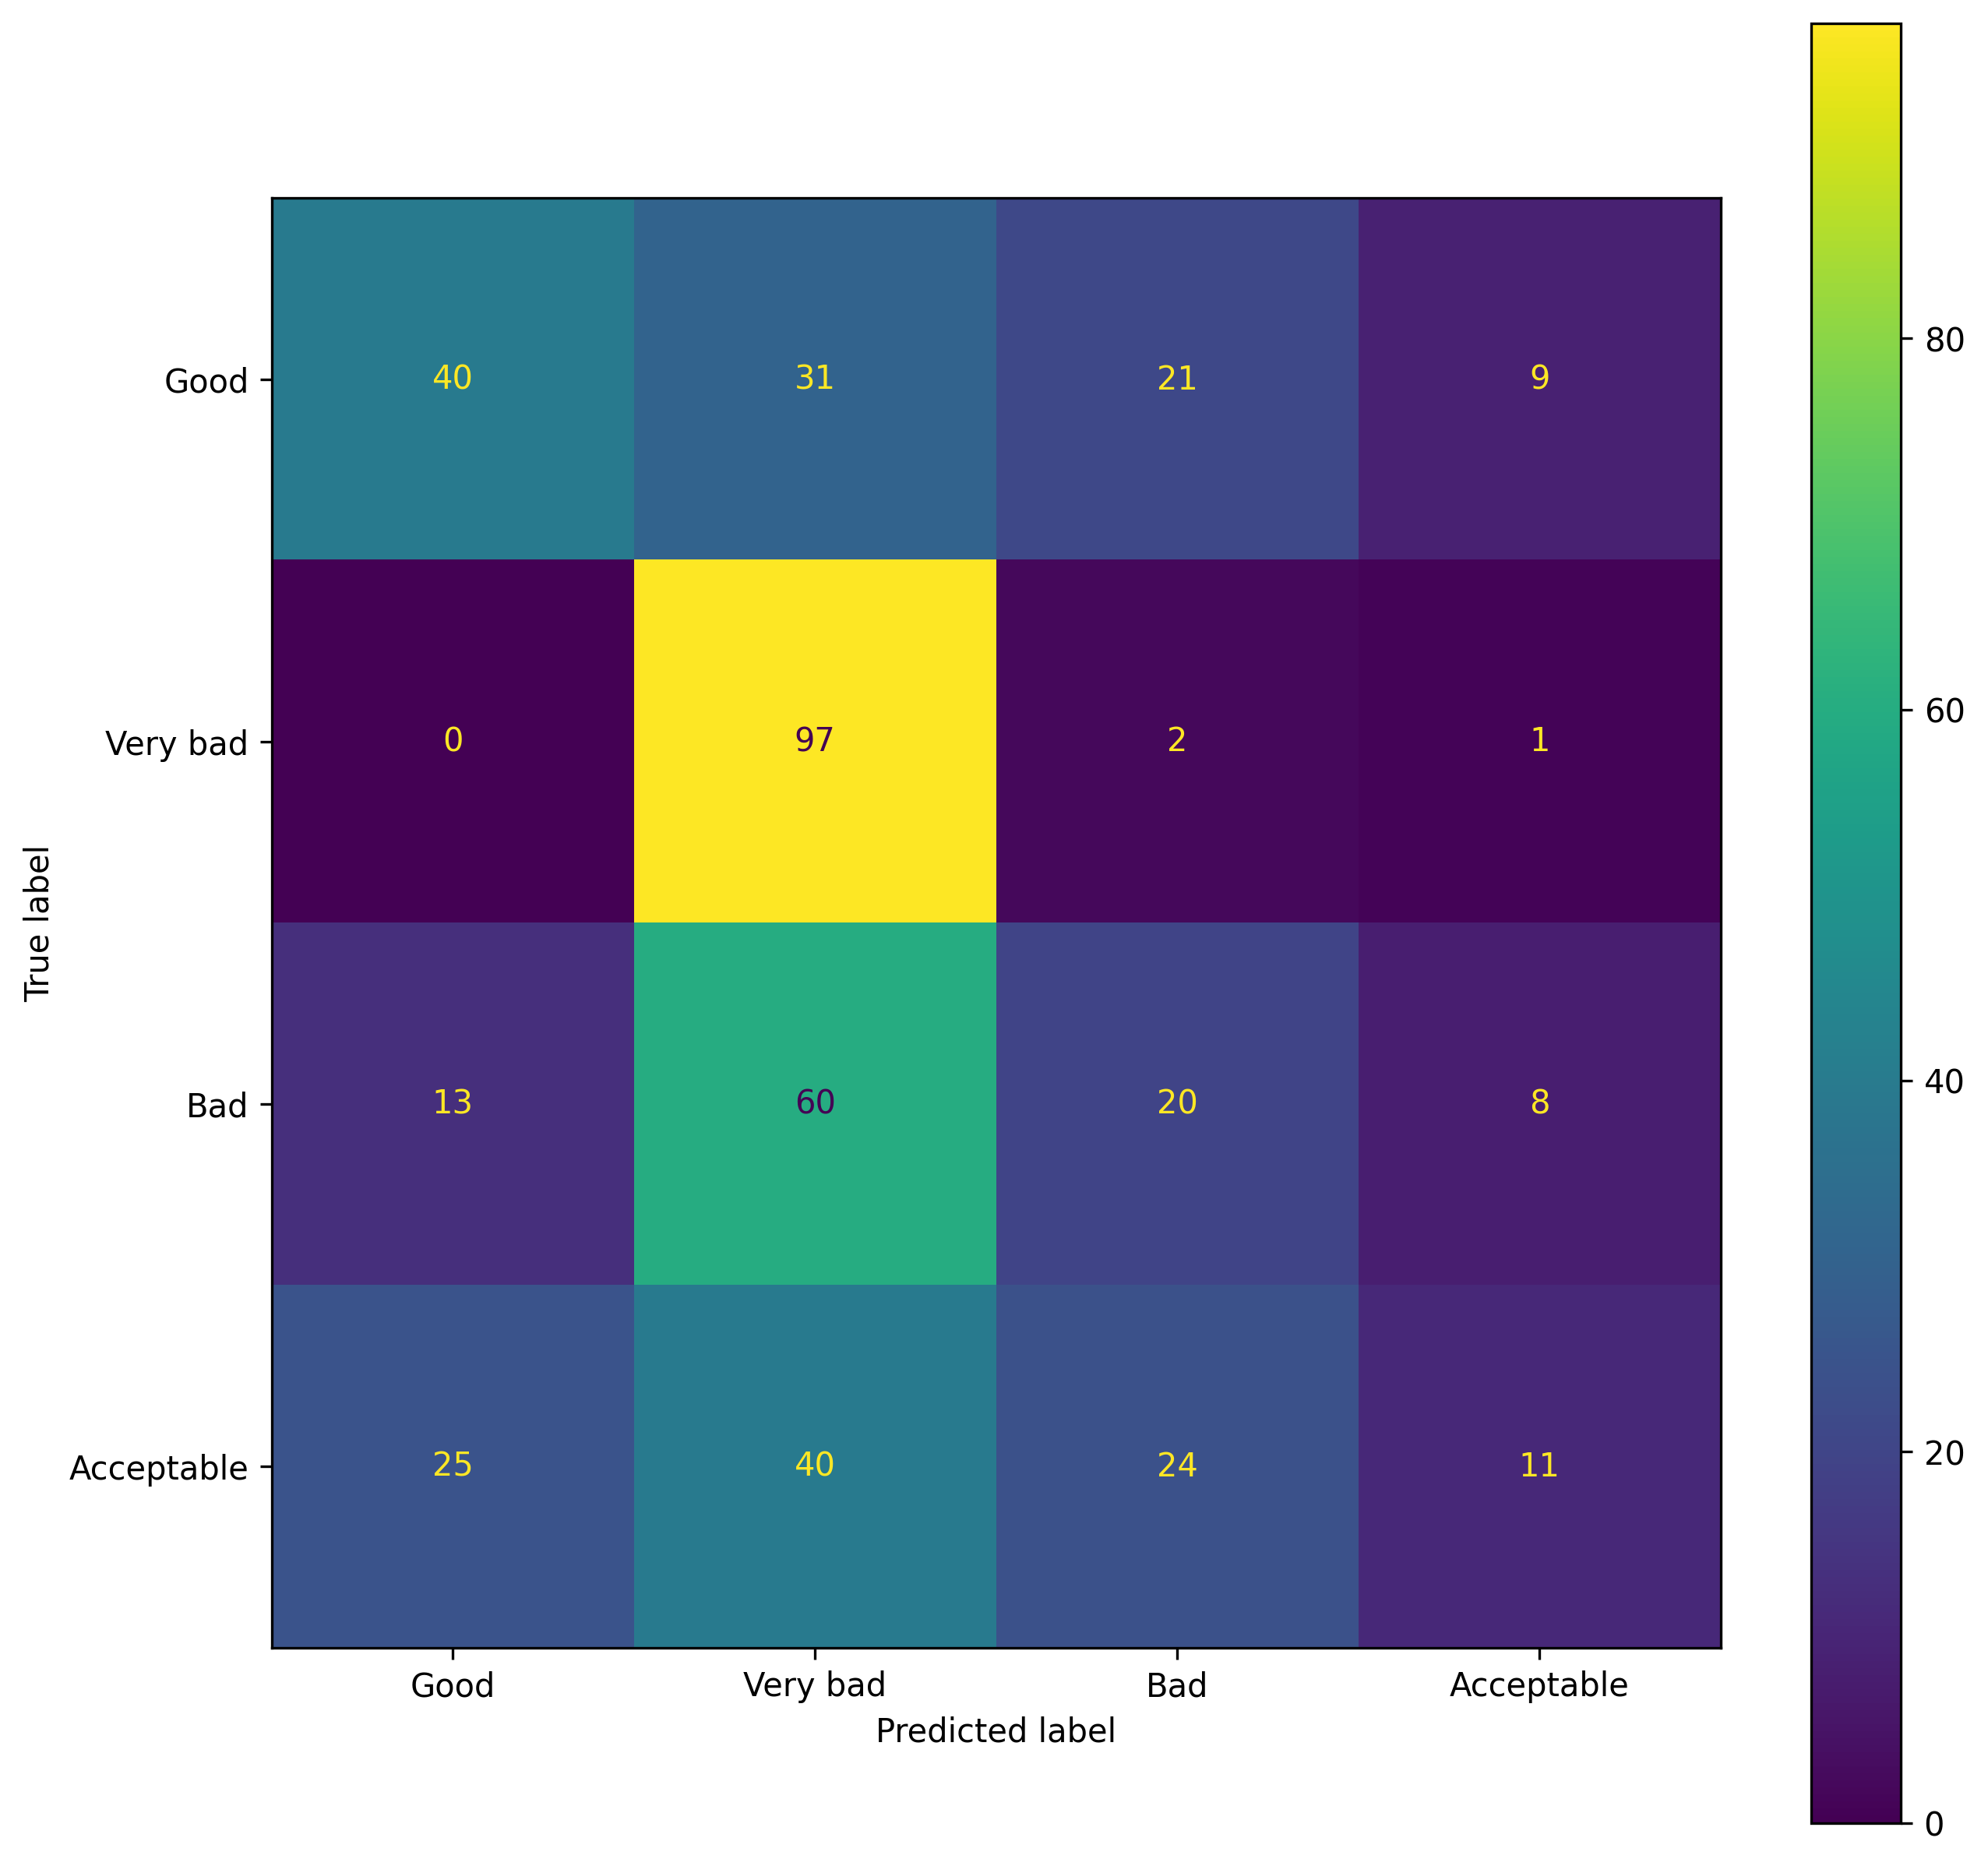

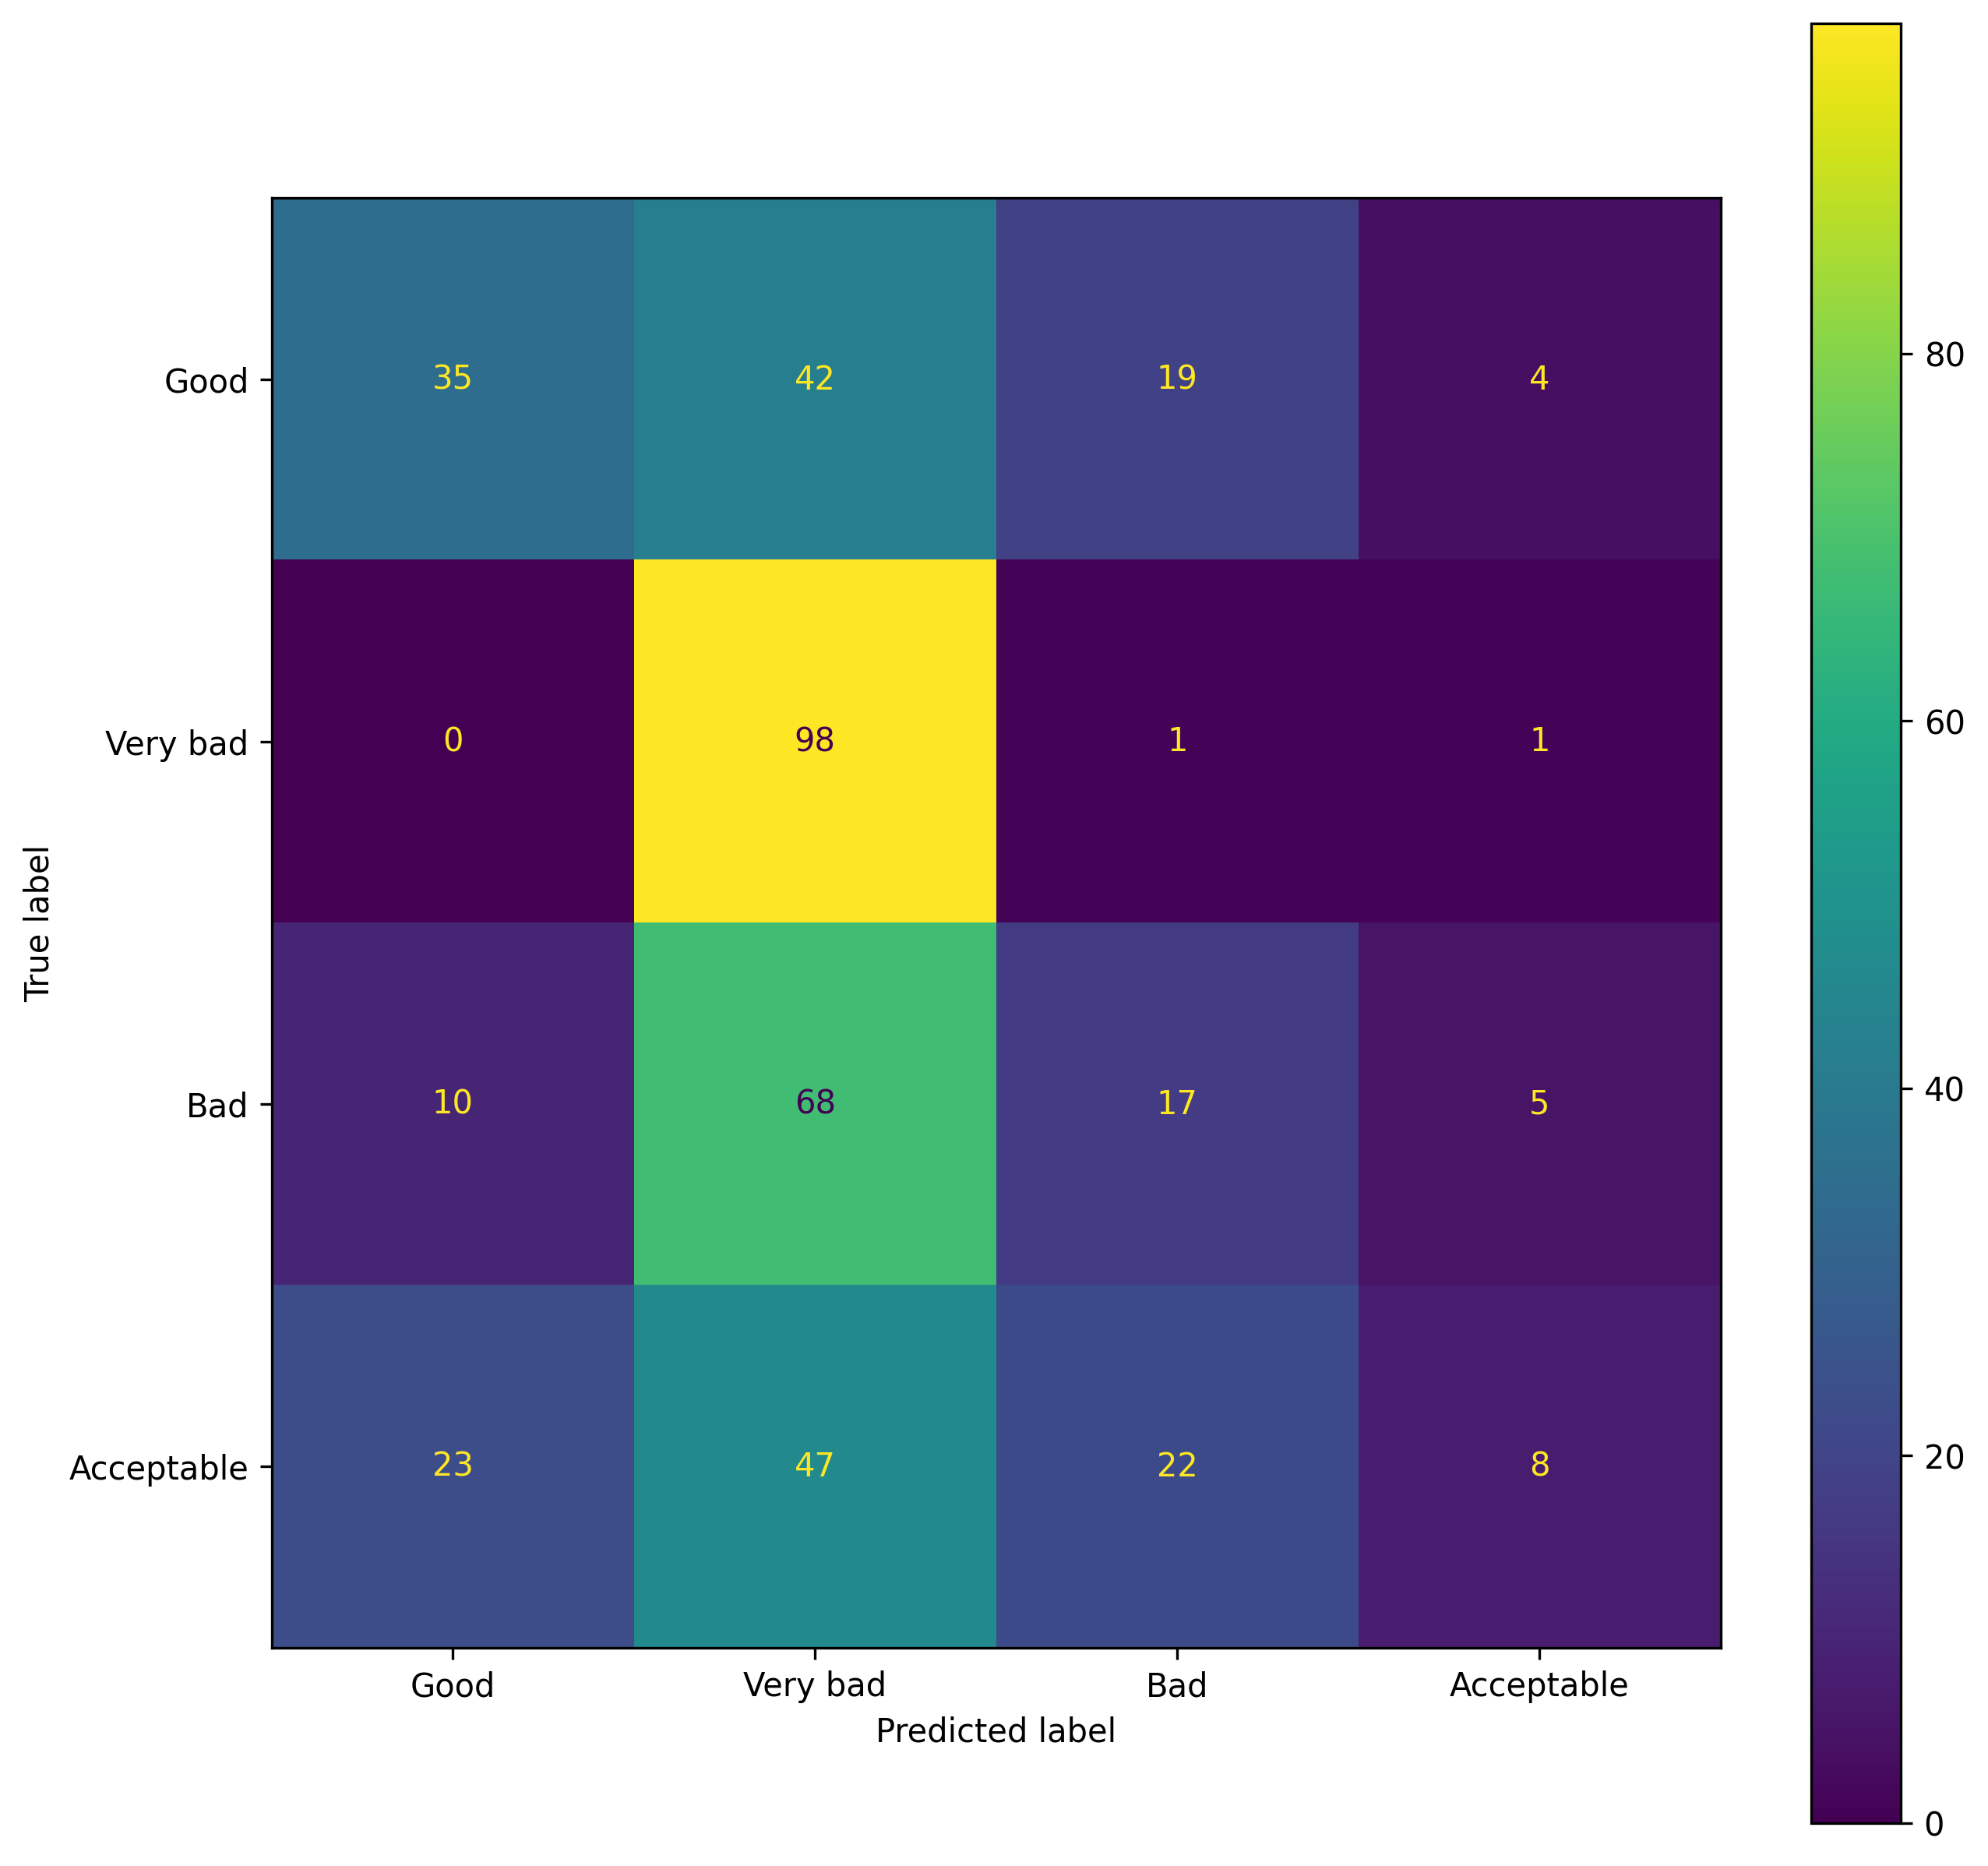

In [4]:
from pandas import read_hdf
from nenequitia.datasets import DataFrameDataset, BaselineDataFrameDataset
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import nenequitia.models as MODELS
from nenequitia.models.baseline import BaselineModule


lines = "texts.hdf5"
lines = read_hdf(lines)
lines = lines[lines.manuscript == "SBB_PK_Hdschr25"]
lines["bin"] = ""
lines.loc[lines.CER < 10, "bin"] = "Good"
lines.loc[lines.CER.between(10, 25, inclusive="left"), "bin"] = "Acceptable"
lines.loc[lines.CER.between(25, 50, inclusive="left"), "bin"] = "Bad"
lines.loc[lines.CER >= 50, "bin"] = "Very bad"


grouped = "grouped_lines.hdf"
grouped = read_hdf(grouped)
grouped = grouped[grouped.manuscript == "SBB_PK_Hdschr25"]
grouped["bin"] = ""
grouped.loc[grouped.CER < 10, "bin"] = "Good"
grouped.loc[grouped.CER.between(10, 25, inclusive="left"), "bin"] = "Acceptable"
grouped.loc[grouped.CER.between(25, 50, inclusive="left"), "bin"] = "Bad"
grouped.loc[grouped.CER >= 50, "bin"] = "Very bad"

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

    
def update_model(model):
    confmat = model.metric_confusion.confmat.cpu().numpy()

    current_model = {}

    for cls in range(confmat.shape[0]):
        precision = confmat[cls, cls] / confmat[:, cls].sum()
        recall = confmat[cls, cls] / confmat[cls, :].sum()
        # MCC = MostCommonConfusion
        # MCP = MostCommonPrediction
        # Support 
        keys = "Pre Rec MCC MCC Support".split()
        print_cls = "_".join(model.encoder.ys[cls].split())
        current_model.update({
            f"Score({print_cls})[{key}]": val
            for key, val in dict(zip(keys, (
                precision,
                recall,
                model.encoder.ys[confmat[cls, :].argmax()],
                model.encoder.ys[confmat[:, cls].argmax()],
                confmat[cls, :].sum()
            ))).items()
        })

    return current_model

precise_scoring_df = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for file in (
        *glob.glob("explogs/*/*/checkpoints/*"), 
        *glob.glob("explogs-nolang/*/*/checkpoints/*"),
        *glob.glob("explogs-baseline/*/*/checkpoints/*")):
        exp, module, k, *_ = file.split("/")
        ds_class = DataFrameDataset
        
        if module.startswith("Base"):
            model = BaselineModule.load_from_checkpoint(file, training=True)
            ds_class = BaselineDataFrameDataset
        else:
            model = getattr(MODELS, module).load_from_checkpoint(file, training=True)
        df = lines
        if "grouped" in exp:
            df = grouped
            
        
        dataset = ds_class(encoder=model.encoder, df=df)
        trainer = Trainer()
        test = trainer.test(
            model=model,
            dataloaders=DataLoader(dataset,  collate_fn=model.encoder.collate_gt, batch_size=32)
        )
        precise_scoring_df.append({
            "exp": exp,
            "module": module,
            "k": k,
            **update_model(model)
        })
        

In [5]:
precise_scoring_df = DataFrame(precise_scoring_df)

In [6]:
described_df = precise_scoring_df.groupby(["exp", "module"]).describe().reset_index()
#print(precise_scoring_df.to_latex(float_format=lambda x: f"{100*x:.2f}"))

described_df = described_df[
    [
        (key, col)
        for key, col in described_df.columns 
        if "Score(" not in key or (
            col in ("mean", "50%") and "Support" not in key
        )
    ]
]
described_df[['exp',
 'module',
 'Score(Good)[Pre]',
 'Score(Good)[Rec]',
 'Score(Acceptable)[Pre]',
 'Score(Acceptable)[Rec]',
 'Score(Bad)[Pre]',
 'Score(Bad)[Rec]',
 'Score(Very_bad)[Pre]',
 'Score(Very_bad)[Rec]']]

exp             module Score(Good)[Pre]            \
                                                   mean       50%   
0           explogs  AttentionalModule         0.653102  0.656085   
1           explogs          RnnModule         0.669967  0.668182   
2           explogs      TextCnnModule         0.577765  0.590551   
3  explogs-baseline           Baseline         0.338658  0.352424   
4    explogs-nolang  AttentionalModule         0.580774  0.570000   
5    explogs-nolang          RnnModule         0.602985  0.576000   
6    explogs-nolang      TextCnnModule         0.508488  0.493464   

  Score(Good)[Rec]           Score(Acceptable)[Pre]            \
              mean       50%                   mean       50%   
0         0.416244  0.418782               0.452936  0.440120   
1         0.380203  0.373096               0.417487  0.412863   
2         0.315228  0.261421               0.419717  0.432432   
3         0.338409  0.337563               0.368123  0.376344   
4         0.398477  0.416244               0.441045  0.444043   
5         0.396954  0.365482               0.428685  0.428962   
6         0.384264  0.383249               0.402364  0.400955   

  Score(Acceptable)[Rec]           Score(Bad)[Pre]           Score(Bad)[Rec]  \
                    mean       50%            mean       50%            mean   
0               0.267183  0.263158        0.493639  0.496583        0.492341   
1               0.218885  0.210526        0.471271  0.477679        0.517943   
2               0.208669  0.222910        0.436635  0.448775        0.359300   
3               0.075593  0.086687        0.373400  0.371071        0.191466   
4               0.356037  0.342105        0.519825  0.513415        0.499781   
5               0.311455  0.281734        0.509464  0.513699        0.523851   
6               0.247678  0.266254        0.485914  0.491448        0.479431   

            Score(Very_bad)[Pre]           Score(Very_bad)[Rec]            
        50%                 mean       50%                 mean       50%  
0  0.477024             0.757409  0.753286             0.955297  0.954780  
1  0.510941             0.761656  0.741772             0.941990  0.945090  
2  0.332604             0.680870  0.659537             0.967313  0.976098  
3  0.182713             0.602699  0.597317             0.972438  0.973191  
4  0.471554             0.800065  0.785293             0.944057  0.945090  
5  0.526258             0.799593  0.803987             0.941860  0.937984  
6  0.471554             0.769232  0.774827             0.944574  0.944444

In [7]:
print(described_df[['exp',
 'module',
 'Score(Good)[Pre]',
 'Score(Good)[Rec]',
 'Score(Acceptable)[Pre]',
 'Score(Acceptable)[Rec]',
 'Score(Bad)[Pre]',
 'Score(Bad)[Rec]',
 'Score(Very_bad)[Pre]',
 'Score(Very_bad)[Rec]']].to_latex(float_format=lambda x: f"{100*x:.2f}", index=False))

\begin{tabular}{llrrrrrrrrrrrrrrrr}
\toprule
             exp &            module & \multicolumn{2}{l}{Score(Good)[Pre]} & \multicolumn{2}{l}{Score(Good)[Rec]} & \multicolumn{2}{l}{Score(Acceptable)[Pre]} & \multicolumn{2}{l}{Score(Acceptable)[Rec]} & \multicolumn{2}{l}{Score(Bad)[Pre]} & \multicolumn{2}{l}{Score(Bad)[Rec]} & \multicolumn{2}{l}{Score(Very\_bad)[Pre]} & \multicolumn{2}{l}{Score(Very\_bad)[Rec]} \\
                 &             mean &   50\% &             mean &   50\% &                   mean &   50\% &                   mean &   50\% &            mean &   50\% &            mean &   50\% &                 mean &   50\% &                 mean &   50\% \\
\midrule
         explogs & AttentionalModule &            65.31 & 65.61 &            41.62 & 41.88 &                  45.29 & 44.01 &                  26.72 & 26.32 &           49.36 & 49.66 &           49.23 & 47.70 &                75.74 & 75.33 &                95.53 & 95.48 \\
         explogs &         RnnModule &

/tmp/ipykernel_331347/3456319034.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(described_df[['exp',


In [8]:
precise_scoring_df
print(precise_scoring_df[['exp',
 'module',
 'Score(Good)[Pre]',
 'Score(Good)[Rec]',
 'Score(Acceptable)[Pre]',
 'Score(Acceptable)[Rec]',
 'Score(Bad)[Pre]',
 'Score(Bad)[Rec]',
 'Score(Very_bad)[Pre]',
 'Score(Very_bad)[Rec]']].to_latex(float_format=lambda x: f"{100*x:.2f}", index=False))

\begin{tabular}{llrrrrrrrr}
\toprule
             exp &            module &  Score(Good)[Pre] &  Score(Good)[Rec] &  Score(Acceptable)[Pre] &  Score(Acceptable)[Rec] &  Score(Bad)[Pre] &  Score(Bad)[Rec] &  Score(Very\_bad)[Pre] &  Score(Very\_bad)[Rec] \\
\midrule
         explogs & AttentionalModule &             63.35 &             40.36 &                   43.04 &                   26.32 &            49.66 &            47.70 &                 75.33 &                 96.25 \\
         explogs & AttentionalModule &             65.61 &             31.47 &                   41.80 &                   32.35 &            51.81 &            51.75 &                 77.74 &                 95.41 \\
         explogs & AttentionalModule &             63.32 &             51.27 &                   49.17 &                   18.27 &            47.84 &            45.95 &                 71.96 &                 95.99 \\
         explogs & AttentionalModule &             66.00 &             41.88 &  

/tmp/ipykernel_331347/1048732349.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(precise_scoring_df[['exp',
